In [1]:
def compare_strings(string1, string2):
    if len(string1) != len(string2):
        return "Error: Strings are not of equal length"
    
    compared_string = ""
    for char1, char2 in zip(string1, string2):
        if char1 == char2:
            compared_string += "-"
        else:
            compared_string += "E"
    
    return compared_string

def display_large_matrix(matrix, items, rows=21, columns=21):
    # Display column headers (index labels)
    header_str = "    ".join(f"{item}" for item in items[:columns])
    print(f"{'':<10}{header_str}")

    for i in range(min(rows, len(matrix))):
        # Display row index label
        row_label = f"{items[i]:<10}"
        row_str = "   ".join(f"{value:.4f}" for value in matrix[i][:columns])
        print(f"{row_label}{row_str}")



In [2]:
import numpy as np
import pandas as pd
from IPython.display import clear_output
%matplotlib inline


pd.set_option('display.max_colwidth', None)

file = "new_AND_summary.csv"
df = pd.read_csv(file)
df = df.dropna(how='all')

for index, row in df.iterrows():

    real_output = eval(str(row['real_output']))
    df.at[index, 'Real Output'] = real_output['n200']

    gold_output = eval(str(row['gold_output']))
    df.at[index, 'Gold Output'] = gold_output['n200']
    
    pv = str(row['MC']).split(',')
    df.at[index, 'Process Variation'] = pv[1]

    # df.at[index, 'Equal?'] = (gold_output['n200'] == real_output['n200'])
    df.at[index, 'Output Sequence'] = compare_strings(real_output['n200'], gold_output['n200'] )

drop_col = ['MC', 'real_output', 'pattern', 'gold_output', 'Pulse magnitude info', 'Phase state info', 'Current percentage', 'phase_logic_result', 'Pulse width info', 'real_flux', 'Faulty Junction']
df = df.drop(drop_col, axis=1)

clear_output()

In [3]:
# Encode the configuration types and real output types.
df['config_numeric'], unique_config_values = pd.factorize(df['config'])
reverse_config_mapping = dict(zip(range(len(unique_config_values)), unique_config_values))

df['output_numeric'], unique_fault_values = pd.factorize(df['Output Sequence'])
reverse_fault_mapping = dict(zip(range(len(unique_fault_values)), unique_fault_values))

print ("Total unique failing output sequences: ", max(df['output_numeric']))
print ("Total unique failing CUS configurations aka CUS plusses: ", max(df['config_numeric']))

variations = df['Process Variation'].unique()

Total unique failing output sequences:  99
Total unique failing CUS configurations aka CUS plusses:  499


In [4]:
df

,config,cus,fail,Real Output,Gold Output,Process Variation,Output Sequence,config_numeric,output_numeric
1,and_spb_0_and_spb_0_and_spa_0_and,AND2T,pass,00000001000000000001000000000001000000000001010010010011,00000001000000000001000000000001000000000001010010010011,-0.01,--------------------------------------------------------,0,0
3,and_spb_0_and_spb_0_and_spa_0_and,AND2T,fail,00000010000000000010000000000010000000000010100100100110,00000001000000000001000000000001000000000001010010010011,-0.0,------EE----------EE----------EE----------EEEE-EE-EE-E-E,0,1
5,and_spb_0_and_spb_0_and_spa_0_and,AND2T,fail,00000010000000000010000000000010000000000010100100100110,00000001000000000001000000000001000000000001010010010011,-0.01,------EE----------EE----------EE----------EEEE-EE-EE-E-E,0,1
7,and_spb_0_and_spb_0_and_spa_0_and,AND2T,fail,00000010000000000010000000000010000000000010100100100110,00000001000000000001000000000001000000000001010010010011,-0.06,------EE----------EE----------EE----------EEEE-EE-EE-E-E,0,1
9,and_spb_0_and_spb_0_and_spa_0_and,AND2T,fail,00000010000000000010000000000010000000000010100100010110,00000001000000000001000000000001000000000001010010010011,-0.08,------EE----------EE----------EE----------EEEE-EE----E-E,0,2
...,...,...,...,...,...,...,...,...,...
199853,xor_spb_3_xor_spb_3_and_spa_3_xor,AND2T,fail,00000000100000000000100000000000000000000000001001001001,00000001000000000001000000000001000000000001010010010011,0.06,-------EE----------EE----------E-----------E-EE-EE-EE-E-,499,42
199855,xor_spb_3_xor_spb_3_and_spa_3_xor,AND2T,fail,00000000100000000000100000000000000000000000001001001001,00000001000000000001000000000001000000000001010010010011,0.07,-------EE----------EE----------E-----------E-EE-EE-EE-E-,499,42
199857,xor_spb_3_xor_spb_3_and_spa_3_xor,AND2T,fail,00000000100000000000100000000000000000000000001001001001,00000001000000000001000000000001000000000001010010010011,-0.04,-------EE----------EE----------E-----------E-EE-EE-EE-E-,499,42
199859,xor_spb_3_xor_spb_3_and_spa_3_xor,AND2T,fail,00000000100000000000100000000000000000000000001001001001,00000001000000000001000000000001000000000001010010010011,-0.06,-------EE----------EE----------E-----------E-EE-EE-EE-E-,499,42


In [5]:
def condense (configurations):
    original_list = configurations


    # Sort the original list
    sorted_list = sorted(original_list)

    # Find consecutive groups of 4 without reusing numbers
    consecutive_groups = []
    used_numbers = set()

    for i in range(len(sorted_list)):
        if sorted_list[i] not in used_numbers:
            current_group = [sorted_list[i]]
            for j in range(i + 1, len(sorted_list)):
                if sorted_list[j] - current_group[-1] == 1 and sorted_list[j] not in used_numbers:
                    current_group.append(sorted_list[j])
                    if len(current_group) == 5:
                        consecutive_groups.append(current_group.copy())
                        used_numbers.update(current_group)
                        break
                else:
                    break

    # print (len(sorted_list) / len(consecutive_groups) == 5)
    combined = []
    for group in consecutive_groups:
        configs = ""
        # for val in group:
        #     print(reverse_config_mapping[val] + " ")
        # print("Input 1: " + str(reverse_config_mapping[group[0]]).split("_")[0])
        # print("Input 1 Splitters: " + str(reverse_config_mapping[group[0]]).split("_")[2])
        # print("Input 2: " + str(reverse_config_mapping[group[0]]).split("_")[3])
        # print("Input 2 Splitters: " + str(reverse_config_mapping[group[0]]).split("_")[5])
        # print ("Driver Splitters: " + str(reverse_config_mapping[group[0]]).split("_")[8])
        # print("\n")
        configs +=  str(reverse_config_mapping[group[0]]).split("_")[0]+"_"+ str(reverse_config_mapping[group[0]]).split("_")[2]+"_" + str(reverse_config_mapping[group[0]]).split("_")[3]
        combined.append(configs)
    
    return combined

In [6]:
# Determinism Check 

pd.set_option('display.max_columns', None)
output_sequence_distribution = pd.DataFrame()

for pv in sorted(variations):
    sample = df[df['Process Variation'] == pv]
    fault_types = sample['output_numeric'].unique()
    new_row = {'PV': pv, 'Output Sequences': fault_types, 'Num Unique Output Sequences': len(fault_types)}
    output_sequence_distribution = pd.concat([output_sequence_distribution, pd.DataFrame([new_row])], ignore_index=True)
    
output_sequence_distribution

,PV,Output Sequences,Num Unique Output Sequences
0,-0.0,"[1, 0, 29, 30, 35, 32, 36, 41, 3, 63, 49, 42, 69, 34, 83]",15
1,-0.01,"[0, 1, 3, 6, 19, 22, 28, 29, 36, 42, 41, 49, 69, 70, 56, 79, 83, 9]",18
2,-0.02,"[1, 0, 6, 29, 30, 34, 36, 41, 61, 49, 42, 69, 81, 22, 3, 83, 60]",17
3,-0.03,"[1, 0, 5, 4, 8, 7, 15, 17, 6, 3, 29, 39, 36, 41, 45, 52, 53, 54, 49, 42, 69, 71, 46, 85, 83, 94, 95, 99]",28
4,-0.04,"[1, 4, 0, 8, 11, 15, 17, 18, 6, 19, 29, 36, 42, 41, 49, 52, 53, 54, 3, 67, 69, 71, 73, 74, 75, 76, 83, 94, 95, 59, 28]",31
5,-0.05,"[0, 1, 6, 9, 13, 16, 20, 3, 23, 31, 29, 33, 36, 34, 41, 55, 58, 60, 62, 49, 42, 69, 80, 82, 76, 83, 78, 30, 98]",29
6,-0.06,"[1, 0, 6, 21, 22, 25, 27, 19, 29, 3, 32, 36, 41, 56, 49, 42, 69, 16, 72, 77, 78, 83, 28, 97]",24
7,-0.07,"[1, 0, 6, 3, 29, 36, 38, 42, 41, 44, 49, 47, 40, 69, 60, 34, 83, 84, 89, 90]",20
8,-0.08,"[2, 1, 0, 7, 10, 12, 14, 3, 29, 30, 36, 39, 41, 42, 40, 46, 49, 50, 23, 11, 66, 68, 26, 69, 21, 70, 80, 83, 86, 91, 92, 93]",32
9,-0.09,"[1, 0, 3, 6, 36, 40, 41, 43, 51, 49, 64, 42, 59, 69, 70, 83, 88, 50]",18


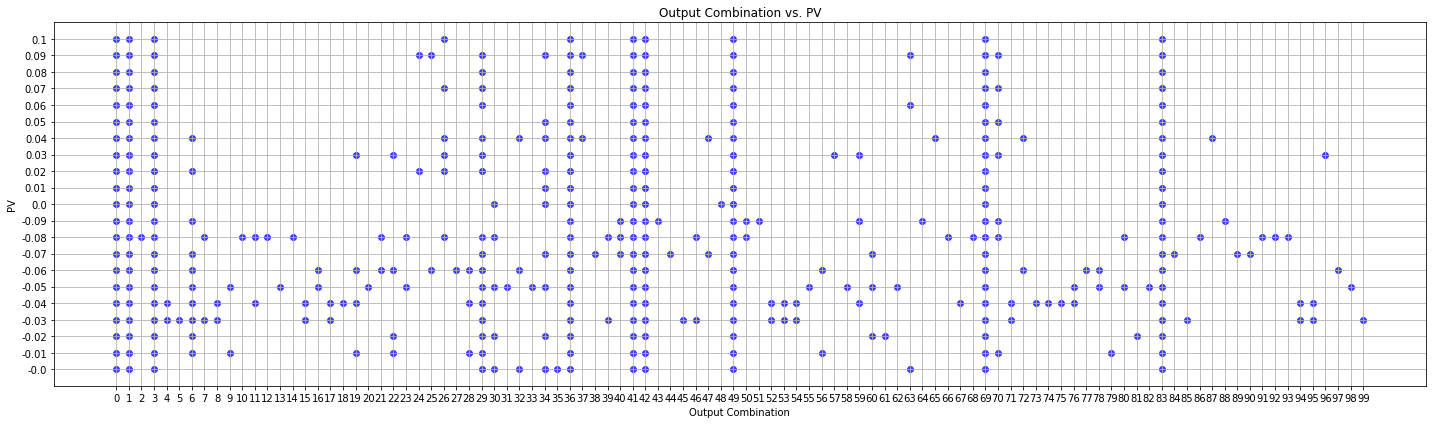

In [7]:
import matplotlib.pyplot as plt

all_faults = []
all_pvs = []

for idx, row in output_sequence_distribution.iterrows():
    faults = row['Output Sequences']
    pv = row['PV']
    for fault in faults:
        all_faults.append(fault)
        all_pvs.append(pv)

plt.figure(figsize=(20, 6))
plt.scatter(all_faults, all_pvs, marker='o', color='blue', alpha=0.7)
plt.xlabel('Output Combination')
plt.ylabel('PV')
plt.title('Output Combination vs. PV')
plt.grid(True)
plt.xticks(range(100)) 
plt.tight_layout()
plt.show()
# plt.close()

In [8]:
from collections import Counter


# print (reverse_fault_mapping[0])
# print (reverse_fault_mapping[1])
# print (reverse_fault_mapping[36])
# print (reverse_fault_mapping[42])
# print (reverse_fault_mapping[3])
# print (reverse_fault_mapping[41])
# print (reverse_fault_mapping[12])
# print (reverse_fault_mapping[99])
# print (reverse_fault_mapping[83])
# display (df['config_numeric'].value_counts())

pattern = "00,00,00,01,00,10,00,11,00,00,00,00,00,01,00,00,10,00,00,11,00,01,00,00,01,01,00,01,10,00,01,11,00,10,00,00,10,01,00,10,10,00,10,11,00,11,00,00,11,01,00,11,10,00,11,11"
pattern = pattern.split(",")


counterMain = Counter(pattern)
for value, count in counterMain.items():
        print(f"{value}: {count}")

# counterMain["01"]
        

for val in df['output_numeric'].value_counts().head(10).index:
    print (str(val), reverse_fault_mapping[val])
    E_indices= []

    # Find indices of Errors.
    for i, char in enumerate(reverse_fault_mapping[val]):
        if char == 'E':
            E_indices.append(i)
    print (E_indices)

    # Find corresponding input pattern/input sequence to error indices. 
    inputValues = []
    inputTwoPattern = []
    for num in E_indices:
        #print (pattern[num])
        inputValues.append(pattern[num])
        inputTwoPattern.append(str(pattern[num-1]) + ", " + str(pattern[num]))


    # Find counts of input pattern.
    counts = Counter(inputValues)
    
    for value, count in counts.items():
        # print(f"{value}: {count}")
        print (value, ":", count, " Percentage: ", round(count/counterMain[value], 3))
    

    # Find counts of input sequences.
    counts1 = Counter(inputTwoPattern)
    for value, count in counts1.items():
        print (value, ":", count)

    del E_indices
    del inputValues
    del inputTwoPattern


# print()
# for val in df['output_numeric'].value_counts().tail(10).index:
#     print (str(val), reverse_fault_mapping[val])


00: 29
01: 9
10: 9
11: 9
0 --------------------------------------------------------
[]
1 ------EE----------EE----------EE----------EEEE-EE-EE-E-E
[6, 7, 18, 19, 30, 31, 42, 43, 44, 45, 47, 48, 50, 51, 53, 55]
00 : 6  Percentage:  0.207
11 : 8  Percentage:  0.889
01 : 1  Percentage:  0.111
10 : 1  Percentage:  0.111
10, 00 : 2
00, 11 : 5
00, 00 : 2
00, 01 : 1
01, 11 : 1
00, 10 : 1
10, 11 : 1
11, 00 : 1
01, 00 : 1
11, 11 : 1
36 -------EE----------EE----------EE----------EEEE-EE-EE-E-
[7, 8, 19, 20, 31, 32, 43, 44, 45, 46, 48, 49, 51, 52, 54]
11 : 8  Percentage:  0.889
00 : 5  Percentage:  0.172
01 : 1  Percentage:  0.111
10 : 1  Percentage:  0.111
00, 11 : 6
11, 00 : 5
01, 11 : 1
10, 11 : 1
11, 01 : 1
11, 10 : 1
42 -------EE----------EE----------E-----------E-EE-EE-EE-E-
[7, 8, 19, 20, 31, 43, 45, 46, 48, 49, 51, 52, 54]
11 : 8  Percentage:  0.889
00 : 3  Percentage:  0.103
01 : 1  Percentage:  0.111
10 : 1  Percentage:  0.111
00, 11 : 6
11, 00 : 3
01, 11 : 1
10, 11 : 1
11, 01 : 1
11, 10

In [9]:
errordf = df[df['fail'] == "fail"]

# print (errordf['config_numeric'].value_counts() )
# print (errordf['config_numeric'].unique())

# print (errordf['config_numeric'].value_counts().head(100) )

# print (errordf['config_numeric'].value_counts().tail(30) )

for val in errordf['config_numeric'].value_counts().tail(10).index:
    print (str(val), reverse_config_mapping[val])

print ()
for val in errordf['config_numeric'].value_counts().head(10).index:
    print (str(val), reverse_config_mapping[val])


252 inv_spb_2_and_spb_2_and_spa_2_inv
251 inv_spb_2_and_spb_2_and_spa_2_dff
253 inv_spb_2_and_spb_2_and_spa_2_or
254 inv_spb_2_and_spb_2_and_spa_2_xor
250 inv_spb_2_and_spb_2_and_spa_2_and
264 inv_spb_2_inv_spb_2_and_spa_2_xor
263 inv_spb_2_inv_spb_2_and_spa_2_or
262 inv_spb_2_inv_spb_2_and_spa_2_inv
260 inv_spb_2_inv_spb_2_and_spa_2_and
261 inv_spb_2_inv_spb_2_and_spa_2_dff

499 xor_spb_3_xor_spb_3_and_spa_3_xor
99 and_spb_3_xor_spb_3_and_spa_3_xor
97 and_spb_3_xor_spb_3_and_spa_3_inv
96 and_spb_3_xor_spb_3_and_spa_3_dff
95 and_spb_3_xor_spb_3_and_spa_3_and
94 and_spb_3_or_spb_3_and_spa_3_xor
93 and_spb_3_or_spb_3_and_spa_3_or
92 and_spb_3_or_spb_3_and_spa_3_inv
91 and_spb_3_or_spb_3_and_spa_3_dff
90 and_spb_3_or_spb_3_and_spa_3_and


In [10]:
# Equivalence Check

# calculate cosine similarity
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

all0 = output_sequence_distribution['Output Sequences'].to_numpy()
matrices = [np.array(lst) for lst in all0]
num_matrices = len(matrices)
similarity_matrix = np.zeros((num_matrices, num_matrices))


max_len = max(len(array) for array in matrices)
arrays_padded = [np.pad(array, (0, max_len - len(array)), mode='constant') for array in matrices]
arrays_padded = np.array(arrays_padded)

# print (arrays_padded)
similarity_matrix = cosine_similarity(arrays_padded)
print("Cosine Similarity Matrix Across PV:")
items = output_sequence_distribution['PV'].tolist()
display_large_matrix(similarity_matrix, items)
del similarity_matrix

Cosine Similarity Matrix Across PV:
          -0.0    -0.01    -0.02    -0.03    -0.04    -0.05    -0.06    -0.07    -0.08    -0.09    0.0    0.01    0.02    0.03    0.04    0.05    0.06    0.07    0.08    0.09    0.1
-0.0      1.0000   0.7112   0.6606   0.2828   0.3102   0.3115   0.4189   0.5854   0.3007   0.7245   0.6392   0.5348   0.7019   0.8046   0.6163   0.5762   0.6357   0.6178   0.5317   0.8241   0.5269
-0.01     0.7112   1.0000   0.8889   0.4188   0.4229   0.4510   0.5769   0.7376   0.4180   0.9637   0.4977   0.3873   0.6789   0.9317   0.8043   0.4295   0.4373   0.4974   0.3903   0.8107   0.3680
-0.02     0.6606   0.8889   1.0000   0.3422   0.3531   0.3942   0.4972   0.6302   0.3659   0.8598   0.6934   0.5690   0.6745   0.8114   0.7303   0.5954   0.5631   0.7052   0.5669   0.7719   0.5390
-0.03     0.2828   0.4188   0.3422   1.0000   0.8880   0.8748   0.6929   0.4901   0.7374   0.4316   0.1808   0.0736   0.2387   0.3692   0.4772   0.1300   0.1283   0.1563   0.0737   0.3182   0

In [11]:
# Map CUS+ to fault type. 
for var in sorted(variations):
    dfZero =df[df['Process Variation']== var]
    faultToCUSplus = pd.DataFrame()
    

    for val in dfZero['config_numeric'].unique():
        dfx = dfZero[dfZero['config_numeric'] == val]
        new_row = {'CUS Plus': val, 'Output Sequence': dfx['output_numeric'].unique()}
        faultToCUSplus = pd.concat([faultToCUSplus, pd.DataFrame(new_row)], ignore_index=True)
    

    faultToCUSplus = faultToCUSplus.sort_values(by='Output Sequence')
    result_df = faultToCUSplus.groupby('Output Sequence').agg({'CUS Plus': list}).reset_index()

    result_df['Configs Condensed'] = result_df['CUS Plus'].apply(lambda x: condense(x) if condense(x) else x)
    result_df = result_df.drop("CUS Plus", axis =1)

    print("PV: ", var)
    print("Output Combination mapped to CUS Configs: ")
    display (result_df)
    
    del result_df
    del dfZero
    del faultToCUSplus

PV:  -0.0
Output Combination mapped to CUS Configs: 


,Output Sequence,Configs Condensed
0,0,"[and_0_and, and_0_dff, and_0_inv, and_0_or, and_0_xor, and_1_and, and_1_dff, and_1_inv, and_1_or, and_1_xor, and_2_and, and_2_dff, and_2_inv, and_2_or, and_2_xor, and_3_and, and_3_dff, and_3_inv, and_3_or, and_3_xor, dff_0_and, dff_0_dff, dff_0_inv, dff_0_or, dff_0_xor, dff_1_and, dff_1_dff, dff_1_inv, dff_1_or, dff_1_xor, dff_2_and, dff_2_dff, dff_2_inv, dff_2_or, dff_2_xor, dff_3_and, dff_3_dff, dff_3_inv, dff_3_or, dff_3_xor, inv_0_and, inv_0_dff, inv_0_inv, inv_0_or, inv_0_xor, inv_1_and, inv_1_dff, inv_1_inv, inv_1_or, inv_1_xor, inv_2_and, inv_2_dff, inv_2_inv, inv_2_or, inv_2_xor, inv_3_and, inv_3_dff, inv_3_inv, inv_3_or, inv_3_xor, or_0_and, or_0_dff, or_0_inv, or_0_or, or_0_xor, or_1_and, or_1_dff, or_1_inv, or_1_or, or_1_xor, or_2_and, or_2_dff, or_2_inv, or_2_or, or_2_xor, or_3_and, or_3_dff, or_3_inv, or_3_or, or_3_xor, xor_0_and, xor_0_dff, xor_0_inv, xor_0_or, xor_0_xor, xor_1_and, xor_1_dff, xor_1_inv, xor_1_or, xor_1_xor, xor_2_and, xor_2_dff, xor_2_inv, xor_2_or, xor_2_xor, xor_3_and, xor_3_dff, xor_3_inv, xor_3_or, xor_3_xor]"
1,1,"[and_0_and, and_0_dff, and_0_inv, and_0_or, and_0_xor, dff_0_and, dff_0_dff, dff_0_inv, dff_0_or, dff_0_xor, inv_0_and, inv_0_dff, inv_0_inv, inv_0_or, inv_0_xor, or_0_and, or_0_dff, or_0_inv, or_0_or, or_0_xor, xor_0_and, xor_0_dff, xor_0_inv, xor_0_or, xor_0_xor]"
2,3,"[dff_2_dff, dff_2_or, dff_2_xor, or_2_dff, or_2_or, or_2_xor, xor_2_dff, xor_2_or, xor_2_xor]"
3,29,[and_2_and]
4,30,"[and_2_dff, dff_2_and, xor_2_and]"
5,32,[and_2_xor]
6,34,[inv_2_inv]
7,35,"[and_2_or, or_2_and]"
8,36,"[and_3_and, and_3_inv, inv_3_and]"
9,41,"[and_3_dff, and_3_or, and_3_xor, inv_3_dff, inv_3_or, inv_3_xor]"


PV:  -0.01
Output Combination mapped to CUS Configs: 


,Output Sequence,Configs Condensed
0,0,"[and_0_and, and_0_dff, and_0_inv, and_0_or, and_0_xor, and_1_and, and_1_dff, and_1_inv, and_1_or, and_1_xor, and_2_and, and_2_dff, and_2_inv, and_2_or, and_2_xor, and_3_and, and_3_dff, and_3_inv, and_3_or, and_3_xor, dff_0_and, dff_0_dff, dff_0_inv, dff_0_or, dff_0_xor, dff_1_and, dff_1_dff, dff_1_inv, dff_1_or, dff_1_xor, dff_2_and, dff_2_dff, dff_2_inv, dff_2_or, dff_2_xor, dff_3_and, dff_3_dff, dff_3_inv, dff_3_or, dff_3_xor, inv_0_and, inv_0_dff, inv_0_inv, inv_0_or, inv_0_xor, inv_1_and, inv_1_dff, inv_1_inv, inv_1_or, inv_1_xor, inv_2_and, inv_2_dff, inv_2_inv, inv_2_or, inv_2_xor, inv_3_and, inv_3_dff, inv_3_inv, inv_3_or, inv_3_xor, or_0_and, or_0_dff, or_0_inv, or_0_or, or_0_xor, or_1_and, or_1_dff, or_1_inv, or_1_or, or_1_xor, or_2_and, or_2_dff, or_2_inv, or_2_or, or_2_xor, or_3_and, or_3_dff, or_3_inv, or_3_or, or_3_xor, xor_0_and, xor_0_dff, xor_0_inv, xor_0_or, xor_0_xor, xor_1_and, xor_1_dff, xor_1_inv, xor_1_or, xor_1_xor, xor_2_and, xor_2_dff, xor_2_inv, xor_2_or, xor_2_xor, xor_3_and, xor_3_dff, xor_3_inv, xor_3_or, xor_3_xor]"
1,1,"[and_0_and, and_0_dff, and_0_inv, and_0_or, and_0_xor, and_1_and, and_1_dff, and_1_inv, and_1_or, and_1_xor, and_2_dff, and_2_or, and_2_xor, dff_0_and, dff_0_dff, dff_0_inv, dff_0_or, dff_0_xor, dff_1_and, dff_1_dff, dff_1_inv, dff_1_or, dff_1_xor, dff_2_and, dff_2_dff, dff_2_or, dff_2_xor, inv_0_and, inv_0_dff, inv_0_inv, inv_0_or, inv_0_xor, inv_1_and, inv_1_dff, inv_1_inv, inv_1_or, inv_1_xor, or_0_and, or_0_dff, or_0_inv, or_0_or, or_0_xor, or_1_and, or_1_dff, or_1_inv, or_1_or, or_1_xor, or_2_and, or_2_dff, or_2_or, or_2_xor, xor_0_and, xor_0_dff, xor_0_inv, xor_0_or, xor_0_xor, xor_1_and, xor_1_dff, xor_1_inv, xor_1_or, xor_1_xor, xor_2_and, xor_2_dff, xor_2_or, xor_2_xor]"
2,3,"[and_0_inv, and_1_inv, and_2_and, dff_0_inv, dff_1_inv, inv_0_and, inv_0_dff, inv_0_or, inv_0_xor, inv_1_and, inv_1_dff, inv_1_inv, inv_1_or, inv_1_xor, or_0_inv, or_1_inv, xor_0_inv, xor_1_inv]"
3,6,"[and_0_xor, dff_0_xor, inv_0_xor, or_0_xor, xor_0_and, xor_0_inv, xor_0_xor]"
4,9,"[415, 417]"
5,19,"[and_1_and, and_1_or, inv_1_or]"
6,22,"[and_1_dff, and_1_xor, dff_1_and, dff_1_dff, dff_1_or, dff_1_xor, inv_1_dff, inv_1_xor, or_1_and, or_1_dff, or_1_or, or_1_xor, xor_1_and, xor_1_dff, xor_1_or, xor_1_xor]"
7,28,"[and_1_inv, dff_1_inv, or_1_inv, xor_1_inv]"
8,29,"[and_2_and, and_2_dff, and_2_or, and_2_xor, dff_2_and, or_2_and, xor_2_and]"
9,36,"[and_3_and, and_3_dff, and_3_inv, and_3_or, and_3_xor, dff_3_and, dff_3_dff, dff_3_inv, dff_3_or, dff_3_xor, inv_3_and, inv_3_dff, inv_3_or, inv_3_xor, or_3_and, or_3_dff, or_3_inv, or_3_or, or_3_xor, xor_3_and, xor_3_dff, xor_3_inv, xor_3_or, xor_3_xor]"


PV:  -0.02
Output Combination mapped to CUS Configs: 


,Output Sequence,Configs Condensed
0,0,"[and_0_and, and_0_dff, and_0_inv, and_0_or, and_0_xor, and_1_and, and_1_dff, and_1_inv, and_1_or, and_1_xor, and_2_and, and_2_dff, and_2_inv, and_2_or, and_2_xor, and_3_and, and_3_dff, and_3_inv, and_3_or, and_3_xor, dff_0_and, dff_0_dff, dff_0_inv, dff_0_or, dff_0_xor, dff_1_and, dff_1_dff, dff_1_inv, dff_1_or, dff_1_xor, dff_2_and, dff_2_dff, dff_2_inv, dff_2_or, dff_2_xor, dff_3_and, dff_3_dff, dff_3_inv, dff_3_or, dff_3_xor, inv_0_and, inv_0_dff, inv_0_inv, inv_0_or, inv_0_xor, inv_1_and, inv_1_dff, inv_1_inv, inv_1_or, inv_1_xor, inv_2_and, inv_2_dff, inv_2_inv, inv_2_or, inv_2_xor, inv_3_and, inv_3_dff, inv_3_inv, inv_3_or, inv_3_xor, or_0_and, or_0_dff, or_0_inv, or_0_or, or_0_xor, or_1_and, or_1_dff, or_1_inv, or_1_or, or_1_xor, or_2_and, or_2_dff, or_2_inv, or_2_or, or_2_xor, or_3_and, or_3_dff, or_3_inv, or_3_or, or_3_xor, xor_0_and, xor_0_dff, xor_0_inv, xor_0_or, xor_0_xor, xor_1_and, xor_1_dff, xor_1_inv, xor_1_or, xor_1_xor, xor_2_and, xor_2_dff, xor_2_inv, xor_2_or, xor_2_xor, xor_3_and, xor_3_dff, xor_3_inv, xor_3_or, xor_3_xor]"
1,1,"[and_0_and, and_0_dff, and_0_inv, and_0_or, and_0_xor, and_1_and, and_1_dff, and_1_inv, and_1_or, and_1_xor, and_2_and, and_2_dff, and_2_or, and_2_xor, dff_0_and, dff_0_dff, dff_0_inv, dff_0_or, dff_0_xor, dff_1_and, dff_1_dff, dff_1_inv, dff_1_or, dff_1_xor, dff_2_and, dff_2_dff, dff_2_or, dff_2_xor, inv_0_and, inv_0_dff, inv_0_or, inv_0_xor, inv_1_and, inv_1_dff, inv_1_inv, inv_1_or, inv_1_xor, or_0_and, or_0_dff, or_0_inv, or_0_or, or_0_xor, or_1_and, or_1_dff, or_1_inv, or_1_or, or_1_xor, or_2_and, or_2_dff, or_2_or, or_2_xor, xor_0_and, xor_0_dff, xor_0_inv, xor_0_or, xor_0_xor, xor_1_and, xor_1_dff, xor_1_inv, xor_1_or, xor_1_xor, xor_2_and, xor_2_dff, xor_2_or, xor_2_xor]"
2,3,"[inv_2_or, or_2_inv]"
3,6,"[and_0_xor, dff_0_xor, inv_0_xor, or_0_xor, xor_0_and, xor_0_dff, xor_0_inv, xor_0_or, xor_0_xor]"
4,22,[inv_2_inv]
5,29,"[and_2_and, and_2_dff, and_2_or, and_2_xor, dff_2_and, or_2_and, xor_2_and]"
6,30,"[and_2_inv, inv_2_and]"
7,34,"[and_2_inv, and_3_and, and_3_dff, and_3_inv, and_3_or, and_3_xor, dff_2_inv, dff_3_and, dff_3_inv, inv_3_and, inv_3_dff, inv_3_inv, inv_3_or, inv_3_xor, or_3_and, or_3_inv, xor_2_inv, xor_3_and, xor_3_inv]"
8,36,"[and_3_and, and_3_dff, and_3_inv, and_3_or, and_3_xor, dff_3_and, dff_3_dff, dff_3_inv, dff_3_or, dff_3_xor, inv_3_and, inv_3_dff, inv_3_or, inv_3_xor, or_3_and, or_3_dff, or_3_inv, or_3_or, or_3_xor, xor_3_and, xor_3_dff, xor_3_inv, xor_3_or, xor_3_xor]"
9,41,"[and_3_dff, and_3_or, and_3_xor, dff_3_or, inv_3_dff, inv_3_or, inv_3_xor, xor_3_or]"


PV:  -0.03
Output Combination mapped to CUS Configs: 


,Output Sequence,Configs Condensed
0,0,"[and_0_and, and_0_dff, and_0_inv, and_0_or, and_0_xor, and_1_and, and_1_dff, and_1_inv, and_1_or, and_1_xor, and_2_and, and_2_dff, and_2_inv, and_2_or, and_2_xor, dff_0_and, dff_0_dff, dff_0_inv, dff_0_or, dff_0_xor, dff_1_and, dff_1_dff, dff_1_inv, dff_1_or, dff_1_xor, dff_2_and, dff_2_dff, dff_2_inv, dff_2_or, dff_2_xor, inv_0_and, inv_0_dff, inv_0_inv, inv_0_or, inv_0_xor, inv_1_and, inv_1_dff, inv_1_inv, inv_1_or, inv_1_xor, inv_2_and, inv_2_dff, inv_2_inv, inv_2_or, inv_2_xor, or_0_and, or_0_dff, or_0_inv, or_0_or, or_0_xor, or_1_and, or_1_dff, or_1_inv, or_1_or, or_1_xor, or_2_and, or_2_dff, or_2_inv, or_2_or, or_2_xor, xor_0_and, xor_0_dff, xor_0_inv, xor_0_or, xor_0_xor, xor_1_and, xor_1_dff, xor_1_inv, xor_1_or, xor_1_xor, xor_2_and, xor_2_dff, xor_2_inv, xor_2_or, xor_2_xor]"
1,1,"[and_0_and, and_0_dff, and_0_inv, and_0_or, and_0_xor, and_1_and, and_1_dff, and_1_inv, and_1_or, and_1_xor, and_2_and, and_2_dff, and_2_or, and_2_xor, dff_0_and, dff_0_dff, dff_0_inv, dff_0_or, dff_0_xor, dff_1_and, dff_1_dff, dff_1_inv, dff_1_or, dff_1_xor, dff_2_and, dff_2_dff, dff_2_or, dff_2_xor, inv_0_and, inv_0_dff, inv_0_inv, inv_0_or, inv_0_xor, inv_1_and, inv_1_dff, inv_1_or, inv_1_xor, or_0_and, or_0_dff, or_0_inv, or_0_or, or_0_xor, or_1_and, or_1_dff, or_1_inv, or_1_or, or_1_xor, or_2_and, or_2_dff, or_2_or, or_2_xor, xor_0_and, xor_0_dff, xor_0_inv, xor_0_or, xor_0_xor, xor_1_and, xor_1_dff, xor_1_inv, xor_1_or, xor_1_xor, xor_2_and, xor_2_dff, xor_2_or, xor_2_xor]"
2,3,"[and_2_and, and_2_dff, and_2_or, and_2_xor, dff_2_and, or_2_and, xor_2_and]"
3,4,"[2, 4, 3, 1]"
4,5,[0]
5,6,"[and_1_and, and_1_dff, and_1_inv, and_1_or, and_1_xor, dff_1_and, dff_1_dff, dff_1_inv, dff_1_or, dff_1_xor, inv_1_and, inv_1_dff, inv_1_inv, inv_1_or, inv_1_xor, or_1_and, or_1_dff, or_1_inv, or_1_or, or_1_xor, xor_1_and, xor_1_dff, xor_1_inv, xor_1_or, xor_1_xor]"
6,7,"[and_0_inv, inv_0_and]"
7,8,"[and_0_dff, and_0_xor, dff_0_and, xor_0_and]"
8,15,"[301, 16, 121, 405]"
9,17,"[304, 302, 18, 105, 122, 320, 303, 124, 17, 106, 123, 19]"


PV:  -0.04
Output Combination mapped to CUS Configs: 


,Output Sequence,Configs Condensed
0,0,"[and_0_and, and_0_dff, and_0_inv, and_0_or, and_0_xor, and_1_and, and_1_dff, and_1_inv, and_1_or, and_1_xor, and_2_and, and_2_dff, and_2_inv, and_2_or, and_2_xor, and_3_and, and_3_dff, and_3_inv, and_3_or, and_3_xor, dff_0_and, dff_0_dff, dff_0_inv, dff_0_or, dff_0_xor, dff_1_and, dff_1_dff, dff_1_inv, dff_1_or, dff_1_xor, dff_2_and, dff_2_dff, dff_2_inv, dff_2_or, dff_2_xor, dff_3_and, dff_3_dff, dff_3_inv, dff_3_or, dff_3_xor, inv_0_and, inv_0_dff, inv_0_inv, inv_0_or, inv_0_xor, inv_1_and, inv_1_dff, inv_1_inv, inv_1_or, inv_1_xor, inv_2_and, inv_2_dff, inv_2_inv, inv_2_or, inv_2_xor, inv_3_and, inv_3_dff, inv_3_inv, inv_3_or, inv_3_xor, or_0_and, or_0_dff, or_0_inv, or_0_or, or_0_xor, or_1_and, or_1_dff, or_1_inv, or_1_or, or_1_xor, or_2_and, or_2_dff, or_2_inv, or_2_or, or_2_xor, or_3_and, or_3_dff, or_3_inv, or_3_or, or_3_xor, xor_0_and, xor_0_dff, xor_0_inv, xor_0_or, xor_0_xor, xor_1_and, xor_1_dff, xor_1_inv, xor_1_or, xor_1_xor, xor_2_and, xor_2_dff, xor_2_inv, xor_2_or, xor_2_xor, xor_3_and, xor_3_dff, xor_3_inv, xor_3_or, xor_3_xor]"
1,1,"[and_0_and, and_0_dff, and_0_inv, and_0_or, and_0_xor, and_1_and, and_1_dff, and_1_inv, and_1_or, and_1_xor, dff_0_and, dff_0_dff, dff_0_inv, dff_0_or, dff_0_xor, dff_1_and, dff_1_dff, dff_1_inv, dff_1_or, dff_1_xor, inv_0_and, inv_0_dff, inv_0_or, inv_0_xor, inv_1_and, inv_1_dff, inv_1_inv, inv_1_or, inv_1_xor, or_0_and, or_0_dff, or_0_inv, or_0_or, or_0_xor, or_1_and, or_1_dff, or_1_inv, or_1_or, or_1_xor, xor_0_and, xor_0_dff, xor_0_inv, xor_0_or, xor_0_xor, xor_1_and, xor_1_dff, xor_1_inv, xor_1_or, xor_1_xor]"
2,3,"[dff_2_dff, dff_2_or, dff_2_xor, or_2_dff, or_2_or, or_2_xor, xor_2_dff, xor_2_or, xor_2_xor]"
3,4,[and_0_and]
4,6,"[and_0_xor, and_1_and, and_1_dff, and_1_inv, and_1_xor, dff_0_xor, dff_1_and, dff_1_dff, dff_1_inv, dff_1_or, dff_1_xor, inv_0_xor, inv_1_and, inv_1_dff, inv_1_inv, inv_1_or, inv_1_xor, inv_3_inv, or_0_xor, or_1_and, or_1_dff, or_1_xor, xor_0_and, xor_0_dff, xor_0_inv, xor_0_or, xor_0_xor, xor_1_and, xor_1_dff, xor_1_inv, xor_1_or, xor_1_xor]"
5,8,"[and_0_dff, and_0_xor, dff_0_and, xor_0_and, xor_0_xor]"
6,11,[and_0_inv]
7,15,"[301, 124, 123, 320, 16, 406]"
8,17,"[122, 302, 19, 323, 17, 303, 106, 321, 108, 304, 105, 18, 115]"
9,18,"[21, 22, 20]"


PV:  -0.05
Output Combination mapped to CUS Configs: 


,Output Sequence,Configs Condensed
0,0,"[and_0_and, and_0_dff, and_0_inv, and_0_or, and_0_xor, and_1_and, and_1_dff, and_1_inv, and_1_or, and_1_xor, and_2_and, and_2_dff, and_2_inv, and_2_or, and_2_xor, and_3_and, and_3_dff, and_3_inv, and_3_or, and_3_xor, dff_0_and, dff_0_dff, dff_0_inv, dff_0_or, dff_0_xor, dff_1_and, dff_1_dff, dff_1_inv, dff_1_or, dff_1_xor, dff_2_and, dff_2_dff, dff_2_inv, dff_2_or, dff_2_xor, dff_3_and, dff_3_dff, dff_3_inv, dff_3_or, dff_3_xor, inv_0_and, inv_0_dff, inv_0_inv, inv_0_or, inv_0_xor, inv_1_and, inv_1_dff, inv_1_inv, inv_1_or, inv_1_xor, inv_2_and, inv_2_dff, inv_2_inv, inv_2_or, inv_2_xor, inv_3_and, inv_3_dff, inv_3_inv, inv_3_or, inv_3_xor, or_0_and, or_0_dff, or_0_inv, or_0_or, or_0_xor, or_1_and, or_1_dff, or_1_inv, or_1_or, or_1_xor, or_2_and, or_2_dff, or_2_inv, or_2_or, or_2_xor, or_3_and, or_3_dff, or_3_inv, or_3_or, or_3_xor, xor_0_and, xor_0_dff, xor_0_inv, xor_0_or, xor_0_xor, xor_1_and, xor_1_dff, xor_1_inv, xor_1_or, xor_1_xor, xor_2_and, xor_2_dff, xor_2_inv, xor_2_or, xor_2_xor, xor_3_and, xor_3_dff, xor_3_inv, xor_3_or, xor_3_xor]"
1,1,"[and_0_and, and_0_dff, and_0_inv, and_0_or, and_0_xor, and_1_and, and_1_dff, and_1_inv, and_1_or, and_1_xor, and_2_and, and_2_dff, and_2_or, and_2_xor, dff_0_and, dff_0_dff, dff_0_inv, dff_0_or, dff_0_xor, dff_1_and, dff_1_dff, dff_1_inv, dff_1_or, dff_1_xor, dff_2_and, dff_2_dff, dff_2_or, dff_2_xor, inv_0_and, inv_0_dff, inv_0_or, inv_0_xor, inv_1_and, inv_1_dff, inv_1_inv, inv_1_or, inv_1_xor, or_0_and, or_0_dff, or_0_inv, or_0_or, or_0_xor, or_1_and, or_1_dff, or_1_inv, or_1_or, or_1_xor, or_2_and, or_2_dff, or_2_or, or_2_xor, xor_0_and, xor_0_dff, xor_0_inv, xor_0_or, xor_0_xor, xor_1_and, xor_1_dff, xor_1_inv, xor_1_or, xor_1_xor, xor_2_and, xor_2_dff, xor_2_or, xor_2_xor]"
2,3,"[and_1_and, and_2_and, and_2_dff, and_2_inv, and_2_or, and_2_xor, dff_2_and, dff_2_dff, dff_2_inv, dff_2_or, dff_2_xor, inv_2_and, inv_2_dff, inv_2_or, inv_2_xor, or_2_and, or_2_dff, or_2_inv, or_2_or, or_2_xor, xor_2_and, xor_2_dff, xor_2_inv, xor_2_or, xor_2_xor]"
3,6,"[and_0_and, and_0_inv, and_0_xor, dff_0_and, dff_0_xor, inv_0_and, inv_0_inv, inv_0_xor, or_0_xor, xor_0_and, xor_0_dff, xor_0_inv, xor_0_or, xor_0_xor]"
4,9,"[402, 5, 7, 400]"
5,13,[15]
6,16,"[16, 18, 19, 17]"
7,20,[and_1_and]
8,23,"[and_1_dff, and_1_or, and_1_xor, dff_1_and, dff_1_dff, dff_1_xor, or_1_and, or_1_or, xor_1_and, xor_1_dff, xor_1_xor]"
9,29,[and_2_inv]


PV:  -0.06
Output Combination mapped to CUS Configs: 


,Output Sequence,Configs Condensed
0,0,"[and_0_and, and_0_dff, and_0_inv, and_0_or, and_0_xor, and_1_and, and_1_dff, and_1_inv, and_1_or, and_1_xor, and_2_and, and_2_dff, and_2_inv, and_2_or, and_2_xor, and_3_and, and_3_dff, and_3_inv, and_3_or, and_3_xor, dff_0_and, dff_0_dff, dff_0_inv, dff_0_or, dff_0_xor, dff_1_and, dff_1_dff, dff_1_inv, dff_1_or, dff_1_xor, dff_2_and, dff_2_dff, dff_2_inv, dff_2_or, dff_2_xor, dff_3_and, dff_3_dff, dff_3_inv, dff_3_or, dff_3_xor, inv_0_and, inv_0_dff, inv_0_inv, inv_0_or, inv_0_xor, inv_1_and, inv_1_dff, inv_1_inv, inv_1_or, inv_1_xor, inv_2_and, inv_2_dff, inv_2_inv, inv_2_or, inv_2_xor, inv_3_and, inv_3_dff, inv_3_inv, inv_3_or, inv_3_xor, or_0_and, or_0_dff, or_0_inv, or_0_or, or_0_xor, or_1_and, or_1_dff, or_1_inv, or_1_or, or_1_xor, or_2_and, or_2_dff, or_2_inv, or_2_or, or_2_xor, or_3_and, or_3_dff, or_3_inv, or_3_or, or_3_xor, xor_0_and, xor_0_dff, xor_0_inv, xor_0_or, xor_0_xor, xor_1_and, xor_1_dff, xor_1_inv, xor_1_or, xor_1_xor, xor_2_and, xor_2_dff, xor_2_inv, xor_2_or, xor_2_xor, xor_3_and, xor_3_dff, xor_3_inv, xor_3_or, xor_3_xor]"
1,1,"[and_0_and, and_0_dff, and_0_inv, and_0_or, and_0_xor, and_1_and, and_1_dff, and_1_inv, and_1_or, and_1_xor, and_2_and, and_2_dff, and_2_or, and_2_xor, dff_0_and, dff_0_dff, dff_0_inv, dff_0_or, dff_0_xor, dff_1_and, dff_1_dff, dff_1_inv, dff_1_or, dff_1_xor, dff_2_and, dff_2_dff, dff_2_or, dff_2_xor, inv_0_and, inv_0_dff, inv_0_or, inv_0_xor, inv_1_and, inv_1_dff, inv_1_or, inv_1_xor, or_0_and, or_0_dff, or_0_inv, or_0_or, or_0_xor, or_1_and, or_1_dff, or_1_inv, or_1_or, or_1_xor, or_2_and, or_2_dff, or_2_or, or_2_xor, xor_0_and, xor_0_dff, xor_0_inv, xor_0_or, xor_0_xor, xor_1_and, xor_1_dff, xor_1_inv, xor_1_or, xor_1_xor, xor_2_and, xor_2_dff, xor_2_or, xor_2_xor]"
2,3,"[and_2_dff, and_2_or, and_2_xor, dff_2_and, dff_2_dff, dff_2_inv, dff_2_or, dff_2_xor, inv_2_dff, inv_2_or, inv_2_xor, or_2_and, or_2_dff, or_2_inv, or_2_or, or_2_xor, xor_2_and, xor_2_dff, xor_2_inv, xor_2_or, xor_2_xor]"
3,6,"[and_0_xor, and_2_and, and_2_dff, and_2_inv, and_2_or, and_2_xor, dff_0_xor, dff_2_and, dff_2_dff, dff_2_inv, dff_2_or, dff_2_xor, inv_0_xor, inv_2_and, inv_2_dff, inv_2_inv, inv_2_or, inv_2_xor, or_0_xor, or_2_and, or_2_dff, or_2_inv, or_2_or, or_2_xor, xor_0_and, xor_0_dff, xor_0_inv, xor_0_or, xor_0_xor, xor_2_and, xor_2_dff, xor_2_inv, xor_2_or, xor_2_xor]"
4,16,"[214, 210, 211, 213]"
5,19,"[and_1_or, inv_1_or]"
6,21,"[and_1_and, and_1_dff, and_1_or, and_1_xor, dff_1_and, or_1_and, xor_1_and]"
7,22,"[and_1_and, dff_1_dff, dff_1_or, dff_1_xor, or_1_and, or_1_dff, or_1_or, or_1_xor, xor_1_dff, xor_1_or, xor_1_xor]"
8,25,"[and_1_inv, dff_1_inv, inv_1_and, inv_1_dff, inv_1_or, inv_1_xor, or_1_inv, xor_1_inv]"
9,27,"[and_1_inv, dff_1_inv, xor_1_inv]"


PV:  -0.07
Output Combination mapped to CUS Configs: 


,Output Sequence,Configs Condensed
0,0,"[and_0_and, and_0_dff, and_0_inv, and_0_or, and_0_xor, and_1_and, and_1_dff, and_1_inv, and_1_or, and_1_xor, and_2_and, and_2_dff, and_2_inv, and_2_or, and_2_xor, and_3_and, and_3_dff, and_3_inv, and_3_or, and_3_xor, dff_0_and, dff_0_dff, dff_0_inv, dff_0_or, dff_0_xor, dff_1_and, dff_1_dff, dff_1_inv, dff_1_or, dff_1_xor, dff_2_and, dff_2_dff, dff_2_inv, dff_2_or, dff_2_xor, dff_3_and, dff_3_dff, dff_3_inv, dff_3_or, dff_3_xor, inv_0_and, inv_0_dff, inv_0_inv, inv_0_or, inv_0_xor, inv_1_and, inv_1_dff, inv_1_inv, inv_1_or, inv_1_xor, inv_2_and, inv_2_dff, inv_2_inv, inv_2_or, inv_2_xor, inv_3_and, inv_3_dff, inv_3_inv, inv_3_or, inv_3_xor, or_0_and, or_0_dff, or_0_inv, or_0_or, or_0_xor, or_1_and, or_1_dff, or_1_inv, or_1_or, or_1_xor, or_2_and, or_2_dff, or_2_inv, or_2_or, or_2_xor, or_3_and, or_3_dff, or_3_inv, or_3_or, or_3_xor, xor_0_and, xor_0_dff, xor_0_inv, xor_0_or, xor_0_xor, xor_1_and, xor_1_dff, xor_1_inv, xor_1_or, xor_1_xor, xor_2_and, xor_2_dff, xor_2_inv, xor_2_or, xor_2_xor, xor_3_and, xor_3_dff, xor_3_inv, xor_3_or, xor_3_xor]"
1,1,"[and_0_and, and_0_dff, and_0_inv, and_0_or, and_0_xor, and_1_and, and_1_dff, and_1_inv, and_1_or, and_1_xor, dff_0_and, dff_0_dff, dff_0_inv, dff_0_or, dff_0_xor, dff_1_and, dff_1_dff, dff_1_inv, dff_1_or, dff_1_xor, inv_0_and, inv_0_dff, inv_0_or, inv_0_xor, inv_1_and, inv_1_dff, inv_1_inv, inv_1_or, inv_1_xor, or_0_and, or_0_dff, or_0_inv, or_0_or, or_0_xor, or_1_and, or_1_dff, or_1_inv, or_1_or, or_1_xor, xor_0_and, xor_0_dff, xor_0_inv, xor_0_or, xor_0_xor, xor_1_and, xor_1_dff, xor_1_inv, xor_1_or, xor_1_xor]"
2,3,"[and_1_and, and_1_dff, and_1_inv, and_1_or, and_1_xor, and_2_and, and_2_dff, and_2_or, and_2_xor, dff_1_and, dff_1_dff, dff_1_inv, dff_1_or, dff_1_xor, dff_2_and, dff_2_dff, dff_2_or, dff_2_xor, inv_1_and, inv_1_dff, inv_1_or, inv_1_xor, or_1_and, or_1_dff, or_1_inv, or_1_or, or_1_xor, or_2_and, or_2_dff, or_2_or, or_2_xor, xor_1_and, xor_1_dff, xor_1_inv, xor_1_or, xor_1_xor, xor_2_and, xor_2_dff, xor_2_or, xor_2_xor]"
3,6,"[and_0_and, and_0_dff, and_0_inv, and_0_or, and_0_xor, dff_0_and, dff_0_inv, dff_0_xor, inv_0_and, inv_0_dff, inv_0_inv, inv_0_or, inv_0_xor, or_0_and, or_0_inv, or_0_xor, xor_0_and, xor_0_dff, xor_0_inv, xor_0_or, xor_0_xor]"
4,29,"[and_2_dff, and_2_or, and_2_xor, dff_2_and, dff_2_dff, dff_2_or, dff_2_xor, or_2_and, or_2_dff, or_2_or, or_2_xor, xor_2_and, xor_2_dff, xor_2_or, xor_2_xor]"
5,34,[inv_2_inv]
6,36,"[and_3_and, and_3_dff, and_3_inv, and_3_xor, dff_3_and, dff_3_dff, dff_3_inv, dff_3_or, dff_3_xor, inv_3_and, inv_3_dff, inv_3_xor, or_3_and, or_3_dff, or_3_inv, or_3_or, or_3_xor, xor_3_and, xor_3_dff, xor_3_inv, xor_3_or, xor_3_xor]"
7,38,"[and_3_and, and_3_dff, and_3_xor, dff_3_and, xor_3_and]"
8,40,"[dff_3_dff, dff_3_or, dff_3_xor, or_3_and, or_3_dff, or_3_or, or_3_xor, xor_3_dff, xor_3_or, xor_3_xor]"
9,41,"[and_3_dff, and_3_or, and_3_xor, dff_3_dff, dff_3_or, dff_3_xor, inv_3_and, inv_3_dff, inv_3_or, inv_3_xor, xor_3_dff, xor_3_or, xor_3_xor]"


PV:  -0.08
Output Combination mapped to CUS Configs: 


,Output Sequence,Configs Condensed
0,0,"[and_0_and, and_0_dff, and_0_inv, and_0_or, and_0_xor, and_1_and, and_1_dff, and_1_inv, and_1_or, and_1_xor, and_2_and, and_2_dff, and_2_inv, and_2_or, and_2_xor, and_3_and, and_3_dff, and_3_inv, and_3_or, and_3_xor, dff_0_and, dff_0_dff, dff_0_inv, dff_0_or, dff_0_xor, dff_1_and, dff_1_dff, dff_1_inv, dff_1_or, dff_1_xor, dff_2_and, dff_2_dff, dff_2_inv, dff_2_or, dff_2_xor, dff_3_and, dff_3_dff, dff_3_inv, dff_3_or, dff_3_xor, inv_0_and, inv_0_dff, inv_0_inv, inv_0_or, inv_0_xor, inv_1_and, inv_1_dff, inv_1_inv, inv_1_or, inv_1_xor, inv_2_and, inv_2_dff, inv_2_inv, inv_2_or, inv_2_xor, inv_3_and, inv_3_dff, inv_3_inv, inv_3_or, inv_3_xor, or_0_and, or_0_dff, or_0_inv, or_0_or, or_0_xor, or_1_and, or_1_dff, or_1_inv, or_1_or, or_1_xor, or_2_and, or_2_dff, or_2_inv, or_2_or, or_2_xor, or_3_and, or_3_dff, or_3_inv, or_3_or, or_3_xor, xor_0_and, xor_0_dff, xor_0_inv, xor_0_or, xor_0_xor, xor_1_and, xor_1_dff, xor_1_inv, xor_1_or, xor_1_xor, xor_2_and, xor_2_dff, xor_2_inv, xor_2_or, xor_2_xor, xor_3_and, xor_3_dff, xor_3_inv, xor_3_or, xor_3_xor]"
1,1,"[and_0_and, and_0_dff, and_0_inv, and_0_or, and_0_xor, and_1_and, and_1_dff, and_1_inv, and_1_or, and_1_xor, and_2_and, and_2_dff, and_2_or, and_2_xor, dff_0_and, dff_0_dff, dff_0_inv, dff_0_or, dff_0_xor, dff_1_and, dff_1_dff, dff_1_inv, dff_1_or, dff_1_xor, dff_2_and, dff_2_dff, dff_2_or, dff_2_xor, inv_0_and, inv_0_dff, inv_0_or, inv_0_xor, inv_1_and, inv_1_dff, inv_1_or, inv_1_xor, or_0_and, or_0_dff, or_0_inv, or_0_or, or_0_xor, or_1_and, or_1_dff, or_1_inv, or_1_or, or_1_xor, or_2_and, or_2_dff, or_2_or, or_2_xor, xor_0_and, xor_0_dff, xor_0_inv, xor_0_or, xor_0_xor, xor_1_and, xor_1_dff, xor_1_inv, xor_1_or, xor_1_xor, xor_2_and, xor_2_dff, xor_2_or, xor_2_xor]"
2,2,[and_0_and]
3,3,"[and_2_and, and_2_dff, and_2_inv, and_2_or, and_2_xor, dff_2_and, dff_2_dff, dff_2_inv, dff_2_or, dff_2_xor, inv_2_and, inv_2_dff, inv_2_or, inv_2_xor, or_2_and, or_2_dff, or_2_inv, or_2_or, or_2_xor, xor_2_and, xor_2_dff, xor_2_inv, xor_2_or, xor_2_xor]"
4,7,"[and_0_dff, and_0_xor, dff_0_and, xor_0_and]"
5,10,"[10, 11]"
6,11,"[dff_0_inv, or_0_inv, xor_0_inv]"
7,12,[15]
8,14,"[19, 18, 17, 16]"
9,21,"[211, 214, 212, 213]"


PV:  -0.09
Output Combination mapped to CUS Configs: 


,Output Sequence,Configs Condensed
0,0,"[and_0_and, and_0_dff, and_0_inv, and_0_or, and_0_xor, and_1_and, and_1_dff, and_1_inv, and_1_or, and_1_xor, and_2_and, and_2_dff, and_2_inv, and_2_or, and_2_xor, and_3_and, and_3_dff, and_3_inv, and_3_or, and_3_xor, dff_0_and, dff_0_dff, dff_0_inv, dff_0_or, dff_0_xor, dff_1_and, dff_1_dff, dff_1_inv, dff_1_or, dff_1_xor, dff_2_and, dff_2_dff, dff_2_inv, dff_2_or, dff_2_xor, dff_3_and, dff_3_dff, dff_3_inv, dff_3_or, dff_3_xor, inv_0_and, inv_0_dff, inv_0_inv, inv_0_or, inv_0_xor, inv_1_and, inv_1_dff, inv_1_inv, inv_1_or, inv_1_xor, inv_2_and, inv_2_dff, inv_2_inv, inv_2_or, inv_2_xor, inv_3_and, inv_3_dff, inv_3_inv, inv_3_or, inv_3_xor, or_0_and, or_0_dff, or_0_inv, or_0_or, or_0_xor, or_1_and, or_1_dff, or_1_inv, or_1_or, or_1_xor, or_2_and, or_2_dff, or_2_inv, or_2_or, or_2_xor, or_3_and, or_3_dff, or_3_inv, or_3_or, or_3_xor, xor_0_and, xor_0_dff, xor_0_inv, xor_0_or, xor_0_xor, xor_1_and, xor_1_dff, xor_1_inv, xor_1_or, xor_1_xor, xor_2_and, xor_2_dff, xor_2_inv, xor_2_or, xor_2_xor, xor_3_and, xor_3_dff, xor_3_inv, xor_3_or, xor_3_xor]"
1,1,"[and_0_and, and_0_dff, and_0_inv, and_0_or, and_0_xor, and_1_and, and_1_dff, and_1_inv, and_1_or, and_1_xor, dff_0_and, dff_0_dff, dff_0_inv, dff_0_or, dff_0_xor, dff_1_and, dff_1_dff, dff_1_inv, dff_1_or, dff_1_xor, inv_0_and, inv_0_dff, inv_0_or, inv_0_xor, inv_1_and, inv_1_dff, inv_1_or, inv_1_xor, or_0_and, or_0_dff, or_0_inv, or_0_or, or_0_xor, or_1_and, or_1_dff, or_1_inv, or_1_or, or_1_xor, xor_0_and, xor_0_dff, xor_0_inv, xor_0_or, xor_0_xor, xor_1_and, xor_1_dff, xor_1_inv, xor_1_or, xor_1_xor]"
2,3,"[and_1_inv, dff_1_inv, inv_1_and, inv_1_dff, inv_1_or, inv_1_xor, or_1_inv, xor_1_inv]"
3,6,"[and_2_and, and_2_dff, and_2_inv, and_2_or, and_2_xor, dff_2_and, dff_2_dff, dff_2_inv, dff_2_or, dff_2_xor, inv_2_and, inv_2_dff, inv_2_inv, inv_2_or, inv_2_xor, or_2_and, or_2_dff, or_2_inv, or_2_or, or_2_xor, xor_2_and, xor_2_dff, xor_2_inv, xor_2_or, xor_2_xor]"
4,36,"[and_3_and, and_3_inv, inv_3_and]"
5,40,"[and_3_and, and_3_inv, dff_3_inv, inv_3_and, inv_3_dff, inv_3_xor, or_3_inv, xor_3_inv]"
6,41,"[and_3_dff, and_3_or, and_3_xor, inv_3_dff, inv_3_or, inv_3_xor]"
7,42,"[dff_3_dff, dff_3_or, dff_3_xor, or_3_dff, or_3_or, or_3_xor, xor_3_dff, xor_3_or, xor_3_xor]"
8,43,"[and_3_dff, and_3_xor]"
9,49,"[dff_3_and, dff_3_inv, or_3_and, or_3_inv, xor_3_and, xor_3_inv]"


PV:  0.0
Output Combination mapped to CUS Configs: 


,Output Sequence,Configs Condensed
0,0,"[and_0_and, and_0_dff, and_0_inv, and_0_or, and_0_xor, and_1_and, and_1_dff, and_1_inv, and_1_or, and_1_xor, and_2_and, and_2_dff, and_2_inv, and_2_or, and_2_xor, and_3_and, and_3_dff, and_3_inv, and_3_or, and_3_xor, dff_0_and, dff_0_dff, dff_0_inv, dff_0_or, dff_0_xor, dff_1_and, dff_1_dff, dff_1_inv, dff_1_or, dff_1_xor, dff_2_and, dff_2_dff, dff_2_inv, dff_2_or, dff_2_xor, dff_3_and, dff_3_dff, dff_3_inv, dff_3_or, dff_3_xor, inv_0_and, inv_0_dff, inv_0_inv, inv_0_or, inv_0_xor, inv_1_and, inv_1_dff, inv_1_inv, inv_1_or, inv_1_xor, inv_2_and, inv_2_dff, inv_2_inv, inv_2_or, inv_2_xor, inv_3_and, inv_3_dff, inv_3_inv, inv_3_or, inv_3_xor, or_0_and, or_0_dff, or_0_inv, or_0_or, or_0_xor, or_1_and, or_1_dff, or_1_inv, or_1_or, or_1_xor, or_2_and, or_2_dff, or_2_inv, or_2_or, or_2_xor, or_3_and, or_3_dff, or_3_inv, or_3_or, or_3_xor, xor_0_and, xor_0_dff, xor_0_inv, xor_0_or, xor_0_xor, xor_1_and, xor_1_dff, xor_1_inv, xor_1_or, xor_1_xor, xor_2_and, xor_2_dff, xor_2_inv, xor_2_or, xor_2_xor, xor_3_and, xor_3_dff, xor_3_inv, xor_3_or, xor_3_xor]"
1,1,"[and_0_and, and_0_dff, and_0_inv, and_0_or, and_0_xor, and_1_and, and_1_dff, and_1_inv, and_1_or, and_1_xor, and_2_and, and_2_dff, and_2_inv, and_2_or, and_2_xor, dff_0_and, dff_0_dff, dff_0_inv, dff_0_or, dff_0_xor, dff_1_and, dff_1_dff, dff_1_inv, dff_1_or, dff_1_xor, dff_2_and, dff_2_dff, dff_2_inv, dff_2_or, dff_2_xor, inv_0_and, inv_0_dff, inv_0_or, inv_0_xor, inv_1_and, inv_1_dff, inv_1_inv, inv_1_or, inv_1_xor, inv_2_and, inv_2_dff, inv_2_or, inv_2_xor, or_0_and, or_0_dff, or_0_inv, or_0_or, or_0_xor, or_1_and, or_1_dff, or_1_inv, or_1_or, or_1_xor, or_2_and, or_2_dff, or_2_inv, or_2_or, or_2_xor, xor_0_and, xor_0_dff, xor_0_inv, xor_0_or, xor_0_xor, xor_1_and, xor_1_dff, xor_1_inv, xor_1_or, xor_1_xor, xor_2_and, xor_2_dff, xor_2_inv, xor_2_or, xor_2_xor]"
2,3,"[and_2_dff, and_2_or, and_2_xor, dff_2_and, dff_2_dff, dff_2_or, dff_2_xor, inv_2_inv, or_2_and, or_2_dff, or_2_or, or_2_xor, xor_2_and, xor_2_dff, xor_2_or, xor_2_xor]"
3,30,"[dff_2_inv, inv_2_dff, inv_2_or, inv_2_xor, or_2_inv, xor_2_inv]"
4,34,"[and_3_or, dff_3_and, dff_3_dff, dff_3_or, dff_3_xor, or_3_and, or_3_dff, or_3_or, or_3_xor, xor_3_and, xor_3_dff, xor_3_or, xor_3_xor]"
5,36,"[and_3_and, and_3_dff, and_3_inv, and_3_or, and_3_xor, dff_3_and, dff_3_dff, dff_3_inv, dff_3_or, dff_3_xor, inv_3_and, inv_3_dff, inv_3_or, inv_3_xor, or_3_and, or_3_dff, or_3_inv, or_3_or, or_3_xor, xor_3_and, xor_3_dff, xor_3_inv, xor_3_or, xor_3_xor]"
6,41,"[and_3_dff, and_3_or, and_3_xor, dff_3_dff, dff_3_or, dff_3_xor, inv_3_dff, inv_3_or, inv_3_xor, xor_3_dff, xor_3_or, xor_3_xor]"
7,42,"[dff_3_dff, dff_3_or, dff_3_xor, or_3_dff, or_3_or, or_3_xor, xor_3_dff, xor_3_or, xor_3_xor]"
8,48,"[and_3_inv, dff_3_inv, inv_3_and, inv_3_dff, inv_3_inv, inv_3_or, inv_3_xor, or_3_inv, xor_3_inv]"
9,49,"[dff_3_and, dff_3_inv, or_3_and, or_3_dff, or_3_inv, or_3_xor, xor_3_and, xor_3_inv]"


PV:  0.01
Output Combination mapped to CUS Configs: 


,Output Sequence,Configs Condensed
0,0,"[and_0_and, and_0_dff, and_0_inv, and_0_or, and_0_xor, and_1_and, and_1_dff, and_1_inv, and_1_or, and_1_xor, and_2_and, and_2_dff, and_2_inv, and_2_or, and_2_xor, and_3_and, and_3_dff, and_3_inv, and_3_or, and_3_xor, dff_0_and, dff_0_dff, dff_0_inv, dff_0_or, dff_0_xor, dff_1_and, dff_1_dff, dff_1_inv, dff_1_or, dff_1_xor, dff_2_and, dff_2_dff, dff_2_inv, dff_2_or, dff_2_xor, dff_3_and, dff_3_dff, dff_3_inv, dff_3_or, dff_3_xor, inv_0_and, inv_0_dff, inv_0_inv, inv_0_or, inv_0_xor, inv_1_and, inv_1_dff, inv_1_inv, inv_1_or, inv_1_xor, inv_2_and, inv_2_dff, inv_2_inv, inv_2_or, inv_2_xor, inv_3_and, inv_3_dff, inv_3_inv, inv_3_or, inv_3_xor, or_0_and, or_0_dff, or_0_inv, or_0_or, or_0_xor, or_1_and, or_1_dff, or_1_inv, or_1_or, or_1_xor, or_2_and, or_2_dff, or_2_inv, or_2_or, or_2_xor, or_3_and, or_3_dff, or_3_inv, or_3_or, or_3_xor, xor_0_and, xor_0_dff, xor_0_inv, xor_0_or, xor_0_xor, xor_1_and, xor_1_dff, xor_1_inv, xor_1_or, xor_1_xor, xor_2_and, xor_2_dff, xor_2_inv, xor_2_or, xor_2_xor, xor_3_and, xor_3_dff, xor_3_inv, xor_3_or, xor_3_xor]"
1,1,"[and_0_and, and_0_dff, and_0_inv, and_0_or, and_0_xor, and_1_and, and_1_dff, and_1_inv, and_1_or, and_1_xor, and_2_and, and_2_dff, and_2_or, and_2_xor, dff_0_and, dff_0_dff, dff_0_inv, dff_0_or, dff_0_xor, dff_1_and, dff_1_dff, dff_1_inv, dff_1_or, dff_1_xor, dff_2_and, dff_2_dff, dff_2_or, dff_2_xor, inv_0_and, inv_0_dff, inv_0_inv, inv_0_or, inv_0_xor, inv_1_and, inv_1_dff, inv_1_inv, inv_1_or, inv_1_xor, or_0_and, or_0_dff, or_0_inv, or_0_or, or_0_xor, or_1_and, or_1_dff, or_1_inv, or_1_or, or_1_xor, or_2_and, or_2_dff, or_2_or, or_2_xor, xor_0_and, xor_0_dff, xor_0_inv, xor_0_or, xor_0_xor, xor_1_and, xor_1_dff, xor_1_inv, xor_1_or, xor_1_xor, xor_2_and, xor_2_dff, xor_2_or, xor_2_xor]"
2,3,"[and_2_inv, dff_2_inv, inv_2_and, inv_2_dff, inv_2_or, inv_2_xor, or_2_inv, xor_2_inv]"
3,34,"[and_3_and, and_3_dff, and_3_inv, and_3_or, and_3_xor, dff_3_and, dff_3_dff, dff_3_inv, dff_3_xor, inv_3_and, inv_3_dff, inv_3_inv, inv_3_or, inv_3_xor, or_3_and, or_3_inv, xor_3_and, xor_3_dff, xor_3_inv, xor_3_xor]"
4,36,"[and_3_and, and_3_dff, and_3_inv, and_3_or, and_3_xor, dff_3_and, dff_3_dff, dff_3_inv, dff_3_or, dff_3_xor, inv_3_and, inv_3_dff, inv_3_or, inv_3_xor, or_3_and, or_3_dff, or_3_inv, or_3_or, or_3_xor, xor_3_and, xor_3_dff, xor_3_inv, xor_3_or, xor_3_xor]"
5,41,"[and_3_dff, and_3_or, and_3_xor, dff_3_dff, dff_3_or, dff_3_xor, inv_3_and, inv_3_dff, inv_3_or, inv_3_xor, xor_3_dff, xor_3_or, xor_3_xor]"
6,42,"[and_3_and, and_3_dff, and_3_or, and_3_xor, dff_3_and, dff_3_dff, dff_3_or, dff_3_xor, or_3_and, or_3_dff, or_3_or, or_3_xor, xor_3_and, xor_3_dff, xor_3_or, xor_3_xor]"
7,49,"[and_3_inv, dff_3_and, dff_3_inv, or_3_and, or_3_inv, xor_3_and, xor_3_inv]"
8,69,"[inv_0_inv, inv_1_inv]"
9,83,[inv_3_inv]


PV:  0.02
Output Combination mapped to CUS Configs: 


,Output Sequence,Configs Condensed
0,0,"[and_0_and, and_0_dff, and_0_inv, and_0_or, and_0_xor, and_1_and, and_1_dff, and_1_inv, and_1_or, and_1_xor, and_2_and, and_2_dff, and_2_inv, and_2_or, and_2_xor, and_3_and, and_3_dff, and_3_inv, and_3_or, and_3_xor, dff_0_and, dff_0_dff, dff_0_inv, dff_0_or, dff_0_xor, dff_1_and, dff_1_dff, dff_1_inv, dff_1_or, dff_1_xor, dff_2_and, dff_2_dff, dff_2_inv, dff_2_or, dff_2_xor, dff_3_and, dff_3_dff, dff_3_inv, dff_3_or, dff_3_xor, inv_0_and, inv_0_dff, inv_0_inv, inv_0_or, inv_0_xor, inv_1_and, inv_1_dff, inv_1_inv, inv_1_or, inv_1_xor, inv_2_and, inv_2_dff, inv_2_inv, inv_2_or, inv_2_xor, inv_3_and, inv_3_dff, inv_3_inv, inv_3_or, inv_3_xor, or_0_and, or_0_dff, or_0_inv, or_0_or, or_0_xor, or_1_and, or_1_dff, or_1_inv, or_1_or, or_1_xor, or_2_and, or_2_dff, or_2_inv, or_2_or, or_2_xor, or_3_and, or_3_dff, or_3_inv, or_3_or, or_3_xor, xor_0_and, xor_0_dff, xor_0_inv, xor_0_or, xor_0_xor, xor_1_and, xor_1_dff, xor_1_inv, xor_1_or, xor_1_xor, xor_2_and, xor_2_dff, xor_2_inv, xor_2_or, xor_2_xor, xor_3_and, xor_3_dff, xor_3_inv, xor_3_or, xor_3_xor]"
1,1,"[and_0_and, and_0_dff, and_0_inv, and_0_or, and_0_xor, and_1_and, and_1_dff, and_1_inv, and_1_or, and_1_xor, dff_0_and, dff_0_dff, dff_0_inv, dff_0_or, dff_0_xor, dff_1_and, dff_1_dff, dff_1_inv, dff_1_or, dff_1_xor, inv_0_and, inv_0_dff, inv_0_or, inv_0_xor, inv_1_and, inv_1_dff, inv_1_or, inv_1_xor, or_0_and, or_0_dff, or_0_inv, or_0_or, or_0_xor, or_1_and, or_1_dff, or_1_inv, or_1_or, or_1_xor, xor_0_and, xor_0_dff, xor_0_inv, xor_0_or, xor_0_xor, xor_1_and, xor_1_dff, xor_1_inv, xor_1_or, xor_1_xor]"
2,3,"[and_1_and, and_1_dff, and_1_or, and_1_xor, dff_1_and, dff_1_dff, dff_1_or, dff_1_xor, dff_2_dff, dff_2_or, dff_2_xor, or_1_and, or_1_dff, or_1_or, or_1_xor, or_2_dff, or_2_or, or_2_xor, xor_1_and, xor_1_dff, xor_1_or, xor_1_xor, xor_2_dff, xor_2_or, xor_2_xor]"
3,6,"[and_0_xor, dff_0_xor, inv_0_xor, or_0_xor, xor_0_and, xor_0_dff, xor_0_inv, xor_0_or, xor_0_xor]"
4,24,[inv_1_inv]
5,26,"[and_1_inv, dff_1_inv, inv_1_and, inv_1_dff, inv_1_or, inv_1_xor, or_1_inv, xor_1_inv]"
6,29,"[and_2_dff, and_2_or, and_2_xor, dff_2_and, or_2_and, xor_2_and]"
7,34,[inv_3_inv]
8,36,"[and_3_and, and_3_dff, and_3_inv, and_3_xor, dff_3_and, dff_3_dff, dff_3_inv, dff_3_xor, inv_3_and, inv_3_dff, inv_3_xor, or_3_and, or_3_dff, or_3_inv, or_3_xor, xor_3_and, xor_3_dff, xor_3_inv, xor_3_xor]"
9,41,"[and_3_dff, and_3_or, and_3_xor, dff_3_or, inv_3_dff, inv_3_or, inv_3_xor, or_3_or, xor_3_or]"


PV:  0.03
Output Combination mapped to CUS Configs: 


,Output Sequence,Configs Condensed
0,0,"[and_0_and, and_0_dff, and_0_inv, and_0_or, and_0_xor, and_1_and, and_1_dff, and_1_inv, and_1_or, and_1_xor, and_2_and, and_2_dff, and_2_inv, and_2_or, and_2_xor, and_3_and, and_3_dff, and_3_inv, and_3_or, and_3_xor, dff_0_and, dff_0_dff, dff_0_inv, dff_0_or, dff_0_xor, dff_1_and, dff_1_dff, dff_1_inv, dff_1_or, dff_1_xor, dff_2_and, dff_2_dff, dff_2_inv, dff_2_or, dff_2_xor, dff_3_and, dff_3_dff, dff_3_inv, dff_3_or, dff_3_xor, inv_0_and, inv_0_dff, inv_0_inv, inv_0_or, inv_0_xor, inv_1_and, inv_1_dff, inv_1_inv, inv_1_or, inv_1_xor, inv_2_and, inv_2_dff, inv_2_inv, inv_2_or, inv_2_xor, inv_3_and, inv_3_dff, inv_3_inv, inv_3_or, inv_3_xor, or_0_and, or_0_dff, or_0_inv, or_0_or, or_0_xor, or_1_and, or_1_dff, or_1_inv, or_1_or, or_1_xor, or_2_and, or_2_dff, or_2_inv, or_2_or, or_2_xor, or_3_and, or_3_dff, or_3_inv, or_3_or, or_3_xor, xor_0_and, xor_0_dff, xor_0_inv, xor_0_or, xor_0_xor, xor_1_and, xor_1_dff, xor_1_inv, xor_1_or, xor_1_xor, xor_2_and, xor_2_dff, xor_2_inv, xor_2_or, xor_2_xor, xor_3_and, xor_3_dff, xor_3_inv, xor_3_or, xor_3_xor]"
1,1,"[and_0_and, and_0_dff, and_0_inv, and_0_or, and_0_xor, and_1_and, and_1_dff, and_1_inv, and_1_or, and_1_xor, and_2_and, and_2_dff, and_2_or, and_2_xor, dff_0_and, dff_0_dff, dff_0_inv, dff_0_or, dff_0_xor, dff_1_and, dff_1_dff, dff_1_inv, dff_1_or, dff_1_xor, dff_2_and, dff_2_dff, dff_2_or, dff_2_xor, inv_0_and, inv_0_dff, inv_0_or, inv_0_xor, inv_1_and, inv_1_dff, inv_1_or, inv_1_xor, or_0_and, or_0_dff, or_0_inv, or_0_or, or_0_xor, or_1_and, or_1_dff, or_1_inv, or_1_or, or_1_xor, or_2_and, or_2_dff, or_2_or, or_2_xor, xor_0_and, xor_0_dff, xor_0_inv, xor_0_or, xor_0_xor, xor_1_and, xor_1_dff, xor_1_inv, xor_1_or, xor_1_xor, xor_2_and, xor_2_dff, xor_2_or, xor_2_xor]"
2,3,"[and_1_and, and_1_dff, and_1_inv, and_1_or, and_1_xor, and_2_inv, and_2_or, dff_1_and, dff_1_dff, dff_1_inv, dff_1_or, dff_1_xor, dff_2_dff, dff_2_inv, dff_2_or, dff_2_xor, inv_1_and, inv_1_dff, inv_1_inv, inv_1_or, inv_1_xor, inv_2_and, inv_2_dff, inv_2_or, inv_2_xor, or_1_and, or_1_dff, or_1_inv, or_1_xor, or_2_and, or_2_dff, or_2_inv, or_2_or, or_2_xor, xor_1_and, xor_1_dff, xor_1_inv, xor_1_or, xor_1_xor, xor_2_dff, xor_2_inv, xor_2_or, xor_2_xor]"
3,19,"[and_1_dff, and_1_or, and_1_xor, dff_1_dff, dff_1_xor, inv_1_dff, inv_1_or, inv_1_xor, xor_1_dff, xor_1_xor]"
4,22,"[or_1_dff, or_1_xor]"
5,26,"[and_2_dff, and_2_xor, dff_2_and, xor_2_and]"
6,29,"[and_2_dff, and_2_or, and_2_xor, dff_2_and, or_2_and, xor_2_and]"
7,36,"[and_3_and, and_3_dff, and_3_inv, and_3_or, and_3_xor, dff_3_and, dff_3_dff, dff_3_inv, dff_3_or, dff_3_xor, inv_3_and, inv_3_dff, inv_3_or, inv_3_xor, or_3_and, or_3_dff, or_3_inv, or_3_or, or_3_xor, xor_3_and, xor_3_dff, xor_3_inv, xor_3_or, xor_3_xor]"
8,41,"[and_3_dff, and_3_or, and_3_xor, dff_3_dff, dff_3_or, dff_3_xor, inv_3_dff, inv_3_or, inv_3_xor, xor_3_dff, xor_3_or, xor_3_xor]"
9,42,"[dff_3_dff, dff_3_or, dff_3_xor, or_3_dff, or_3_or, or_3_xor, xor_3_dff, xor_3_or, xor_3_xor]"


PV:  0.04
Output Combination mapped to CUS Configs: 


,Output Sequence,Configs Condensed
0,0,"[and_0_and, and_0_dff, and_0_inv, and_0_or, and_0_xor, and_1_and, and_1_dff, and_1_inv, and_1_or, and_1_xor, and_2_and, and_2_dff, and_2_inv, and_2_or, and_2_xor, and_3_and, and_3_dff, and_3_inv, and_3_or, and_3_xor, dff_0_and, dff_0_dff, dff_0_inv, dff_0_or, dff_0_xor, dff_1_and, dff_1_dff, dff_1_inv, dff_1_or, dff_1_xor, dff_2_and, dff_2_dff, dff_2_inv, dff_2_or, dff_2_xor, dff_3_and, dff_3_dff, dff_3_inv, dff_3_or, dff_3_xor, inv_0_and, inv_0_dff, inv_0_inv, inv_0_or, inv_0_xor, inv_1_and, inv_1_dff, inv_1_inv, inv_1_or, inv_1_xor, inv_2_and, inv_2_dff, inv_2_inv, inv_2_or, inv_2_xor, inv_3_and, inv_3_dff, inv_3_inv, inv_3_or, inv_3_xor, or_0_and, or_0_dff, or_0_inv, or_0_or, or_0_xor, or_1_and, or_1_dff, or_1_inv, or_1_or, or_1_xor, or_2_and, or_2_dff, or_2_inv, or_2_or, or_2_xor, or_3_and, or_3_dff, or_3_inv, or_3_or, or_3_xor, xor_0_and, xor_0_dff, xor_0_inv, xor_0_or, xor_0_xor, xor_1_and, xor_1_dff, xor_1_inv, xor_1_or, xor_1_xor, xor_2_and, xor_2_dff, xor_2_inv, xor_2_or, xor_2_xor, xor_3_and, xor_3_dff, xor_3_inv, xor_3_or, xor_3_xor]"
1,1,"[and_0_and, and_0_dff, and_0_inv, and_0_or, and_0_xor, and_1_and, and_1_dff, and_1_inv, and_1_or, and_1_xor, and_2_and, and_2_dff, and_2_or, and_2_xor, dff_0_and, dff_0_dff, dff_0_inv, dff_0_or, dff_0_xor, dff_1_and, dff_1_dff, dff_1_inv, dff_1_or, dff_1_xor, dff_2_and, dff_2_dff, dff_2_or, dff_2_xor, inv_0_and, inv_0_dff, inv_0_or, inv_0_xor, inv_1_and, inv_1_dff, inv_1_or, inv_1_xor, or_0_and, or_0_dff, or_0_inv, or_0_or, or_0_xor, or_1_and, or_1_dff, or_1_inv, or_1_or, or_1_xor, or_2_and, or_2_dff, or_2_or, or_2_xor, xor_0_and, xor_0_dff, xor_0_inv, xor_0_or, xor_0_xor, xor_1_and, xor_1_dff, xor_1_inv, xor_1_or, xor_1_xor, xor_2_and, xor_2_dff, xor_2_or, xor_2_xor]"
2,3,"[and_1_and, and_1_dff, and_1_or, and_1_xor, and_2_dff, and_2_inv, and_2_or, and_2_xor, dff_1_and, dff_1_dff, dff_1_or, dff_1_xor, dff_2_and, dff_2_dff, dff_2_inv, dff_2_or, dff_2_xor, inv_2_and, inv_2_dff, inv_2_or, inv_2_xor, or_1_and, or_1_dff, or_1_or, or_1_xor, or_2_and, or_2_dff, or_2_inv, or_2_or, or_2_xor, xor_1_and, xor_1_dff, xor_1_or, xor_1_xor, xor_2_and, xor_2_dff, xor_2_inv, xor_2_or, xor_2_xor]"
3,6,"[and_0_xor, dff_0_xor, inv_0_xor, or_0_xor, xor_0_and, xor_0_dff, xor_0_inv, xor_0_or, xor_0_xor]"
4,26,"[and_1_inv, dff_1_inv, inv_1_and, inv_1_dff, inv_1_inv, inv_1_or, inv_1_xor, or_1_inv, xor_1_inv]"
5,29,"[dff_2_dff, dff_2_or, dff_2_xor, or_2_dff, or_2_xor, xor_2_dff, xor_2_or, xor_2_xor]"
6,32,"[and_2_inv, inv_2_and]"
7,34,"[and_3_and, and_3_dff, and_3_or, and_3_xor, dff_3_dff, dff_3_or, dff_3_xor, or_3_dff, or_3_or, or_3_xor, xor_3_dff, xor_3_or, xor_3_xor]"
8,36,"[and_3_and, and_3_dff, and_3_inv, and_3_or, and_3_xor, dff_3_and, dff_3_dff, dff_3_inv, dff_3_or, dff_3_xor, inv_3_and, inv_3_dff, inv_3_or, inv_3_xor, or_3_and, or_3_dff, or_3_inv, or_3_or, or_3_xor, xor_3_and, xor_3_dff, xor_3_inv, xor_3_or, xor_3_xor]"
9,37,"[and_3_and, and_3_dff, and_3_inv, and_3_or, and_3_xor, dff_3_and, dff_3_dff, dff_3_inv, dff_3_or, dff_3_xor, inv_3_and, inv_3_dff, inv_3_inv, inv_3_or, inv_3_xor, or_3_and, or_3_dff, or_3_inv, or_3_or, or_3_xor, xor_3_and, xor_3_dff, xor_3_inv, xor_3_or, xor_3_xor]"


PV:  0.05
Output Combination mapped to CUS Configs: 


,Output Sequence,Configs Condensed
0,0,"[and_0_and, and_0_dff, and_0_inv, and_0_or, and_0_xor, and_1_and, and_1_dff, and_1_inv, and_1_or, and_1_xor, and_2_and, and_2_dff, and_2_inv, and_2_or, and_2_xor, and_3_and, and_3_dff, and_3_inv, and_3_or, and_3_xor, dff_0_and, dff_0_dff, dff_0_inv, dff_0_or, dff_0_xor, dff_1_and, dff_1_dff, dff_1_inv, dff_1_or, dff_1_xor, dff_2_and, dff_2_dff, dff_2_inv, dff_2_or, dff_2_xor, dff_3_and, dff_3_dff, dff_3_inv, dff_3_or, dff_3_xor, inv_0_and, inv_0_dff, inv_0_inv, inv_0_or, inv_0_xor, inv_1_and, inv_1_dff, inv_1_inv, inv_1_or, inv_1_xor, inv_2_and, inv_2_dff, inv_2_inv, inv_2_or, inv_2_xor, inv_3_and, inv_3_dff, inv_3_inv, inv_3_or, inv_3_xor, or_0_and, or_0_dff, or_0_inv, or_0_or, or_0_xor, or_1_and, or_1_dff, or_1_inv, or_1_or, or_1_xor, or_2_and, or_2_dff, or_2_inv, or_2_or, or_2_xor, or_3_and, or_3_dff, or_3_inv, or_3_or, or_3_xor, xor_0_and, xor_0_dff, xor_0_inv, xor_0_or, xor_0_xor, xor_1_and, xor_1_dff, xor_1_inv, xor_1_or, xor_1_xor, xor_2_and, xor_2_dff, xor_2_inv, xor_2_or, xor_2_xor, xor_3_and, xor_3_dff, xor_3_inv, xor_3_or, xor_3_xor]"
1,1,"[and_0_and, and_0_dff, and_0_inv, and_0_or, and_0_xor, and_1_and, and_1_dff, and_1_inv, and_1_or, and_1_xor, dff_0_and, dff_0_dff, dff_0_inv, dff_0_or, dff_0_xor, dff_1_and, dff_1_dff, dff_1_inv, dff_1_or, dff_1_xor, inv_0_and, inv_0_dff, inv_0_or, inv_0_xor, inv_1_and, inv_1_dff, inv_1_inv, inv_1_or, inv_1_xor, or_0_and, or_0_dff, or_0_inv, or_0_or, or_0_xor, or_1_and, or_1_dff, or_1_inv, or_1_or, or_1_xor, xor_0_and, xor_0_dff, xor_0_inv, xor_0_or, xor_0_xor, xor_1_and, xor_1_dff, xor_1_inv, xor_1_or, xor_1_xor]"
2,3,"[and_0_and, and_0_dff, and_0_inv, and_0_or, and_0_xor, dff_0_and, dff_0_dff, dff_0_inv, dff_0_or, dff_0_xor, inv_0_and, inv_0_dff, inv_0_or, inv_0_xor, or_0_and, or_0_dff, or_0_inv, or_0_or, or_0_xor, xor_0_and, xor_0_dff, xor_0_inv, xor_0_or, xor_0_xor]"
3,34,"[and_3_inv, dff_3_inv, inv_3_and, inv_3_dff, inv_3_inv, inv_3_or, inv_3_xor, or_3_inv, xor_3_inv]"
4,36,"[and_3_and, and_3_dff, and_3_inv, and_3_or, and_3_xor, dff_3_and, dff_3_dff, dff_3_inv, dff_3_or, dff_3_xor, inv_3_and, inv_3_dff, inv_3_or, inv_3_xor, or_3_and, or_3_dff, or_3_inv, or_3_or, or_3_xor, xor_3_and, xor_3_dff, xor_3_inv, xor_3_or, xor_3_xor]"
5,41,"[inv_3_and, inv_3_dff, inv_3_or, inv_3_xor]"
6,42,"[and_3_and, and_3_dff, and_3_or, and_3_xor, dff_3_and, dff_3_dff, dff_3_or, dff_3_xor, or_3_and, or_3_dff, or_3_or, or_3_xor, xor_3_and, xor_3_dff, xor_3_or, xor_3_xor]"
7,49,"[and_3_inv, dff_3_inv, or_3_inv, xor_3_inv]"
8,69,"[inv_0_inv, inv_1_inv]"
9,70,[inv_0_inv]


PV:  0.06
Output Combination mapped to CUS Configs: 


,Output Sequence,Configs Condensed
0,0,"[and_0_and, and_0_dff, and_0_inv, and_0_or, and_0_xor, and_1_and, and_1_dff, and_1_inv, and_1_or, and_1_xor, and_2_and, and_2_dff, and_2_inv, and_2_or, and_2_xor, and_3_and, and_3_dff, and_3_inv, and_3_or, and_3_xor, dff_0_and, dff_0_dff, dff_0_inv, dff_0_or, dff_0_xor, dff_1_and, dff_1_dff, dff_1_inv, dff_1_or, dff_1_xor, dff_2_and, dff_2_dff, dff_2_inv, dff_2_or, dff_2_xor, dff_3_and, dff_3_dff, dff_3_inv, dff_3_or, dff_3_xor, inv_0_and, inv_0_dff, inv_0_inv, inv_0_or, inv_0_xor, inv_1_and, inv_1_dff, inv_1_inv, inv_1_or, inv_1_xor, inv_2_and, inv_2_dff, inv_2_inv, inv_2_or, inv_2_xor, inv_3_and, inv_3_dff, inv_3_inv, inv_3_or, inv_3_xor, or_0_and, or_0_dff, or_0_inv, or_0_or, or_0_xor, or_1_and, or_1_dff, or_1_inv, or_1_or, or_1_xor, or_2_and, or_2_dff, or_2_inv, or_2_or, or_2_xor, or_3_and, or_3_dff, or_3_inv, or_3_or, or_3_xor, xor_0_and, xor_0_dff, xor_0_inv, xor_0_or, xor_0_xor, xor_1_and, xor_1_dff, xor_1_inv, xor_1_or, xor_1_xor, xor_2_and, xor_2_dff, xor_2_inv, xor_2_or, xor_2_xor, xor_3_and, xor_3_dff, xor_3_inv, xor_3_or, xor_3_xor]"
1,1,"[and_0_and, and_0_dff, and_0_inv, and_0_or, and_0_xor, and_1_and, and_1_dff, and_1_inv, and_1_or, and_1_xor, dff_0_and, dff_0_dff, dff_0_inv, dff_0_or, dff_0_xor, dff_1_and, dff_1_dff, dff_1_inv, dff_1_or, dff_1_xor, inv_0_and, inv_0_dff, inv_0_or, inv_0_xor, inv_1_and, inv_1_dff, inv_1_inv, inv_1_or, inv_1_xor, or_0_and, or_0_dff, or_0_inv, or_0_or, or_0_xor, or_1_and, or_1_dff, or_1_inv, or_1_or, or_1_xor, xor_0_and, xor_0_dff, xor_0_inv, xor_0_or, xor_0_xor, xor_1_and, xor_1_dff, xor_1_inv, xor_1_or, xor_1_xor]"
2,3,"[and_2_and, and_2_dff, and_2_or, and_2_xor, dff_2_and, dff_2_dff, dff_2_or, dff_2_xor, or_2_and, or_2_dff, or_2_or, or_2_xor, xor_2_and, xor_2_dff, xor_2_or, xor_2_xor]"
3,29,"[and_2_and, and_2_dff, and_2_or, and_2_xor, dff_2_and, or_2_and, xor_2_and]"
4,36,"[and_3_and, and_3_dff, and_3_inv, and_3_or, and_3_xor, dff_3_and, dff_3_dff, dff_3_inv, dff_3_or, dff_3_xor, inv_3_and, inv_3_dff, inv_3_or, inv_3_xor, or_3_and, or_3_dff, or_3_inv, or_3_or, or_3_xor, xor_3_and, xor_3_dff, xor_3_inv, xor_3_or, xor_3_xor]"
5,41,"[and_3_dff, and_3_or, and_3_xor, inv_3_dff, inv_3_or, inv_3_xor]"
6,42,"[dff_3_dff, dff_3_or, dff_3_xor, or_3_dff, or_3_or, or_3_xor, xor_3_dff, xor_3_or, xor_3_xor]"
7,49,"[dff_3_and, dff_3_inv, or_3_and, or_3_inv, xor_3_and, xor_3_inv]"
8,63,"[dff_2_or, or_2_dff, or_2_xor, xor_2_or]"
9,69,"[inv_0_inv, inv_1_inv]"


PV:  0.07
Output Combination mapped to CUS Configs: 


,Output Sequence,Configs Condensed
0,0,"[and_0_and, and_0_dff, and_0_inv, and_0_or, and_0_xor, and_1_and, and_1_dff, and_1_inv, and_1_or, and_1_xor, and_2_and, and_2_dff, and_2_inv, and_2_or, and_2_xor, and_3_and, and_3_dff, and_3_inv, and_3_or, and_3_xor, dff_0_and, dff_0_dff, dff_0_inv, dff_0_or, dff_0_xor, dff_1_and, dff_1_dff, dff_1_inv, dff_1_or, dff_1_xor, dff_2_and, dff_2_dff, dff_2_inv, dff_2_or, dff_2_xor, dff_3_and, dff_3_dff, dff_3_inv, dff_3_or, dff_3_xor, inv_0_and, inv_0_dff, inv_0_inv, inv_0_or, inv_0_xor, inv_1_and, inv_1_dff, inv_1_inv, inv_1_or, inv_1_xor, inv_2_and, inv_2_dff, inv_2_inv, inv_2_or, inv_2_xor, inv_3_and, inv_3_dff, inv_3_inv, inv_3_or, inv_3_xor, or_0_and, or_0_dff, or_0_inv, or_0_or, or_0_xor, or_1_and, or_1_dff, or_1_inv, or_1_or, or_1_xor, or_2_and, or_2_dff, or_2_inv, or_2_or, or_2_xor, or_3_and, or_3_dff, or_3_inv, or_3_or, or_3_xor, xor_0_and, xor_0_dff, xor_0_inv, xor_0_or, xor_0_xor, xor_1_and, xor_1_dff, xor_1_inv, xor_1_or, xor_1_xor, xor_2_and, xor_2_dff, xor_2_inv, xor_2_or, xor_2_xor, xor_3_and, xor_3_dff, xor_3_inv, xor_3_or, xor_3_xor]"
1,1,"[and_0_and, and_0_dff, and_0_inv, and_0_or, and_0_xor, and_1_and, and_1_dff, and_1_inv, and_1_or, and_1_xor, and_2_and, and_2_dff, and_2_or, and_2_xor, dff_0_and, dff_0_dff, dff_0_inv, dff_0_or, dff_0_xor, dff_1_and, dff_1_dff, dff_1_inv, dff_1_or, dff_1_xor, dff_2_and, dff_2_dff, dff_2_or, dff_2_xor, inv_0_and, inv_0_dff, inv_0_or, inv_0_xor, inv_1_and, inv_1_dff, inv_1_or, inv_1_xor, or_0_and, or_0_dff, or_0_inv, or_0_or, or_0_xor, or_1_and, or_1_dff, or_1_inv, or_1_or, or_1_xor, or_2_and, or_2_dff, or_2_or, or_2_xor, xor_0_and, xor_0_dff, xor_0_inv, xor_0_or, xor_0_xor, xor_1_and, xor_1_dff, xor_1_inv, xor_1_or, xor_1_xor, xor_2_and, xor_2_dff, xor_2_or, xor_2_xor]"
2,3,"[and_0_and, and_0_dff, and_0_inv, and_0_or, and_0_xor, and_1_and, and_1_dff, and_1_inv, and_1_or, and_1_xor, and_2_dff, and_2_or, and_2_xor, dff_0_and, dff_0_inv, dff_1_and, dff_1_dff, dff_1_inv, dff_1_or, dff_1_xor, dff_2_and, dff_2_dff, dff_2_or, dff_2_xor, inv_0_and, inv_0_dff, inv_0_or, inv_0_xor, inv_1_and, inv_1_dff, inv_1_or, inv_1_xor, or_0_and, or_0_inv, or_1_and, or_1_dff, or_1_inv, or_1_xor, or_2_and, or_2_dff, or_2_or, or_2_xor, xor_0_and, xor_0_inv, xor_1_and, xor_1_dff, xor_1_inv, xor_1_or, xor_1_xor, xor_2_and, xor_2_dff, xor_2_or, xor_2_xor]"
3,26,[inv_1_inv]
4,29,"[and_2_and, and_2_dff, and_2_or, and_2_xor, dff_2_and, or_2_and, xor_2_and]"
5,36,"[and_3_and, and_3_dff, and_3_inv, and_3_or, and_3_xor, dff_3_and, dff_3_dff, dff_3_inv, dff_3_or, dff_3_xor, inv_3_and, inv_3_dff, inv_3_or, inv_3_xor, or_3_and, or_3_dff, or_3_inv, or_3_or, or_3_xor, xor_3_and, xor_3_dff, xor_3_inv, xor_3_or, xor_3_xor]"
6,41,"[and_3_dff, and_3_or, and_3_xor, dff_3_or, inv_3_dff, inv_3_or, inv_3_xor, or_3_or, xor_3_or]"
7,42,"[dff_3_dff, dff_3_or, dff_3_xor, or_3_dff, or_3_or, or_3_xor, xor_3_dff, xor_3_or, xor_3_xor]"
8,49,"[dff_3_and, dff_3_inv, or_3_and, or_3_dff, or_3_inv, or_3_xor, xor_3_and, xor_3_inv]"
9,69,"[inv_0_inv, inv_1_inv]"


PV:  0.08
Output Combination mapped to CUS Configs: 


,Output Sequence,Configs Condensed
0,0,"[and_0_and, and_0_dff, and_0_inv, and_0_or, and_0_xor, and_1_and, and_1_dff, and_1_inv, and_1_or, and_1_xor, and_2_and, and_2_dff, and_2_inv, and_2_or, and_2_xor, and_3_and, and_3_dff, and_3_inv, and_3_or, and_3_xor, dff_0_and, dff_0_dff, dff_0_inv, dff_0_or, dff_0_xor, dff_1_and, dff_1_dff, dff_1_inv, dff_1_or, dff_1_xor, dff_2_and, dff_2_dff, dff_2_inv, dff_2_or, dff_2_xor, dff_3_and, dff_3_dff, dff_3_inv, dff_3_or, dff_3_xor, inv_0_and, inv_0_dff, inv_0_inv, inv_0_or, inv_0_xor, inv_1_and, inv_1_dff, inv_1_inv, inv_1_or, inv_1_xor, inv_2_and, inv_2_dff, inv_2_inv, inv_2_or, inv_2_xor, inv_3_and, inv_3_dff, inv_3_inv, inv_3_or, inv_3_xor, or_0_and, or_0_dff, or_0_inv, or_0_or, or_0_xor, or_1_and, or_1_dff, or_1_inv, or_1_or, or_1_xor, or_2_and, or_2_dff, or_2_inv, or_2_or, or_2_xor, or_3_and, or_3_dff, or_3_inv, or_3_or, or_3_xor, xor_0_and, xor_0_dff, xor_0_inv, xor_0_or, xor_0_xor, xor_1_and, xor_1_dff, xor_1_inv, xor_1_or, xor_1_xor, xor_2_and, xor_2_dff, xor_2_inv, xor_2_or, xor_2_xor, xor_3_and, xor_3_dff, xor_3_inv, xor_3_or, xor_3_xor]"
1,1,"[and_0_and, and_0_dff, and_0_inv, and_0_or, and_0_xor, and_1_and, and_1_dff, and_1_inv, and_1_or, and_1_xor, dff_0_and, dff_0_dff, dff_0_inv, dff_0_or, dff_0_xor, dff_1_and, dff_1_dff, dff_1_inv, dff_1_or, dff_1_xor, dff_2_dff, dff_2_or, dff_2_xor, inv_0_and, inv_0_dff, inv_0_or, inv_0_xor, inv_1_and, inv_1_dff, inv_1_or, inv_1_xor, or_0_and, or_0_dff, or_0_inv, or_0_or, or_0_xor, or_1_and, or_1_dff, or_1_inv, or_1_or, or_1_xor, or_2_dff, or_2_or, or_2_xor, xor_0_and, xor_0_dff, xor_0_inv, xor_0_or, xor_0_xor, xor_1_and, xor_1_dff, xor_1_inv, xor_1_or, xor_1_xor, xor_2_dff, xor_2_or, xor_2_xor]"
2,3,"[and_2_and, and_2_dff, and_2_or, and_2_xor, dff_2_and, or_2_and, xor_2_and]"
3,29,"[and_2_dff, and_2_or, and_2_xor, dff_2_and, dff_2_or, or_2_and, or_2_dff, or_2_or, or_2_xor, xor_2_and, xor_2_or]"
4,36,"[and_3_and, and_3_dff, and_3_inv, and_3_or, and_3_xor, dff_3_and, dff_3_dff, dff_3_inv, dff_3_or, dff_3_xor, inv_3_and, inv_3_dff, inv_3_or, inv_3_xor, or_3_and, or_3_dff, or_3_inv, or_3_or, or_3_xor, xor_3_and, xor_3_dff, xor_3_inv, xor_3_or, xor_3_xor]"
5,41,"[and_3_dff, and_3_or, and_3_xor, dff_3_or, inv_3_dff, inv_3_or, inv_3_xor, xor_3_or]"
6,42,"[dff_3_dff, dff_3_or, dff_3_xor, or_3_dff, or_3_or, or_3_xor, xor_3_dff, xor_3_or, xor_3_xor]"
7,49,"[dff_3_and, dff_3_inv, or_3_and, or_3_dff, or_3_inv, or_3_xor, xor_3_and, xor_3_inv]"
8,69,"[inv_0_inv, inv_1_inv]"
9,83,[inv_3_inv]


PV:  0.09
Output Combination mapped to CUS Configs: 


,Output Sequence,Configs Condensed
0,0,"[and_0_and, and_0_dff, and_0_inv, and_0_or, and_0_xor, and_1_and, and_1_dff, and_1_inv, and_1_or, and_1_xor, and_2_and, and_2_dff, and_2_inv, and_2_or, and_2_xor, and_3_and, and_3_dff, and_3_inv, and_3_or, and_3_xor, dff_0_and, dff_0_dff, dff_0_inv, dff_0_or, dff_0_xor, dff_1_and, dff_1_dff, dff_1_inv, dff_1_or, dff_1_xor, dff_2_and, dff_2_dff, dff_2_inv, dff_2_or, dff_2_xor, dff_3_and, dff_3_dff, dff_3_inv, dff_3_or, dff_3_xor, inv_0_and, inv_0_dff, inv_0_inv, inv_0_or, inv_0_xor, inv_1_and, inv_1_dff, inv_1_inv, inv_1_or, inv_1_xor, inv_2_and, inv_2_dff, inv_2_inv, inv_2_or, inv_2_xor, inv_3_and, inv_3_dff, inv_3_inv, inv_3_or, inv_3_xor, or_0_and, or_0_dff, or_0_inv, or_0_or, or_0_xor, or_1_and, or_1_dff, or_1_inv, or_1_or, or_1_xor, or_2_and, or_2_dff, or_2_inv, or_2_or, or_2_xor, or_3_and, or_3_dff, or_3_inv, or_3_or, or_3_xor, xor_0_and, xor_0_dff, xor_0_inv, xor_0_or, xor_0_xor, xor_1_and, xor_1_dff, xor_1_inv, xor_1_or, xor_1_xor, xor_2_and, xor_2_dff, xor_2_inv, xor_2_or, xor_2_xor, xor_3_and, xor_3_dff, xor_3_inv, xor_3_or, xor_3_xor]"
1,1,"[and_0_and, and_0_dff, and_0_inv, and_0_or, and_0_xor, and_1_and, and_1_dff, and_1_inv, and_1_or, and_1_xor, and_2_and, and_2_dff, and_2_or, and_2_xor, dff_0_and, dff_0_dff, dff_0_inv, dff_0_or, dff_0_xor, dff_1_and, dff_1_dff, dff_1_inv, dff_1_or, dff_1_xor, dff_2_and, dff_2_dff, dff_2_or, dff_2_xor, inv_0_and, inv_0_dff, inv_0_or, inv_0_xor, inv_1_and, inv_1_dff, inv_1_or, inv_1_xor, or_0_and, or_0_dff, or_0_inv, or_0_or, or_0_xor, or_1_and, or_1_dff, or_1_inv, or_1_or, or_1_xor, or_2_and, or_2_dff, or_2_or, or_2_xor, xor_0_and, xor_0_dff, xor_0_inv, xor_0_or, xor_0_xor, xor_1_and, xor_1_dff, xor_1_inv, xor_1_or, xor_1_xor, xor_2_and, xor_2_dff, xor_2_or, xor_2_xor]"
2,3,"[and_0_and, and_0_dff, and_0_inv, and_0_or, and_0_xor, and_1_and, and_1_dff, and_1_or, and_1_xor, and_2_and, and_2_dff, and_2_inv, and_2_or, and_2_xor, dff_0_and, dff_0_dff, dff_0_inv, dff_0_or, dff_0_xor, dff_1_and, dff_1_dff, dff_1_or, dff_1_xor, dff_2_and, dff_2_dff, dff_2_inv, dff_2_or, dff_2_xor, inv_0_and, inv_0_dff, inv_0_or, inv_0_xor, inv_2_and, inv_2_dff, inv_2_or, inv_2_xor, or_0_and, or_0_dff, or_0_inv, or_0_or, or_0_xor, or_1_and, or_1_dff, or_1_or, or_1_xor, or_2_and, or_2_dff, or_2_inv, or_2_or, or_2_xor, xor_0_and, xor_0_dff, xor_0_inv, xor_0_or, xor_0_xor, xor_1_and, xor_1_dff, xor_1_or, xor_1_xor, xor_2_and, xor_2_dff, xor_2_inv, xor_2_or, xor_2_xor]"
3,24,"[and_1_inv, dff_1_inv, inv_1_and, inv_1_dff, inv_1_or, inv_1_xor, or_1_inv, xor_1_inv]"
4,25,[inv_1_inv]
5,29,[and_2_and]
6,34,"[and_3_dff, and_3_or, and_3_xor, dff_3_and, dff_3_dff, dff_3_or, dff_3_xor, or_3_and, or_3_dff, or_3_or, or_3_xor, xor_3_and, xor_3_dff, xor_3_or, xor_3_xor]"
7,36,"[and_3_and, and_3_dff, and_3_inv, and_3_or, and_3_xor, dff_3_and, dff_3_dff, dff_3_inv, dff_3_or, dff_3_xor, inv_3_and, inv_3_dff, inv_3_or, inv_3_xor, or_3_and, or_3_dff, or_3_inv, or_3_or, or_3_xor, xor_3_and, xor_3_dff, xor_3_inv, xor_3_or, xor_3_xor]"
8,37,"[and_3_and, and_3_inv, dff_3_inv, inv_3_and, inv_3_dff, inv_3_inv, inv_3_or, inv_3_xor, or_3_inv, xor_3_inv]"
9,41,"[and_3_dff, and_3_or, and_3_xor, dff_3_dff, dff_3_or, dff_3_xor, inv_3_dff, inv_3_or, inv_3_xor, xor_3_dff, xor_3_or, xor_3_xor]"


PV:  0.1
Output Combination mapped to CUS Configs: 


,Output Sequence,Configs Condensed
0,0,"[and_0_and, and_0_dff, and_0_inv, and_0_or, and_0_xor, and_1_and, and_1_dff, and_1_inv, and_1_or, and_1_xor, and_2_and, and_2_dff, and_2_inv, and_2_or, and_2_xor, and_3_and, and_3_dff, and_3_inv, and_3_or, and_3_xor, dff_0_and, dff_0_dff, dff_0_inv, dff_0_or, dff_0_xor, dff_1_and, dff_1_dff, dff_1_inv, dff_1_or, dff_1_xor, dff_2_and, dff_2_dff, dff_2_inv, dff_2_or, dff_2_xor, dff_3_and, dff_3_dff, dff_3_inv, dff_3_or, dff_3_xor, inv_0_and, inv_0_dff, inv_0_inv, inv_0_or, inv_0_xor, inv_1_and, inv_1_dff, inv_1_inv, inv_1_or, inv_1_xor, inv_2_and, inv_2_dff, inv_2_inv, inv_2_or, inv_2_xor, inv_3_and, inv_3_dff, inv_3_inv, inv_3_or, inv_3_xor, or_0_and, or_0_dff, or_0_inv, or_0_or, or_0_xor, or_1_and, or_1_dff, or_1_inv, or_1_or, or_1_xor, or_2_and, or_2_dff, or_2_inv, or_2_or, or_2_xor, or_3_and, or_3_dff, or_3_inv, or_3_or, or_3_xor, xor_0_and, xor_0_dff, xor_0_inv, xor_0_or, xor_0_xor, xor_1_and, xor_1_dff, xor_1_inv, xor_1_or, xor_1_xor, xor_2_and, xor_2_dff, xor_2_inv, xor_2_or, xor_2_xor, xor_3_and, xor_3_dff, xor_3_inv, xor_3_or, xor_3_xor]"
1,1,"[and_0_and, and_0_dff, and_0_inv, and_0_or, and_0_xor, and_2_and, and_2_dff, and_2_or, and_2_xor, dff_0_and, dff_0_dff, dff_0_inv, dff_0_or, dff_0_xor, dff_2_and, dff_2_dff, dff_2_or, dff_2_xor, inv_0_and, inv_0_dff, inv_0_or, inv_0_xor, or_0_and, or_0_dff, or_0_inv, or_0_or, or_0_xor, or_2_and, or_2_dff, or_2_or, or_2_xor, xor_0_and, xor_0_dff, xor_0_inv, xor_0_or, xor_0_xor, xor_2_and, xor_2_dff, xor_2_or, xor_2_xor]"
2,3,"[dff_2_inv, inv_2_dff, inv_2_or, inv_2_xor, or_2_inv, xor_2_inv]"
3,26,"[and_2_inv, inv_2_and]"
4,36,"[and_3_and, and_3_dff, and_3_inv, and_3_or, and_3_xor, dff_3_and, dff_3_dff, dff_3_inv, dff_3_or, dff_3_xor, inv_3_and, inv_3_dff, inv_3_or, inv_3_xor, or_3_and, or_3_dff, or_3_inv, or_3_or, or_3_xor, xor_3_and, xor_3_dff, xor_3_inv, xor_3_or, xor_3_xor]"
5,41,"[and_3_dff, and_3_or, and_3_xor, dff_3_dff, dff_3_or, dff_3_xor, inv_3_dff, inv_3_or, inv_3_xor, xor_3_dff, xor_3_or, xor_3_xor]"
6,42,"[dff_3_dff, dff_3_or, dff_3_xor, or_3_dff, or_3_or, or_3_xor, xor_3_dff, xor_3_or, xor_3_xor]"
7,49,"[dff_3_and, dff_3_inv, or_3_and, or_3_dff, or_3_inv, or_3_xor, xor_3_and, xor_3_inv]"
8,69,[inv_0_inv]
9,83,[inv_3_inv]


In [12]:
for var in sorted(variations):
    dfZero =df[df['Process Variation']== var]
    CUSplustoFault = pd.DataFrame()
    

    for val in dfZero['output_numeric'].unique():
        dfx = dfZero[dfZero['output_numeric'] == val]
        new_row = {'Output': val, 'CUS plus': dfx['config_numeric'].unique()}
        CUSplustoFault = pd.concat([CUSplustoFault, pd.DataFrame(new_row)], ignore_index=True)
    

    CUSplustoFault = CUSplustoFault.sort_values(by='CUS plus')
    result1_df = CUSplustoFault.groupby('CUS plus').agg({'Output': list}).reset_index()

    print("PV: ", var)
    print("CUS Config mapped to Output: ")
    display (result1_df)


PV:  -0.0
CUS Config mapped to Output: 


,CUS plus,Output
0,0,"[1, 0]"
1,1,"[1, 0]"
2,2,"[1, 0]"
3,3,"[1, 0]"
4,4,"[1, 0]"
...,...,...
495,495,"[42, 0]"
496,496,"[42, 0]"
497,497,"[42, 0]"
498,498,"[42, 0]"


PV:  -0.01
CUS Config mapped to Output: 


,CUS plus,Output
0,0,"[0, 1]"
1,1,"[0, 1]"
2,2,"[1, 0]"
3,3,"[1, 0]"
4,4,"[1, 0]"
...,...,...
495,495,"[36, 42, 41, 0]"
496,496,"[36, 41, 42, 0]"
497,497,"[42, 0, 36, 41]"
498,498,"[42, 36, 41, 0]"


PV:  -0.02
CUS Config mapped to Output: 


,CUS plus,Output
0,0,"[1, 0]"
1,1,"[1, 0]"
2,2,"[1, 0]"
3,3,"[0, 1]"
4,4,"[1, 0]"
...,...,...
495,495,"[36, 0, 42]"
496,496,"[0, 36, 42]"
497,497,"[42, 36, 0]"
498,498,"[36, 0, 42]"


PV:  -0.03
CUS Config mapped to Output: 


,CUS plus,Output
0,0,"[1, 5, 0]"
1,1,"[0, 4, 1]"
2,2,"[4, 1, 0]"
3,3,"[4, 0, 1]"
4,4,"[0, 1, 4]"
...,...,...
495,495,"[39, 42]"
496,496,"[42, 39]"
497,497,"[42, 39]"
498,498,"[42, 39]"


PV:  -0.04
CUS Config mapped to Output: 


,CUS plus,Output
0,0,"[1, 0, 4]"
1,1,"[4, 0, 1]"
2,2,"[1, 0, 4]"
3,3,"[0, 4, 1]"
4,4,"[1, 0, 4]"
...,...,...
495,495,"[41, 42, 36, 0]"
496,496,"[41, 0, 36, 42]"
497,497,"[42, 0, 36, 41]"
498,498,"[42, 36, 41, 0]"


PV:  -0.05
CUS Config mapped to Output: 


,CUS plus,Output
0,0,"[0, 1, 6]"
1,1,"[6, 1, 0]"
2,2,"[1, 6, 0]"
3,3,"[6, 1, 0]"
4,4,"[1, 0, 6]"
...,...,...
495,495,"[34, 36, 41, 0, 42]"
496,496,"[34, 42, 36, 0, 41]"
497,497,"[41, 42, 34, 36, 0]"
498,498,"[36, 41, 42, 0, 34]"


PV:  -0.06
CUS Config mapped to Output: 


,CUS plus,Output
0,0,"[1, 0]"
1,1,"[1, 0]"
2,2,"[1, 0]"
3,3,"[0, 1]"
4,4,"[0, 1]"
...,...,...
495,495,"[0, 42, 36]"
496,496,"[0, 42, 36]"
497,497,"[0, 42, 36]"
498,498,"[42, 0, 36]"


PV:  -0.07
CUS Config mapped to Output: 


,CUS plus,Output
0,0,"[1, 0, 6]"
1,1,"[1, 6, 0]"
2,2,"[0, 1, 6]"
3,3,"[0, 6, 1]"
4,4,"[1, 6, 0]"
...,...,...
495,495,"[36, 0, 41, 40, 42]"
496,496,"[42, 0, 41, 36, 40]"
497,497,"[0, 42, 36, 41, 40]"
498,498,"[41, 36, 40, 42, 0]"


PV:  -0.08
CUS Config mapped to Output: 


,CUS plus,Output
0,0,"[2, 1, 0]"
1,1,"[0, 2, 1]"
2,2,"[2, 1, 0]"
3,3,"[0, 2, 1]"
4,4,"[2, 0, 1]"
...,...,...
495,495,"[0, 36, 42, 40]"
496,496,"[0, 42, 40, 36]"
497,497,"[0, 40, 42, 36]"
498,498,"[40, 36, 0, 42]"


PV:  -0.09
CUS Config mapped to Output: 


,CUS plus,Output
0,0,"[1, 0]"
1,1,"[1, 0]"
2,2,"[1, 0]"
3,3,"[1, 0]"
4,4,"[1, 0]"
...,...,...
495,495,"[42, 0]"
496,496,"[42, 0]"
497,497,"[42, 0]"
498,498,"[42, 0]"


PV:  0.0
CUS Config mapped to Output: 


,CUS plus,Output
0,0,"[1, 0]"
1,1,"[1, 0]"
2,2,"[1, 0]"
3,3,"[1, 0]"
4,4,"[1, 0]"
...,...,...
495,495,"[41, 0, 34, 42, 36]"
496,496,"[42, 34, 36, 41, 0]"
497,497,"[0, 42, 36, 41, 34]"
498,498,"[42, 36, 41, 0, 34]"


PV:  0.01
CUS Config mapped to Output: 


,CUS plus,Output
0,0,"[1, 0]"
1,1,"[0, 1]"
2,2,"[1, 0]"
3,3,"[1, 0]"
4,4,"[0, 1]"
...,...,...
495,495,"[42, 34, 36, 0, 41]"
496,496,"[42, 34, 36, 0, 41]"
497,497,"[34, 41, 0, 42, 36]"
498,498,"[42, 41, 36, 0, 34]"


PV:  0.02
CUS Config mapped to Output: 


,CUS plus,Output
0,0,"[0, 1]"
1,1,"[1, 0]"
2,2,"[1, 0]"
3,3,"[1, 0]"
4,4,"[0, 1]"
...,...,...
495,495,"[42, 0, 36]"
496,496,"[0, 42, 36]"
497,497,"[42, 36, 0]"
498,498,"[42, 0, 36]"


PV:  0.03
CUS Config mapped to Output: 


,CUS plus,Output
0,0,"[0, 1]"
1,1,"[0, 1]"
2,2,"[0, 1]"
3,3,"[1, 0]"
4,4,"[0, 1]"
...,...,...
495,495,"[42, 41, 0, 36]"
496,496,"[0, 41, 42, 36]"
497,497,"[42, 36, 41, 0]"
498,498,"[0, 41, 42, 36]"


PV:  0.04
CUS Config mapped to Output: 


,CUS plus,Output
0,0,"[1, 0]"
1,1,"[0, 1]"
2,2,"[1, 0]"
3,3,"[1, 0]"
4,4,"[0, 1]"
...,...,...
495,495,"[34, 0, 36, 42, 37, 41]"
496,496,"[0, 42, 34, 37, 41, 36]"
497,497,"[34, 0, 37, 36, 42, 41]"
498,498,"[34, 36, 42, 41, 37, 0]"


PV:  0.05
CUS Config mapped to Output: 


,CUS plus,Output
0,0,"[0, 3, 1]"
1,1,"[1, 3, 0]"
2,2,"[3, 0, 1]"
3,3,"[3, 1, 0]"
4,4,"[1, 3, 0]"
...,...,...
495,495,"[0, 42, 36]"
496,496,"[42, 36, 0]"
497,497,"[36, 0, 42]"
498,498,"[36, 42, 0]"


PV:  0.06
CUS Config mapped to Output: 


,CUS plus,Output
0,0,"[0, 1]"
1,1,"[0, 1]"
2,2,"[0, 1]"
3,3,"[1, 0]"
4,4,"[1, 0]"
...,...,...
495,495,"[42, 36, 0]"
496,496,"[0, 42, 36]"
497,497,"[36, 0, 42]"
498,498,"[0, 42, 36]"


PV:  0.07
CUS Config mapped to Output: 


,CUS plus,Output
0,0,"[0, 1, 3]"
1,1,"[0, 3, 1]"
2,2,"[1, 0, 3]"
3,3,"[1, 3, 0]"
4,4,"[3, 1, 0]"
...,...,...
495,495,"[0, 42, 36]"
496,496,"[0, 36, 42]"
497,497,"[36, 42, 0]"
498,498,"[42, 0, 36]"


PV:  0.08
CUS Config mapped to Output: 


,CUS plus,Output
0,0,"[0, 1]"
1,1,"[0, 1]"
2,2,"[0, 1]"
3,3,"[0, 1]"
4,4,"[0, 1]"
...,...,...
495,495,"[42, 0, 36]"
496,496,"[42, 36, 0]"
497,497,"[42, 36, 0]"
498,498,"[0, 42, 36]"


PV:  0.09
CUS Config mapped to Output: 


,CUS plus,Output
0,0,"[0, 3, 1]"
1,1,"[0, 3, 1]"
2,2,"[1, 3, 0]"
3,3,"[0, 1, 3]"
4,4,"[0, 3, 1]"
...,...,...
495,495,"[36, 41, 34, 0]"
496,496,"[0, 41, 34, 36]"
497,497,"[34, 0, 41, 36]"
498,498,"[36, 34, 0, 41]"


PV:  0.1
CUS Config mapped to Output: 


,CUS plus,Output
0,0,"[0, 1]"
1,1,"[0, 1]"
2,2,"[0, 1]"
3,3,"[0, 1]"
4,4,"[0, 1]"
...,...,...
495,495,"[36, 0, 41, 42]"
496,496,"[42, 0, 41, 36]"
497,497,"[42, 0, 36, 41]"
498,498,"[41, 42, 36, 0]"


In [13]:
failRatio = pd.DataFrame()

for pv in sorted(variations):
    sample = df[df['Process Variation'] == pv]
    fail_condition = sample['fail'].apply(lambda x: 'fail' in str(x))
    percentage_fail = (fail_condition.sum() / len(sample)) * 100

    new_row = {'PV': pv, 'Fail Percentage': percentage_fail}
    failRatio = pd.concat([failRatio, pd.DataFrame([new_row])], ignore_index=True)
    
display(failRatio)
del failRatio

,PV,Fail Percentage
0,-0.0,48.571429
1,-0.01,51.528527
2,-0.02,66.536585
3,-0.03,42.500000
4,-0.04,55.707121
5,-0.05,53.559221
6,-0.06,61.826484
7,-0.07,54.358974
8,-0.08,52.909091
9,-0.09,63.157895


In [14]:
# output_combinations = range(0, 99) 
# bigdf = pd.DataFrame(index=output_combinations, columns=sorted(variations))

# for output in output_combinations:
#     for pv in sorted(variations):
#         cusplus = []
#         sample = df[(df['output_numeric'] == output) & (df['Process Variation'] == pv)]
#         cusplus = sample['config_numeric'].unique()
#         bigdf.at[output, pv] = condense(cusplus)

# # Display the DataFrame
# display(bigdf)

In [15]:
# bigdf.to_csv("outputToCUSplus.csv", index = False)

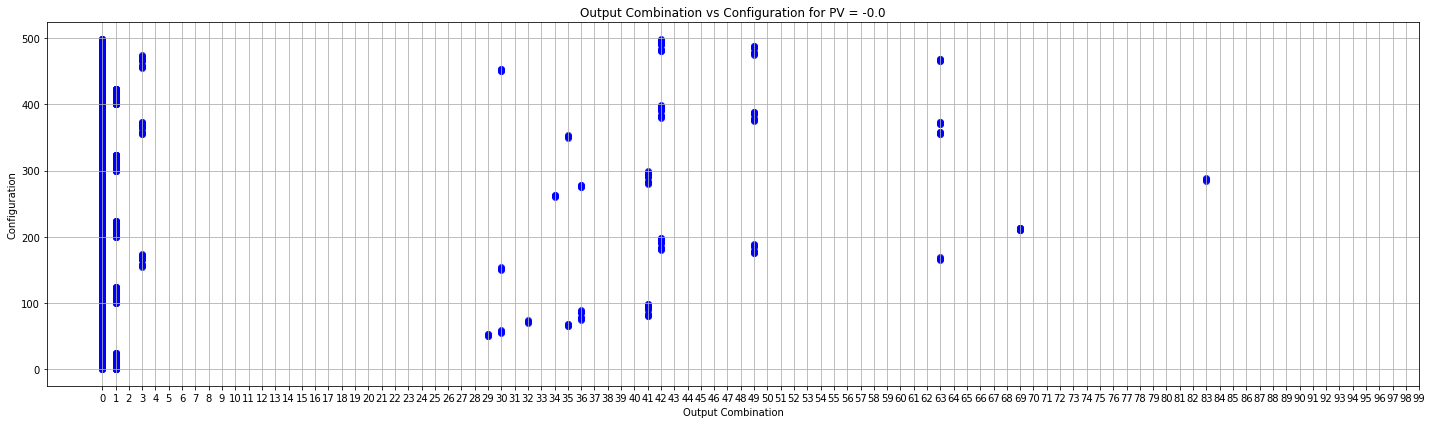

Process Variation:  -0.0
Configs Causing Error:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 

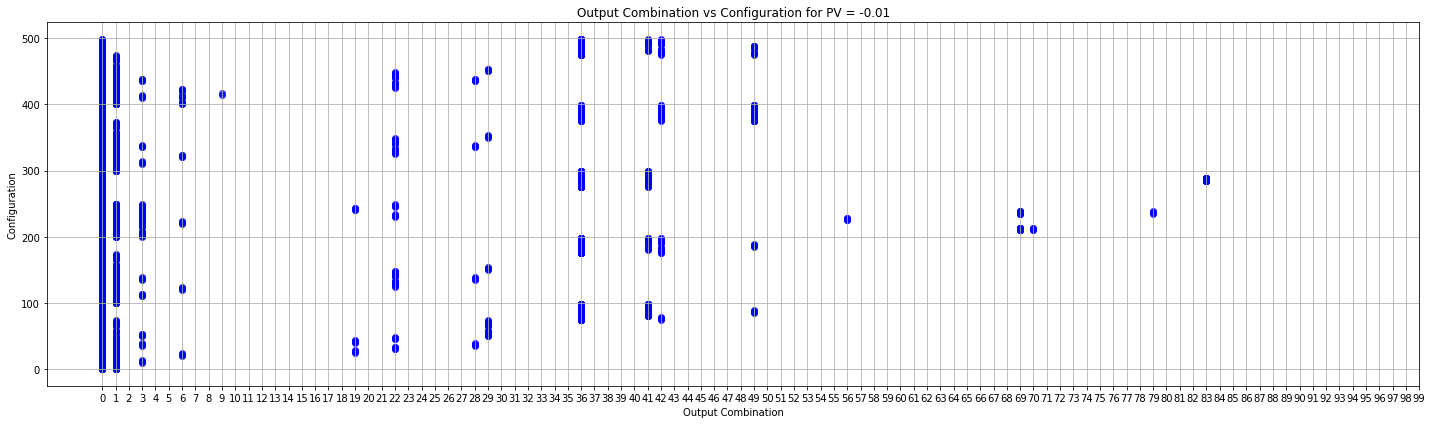

Process Variation:  -0.01
Configs Causing Error:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211,

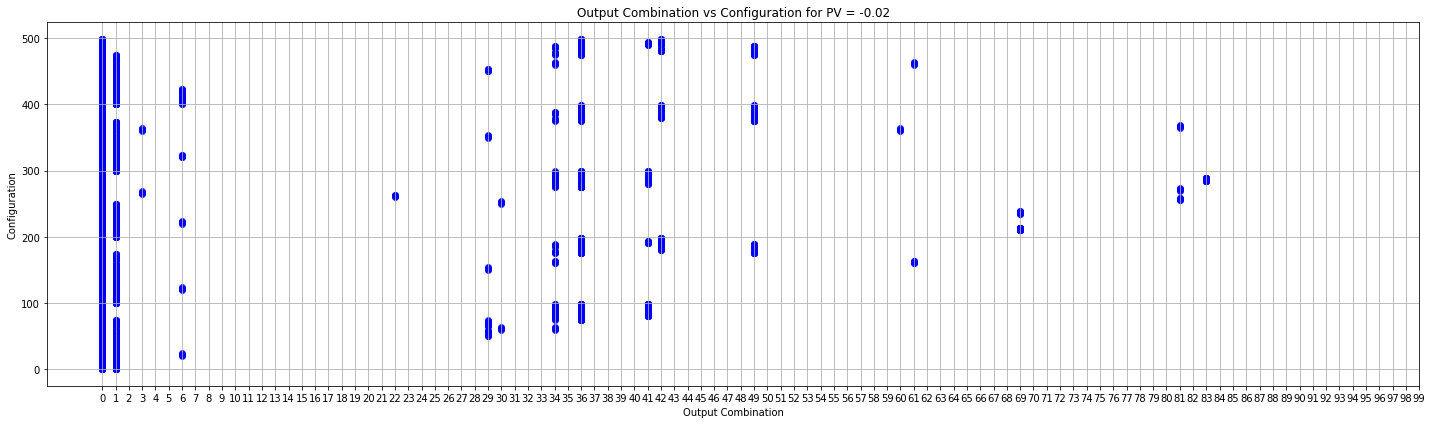

Process Variation:  -0.02
Configs Causing Error:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211,

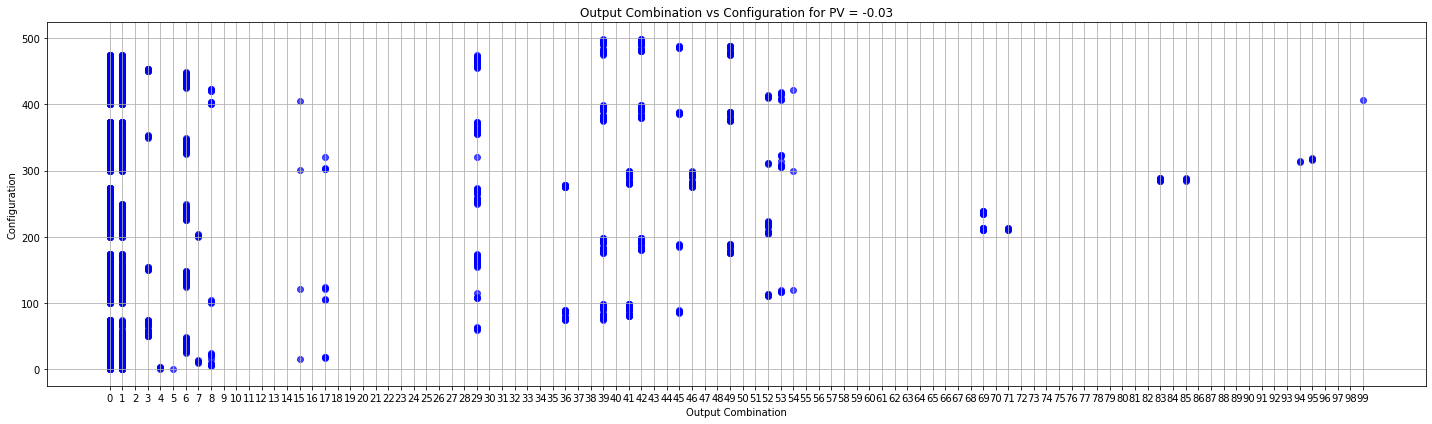

Process Variation:  -0.03
Configs Causing Error:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211,

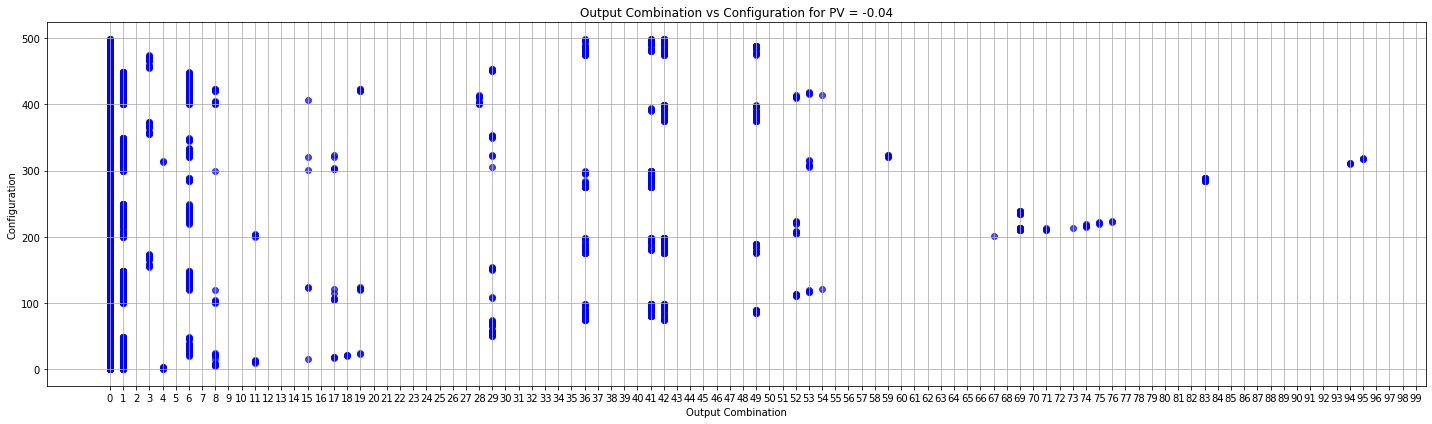

Process Variation:  -0.04
Configs Causing Error:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211,

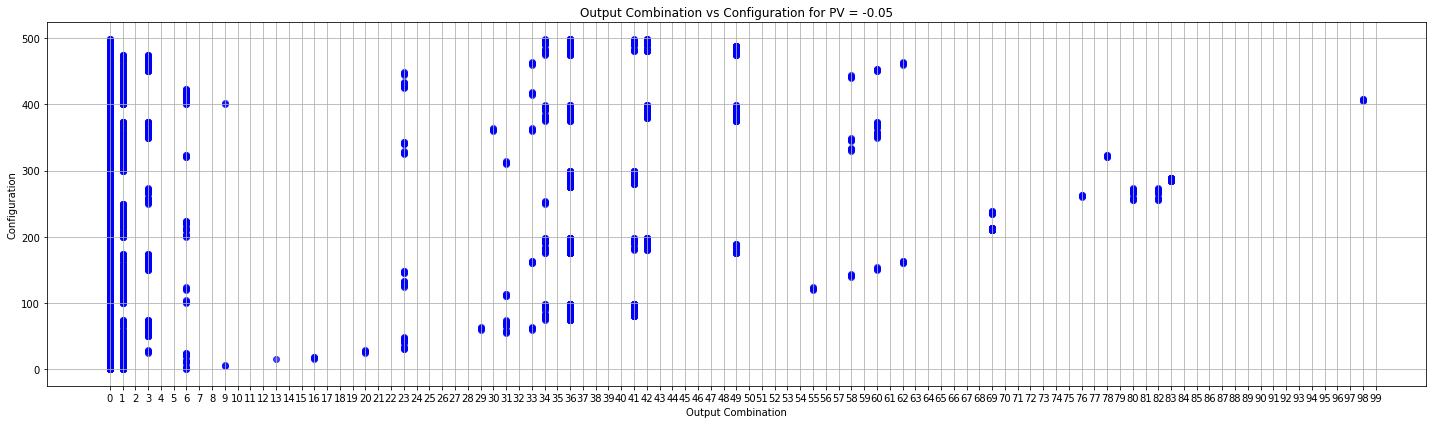

Process Variation:  -0.05
Configs Causing Error:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211,

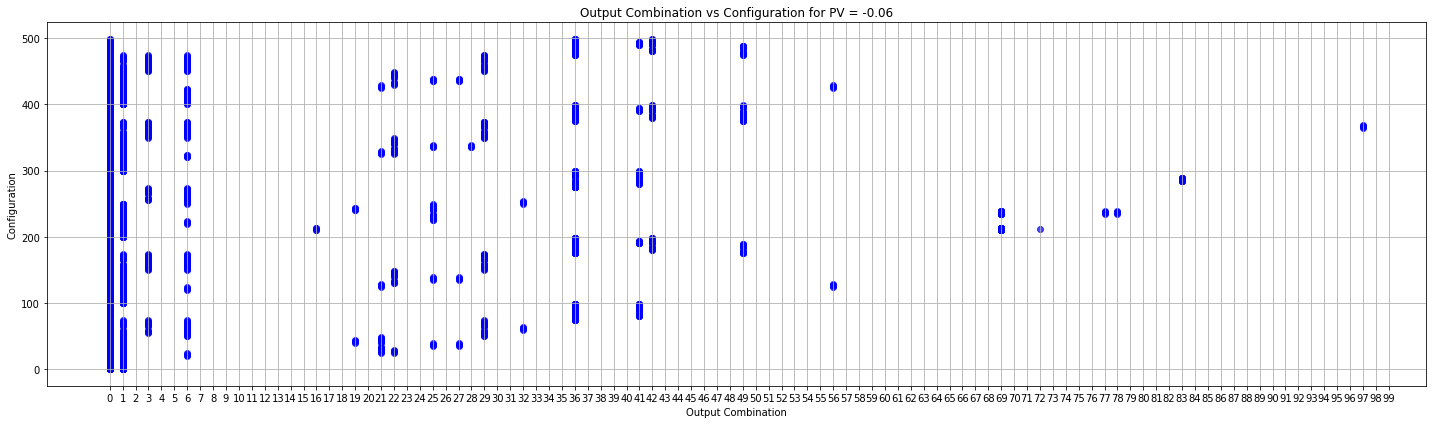

Process Variation:  -0.06
Configs Causing Error:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211,

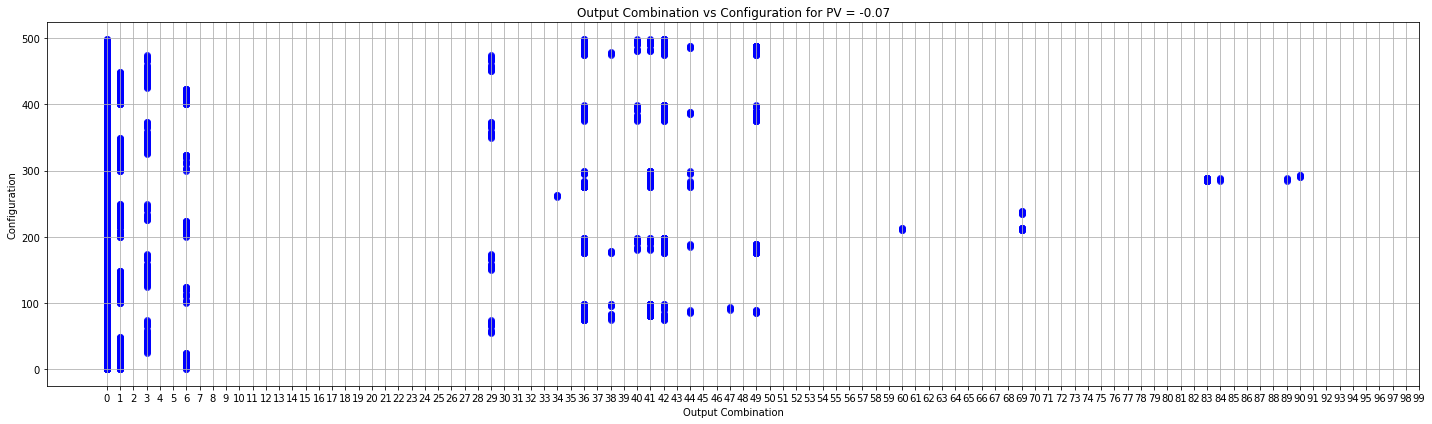

Process Variation:  -0.07
Configs Causing Error:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211,

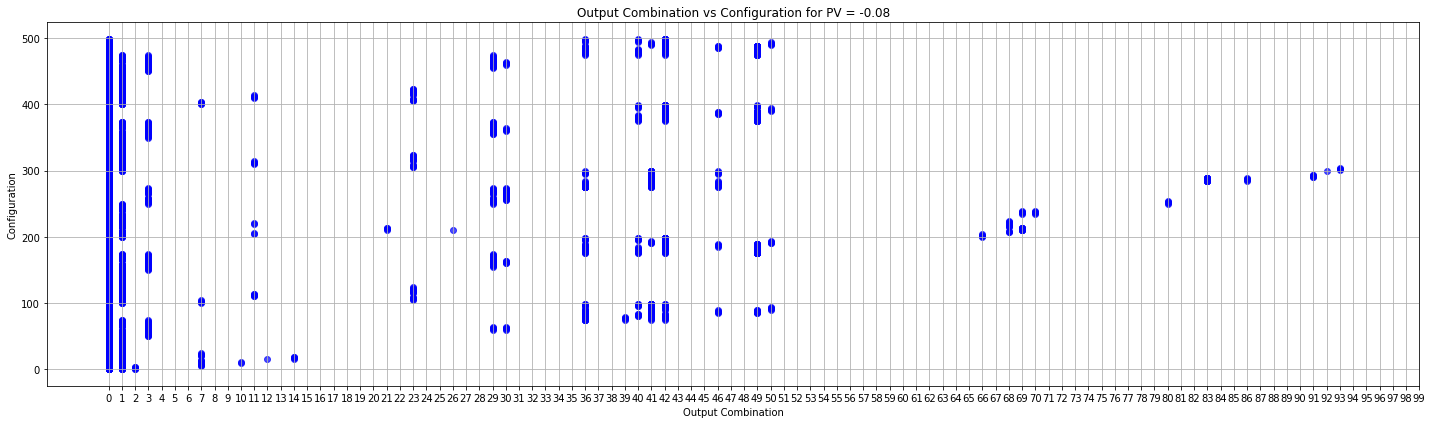

Process Variation:  -0.08
Configs Causing Error:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211,

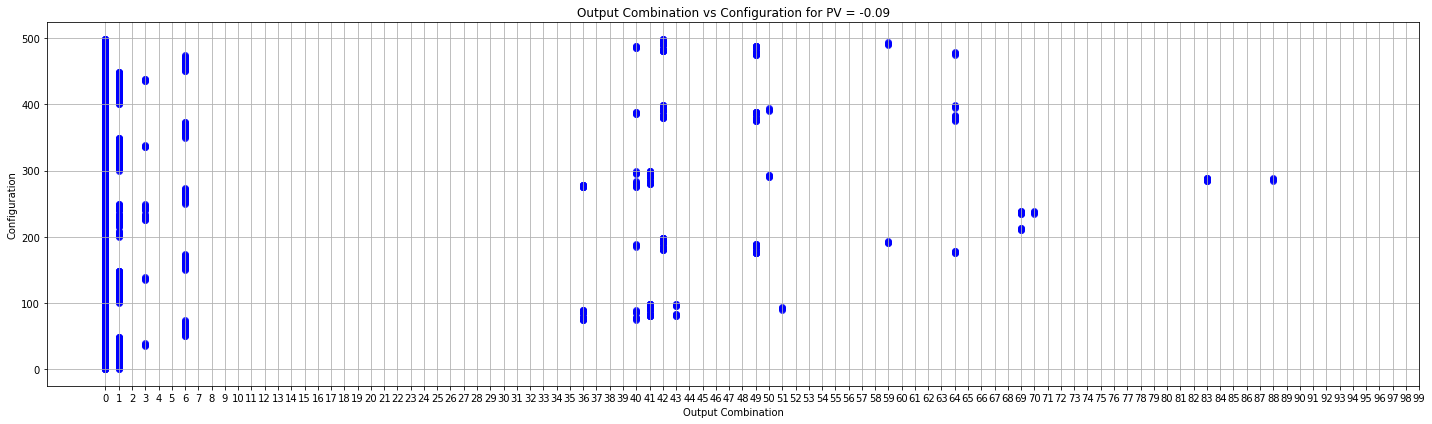

Process Variation:  -0.09
Configs Causing Error:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211,

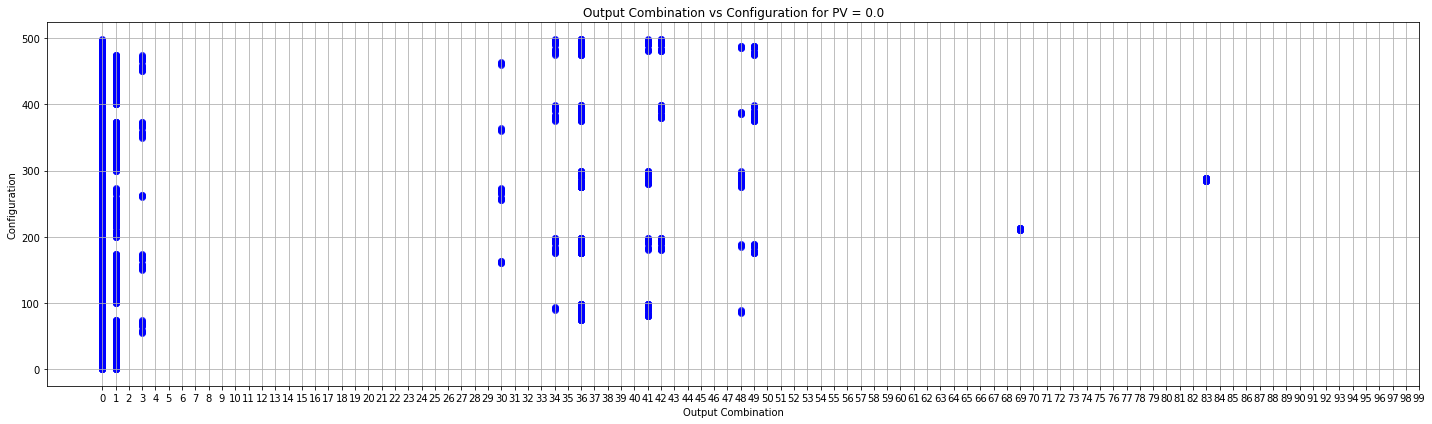

Process Variation:  0.0
Configs Causing Error:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 2

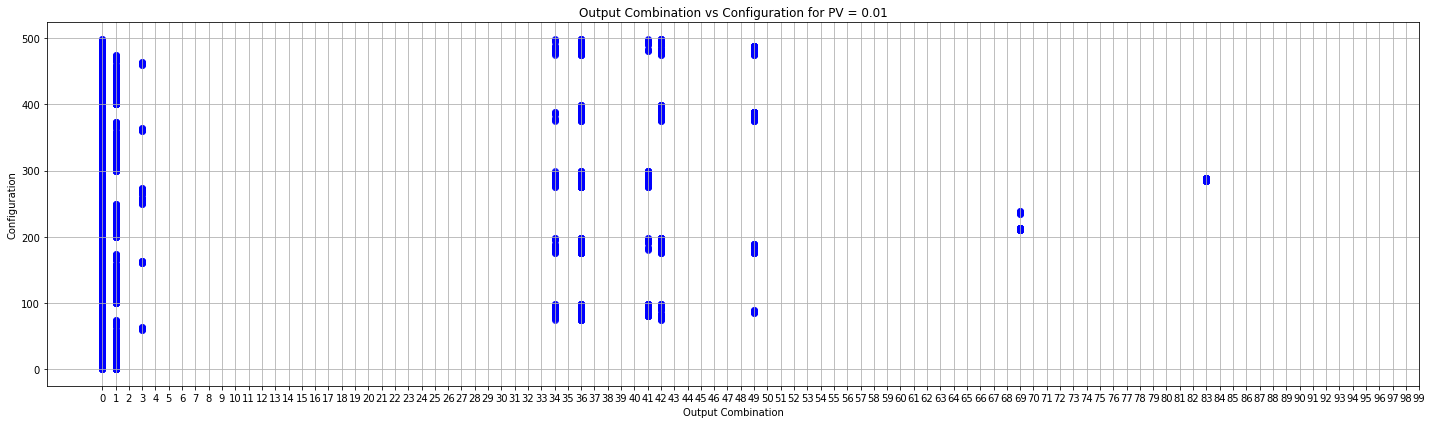

Process Variation:  0.01
Configs Causing Error:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 

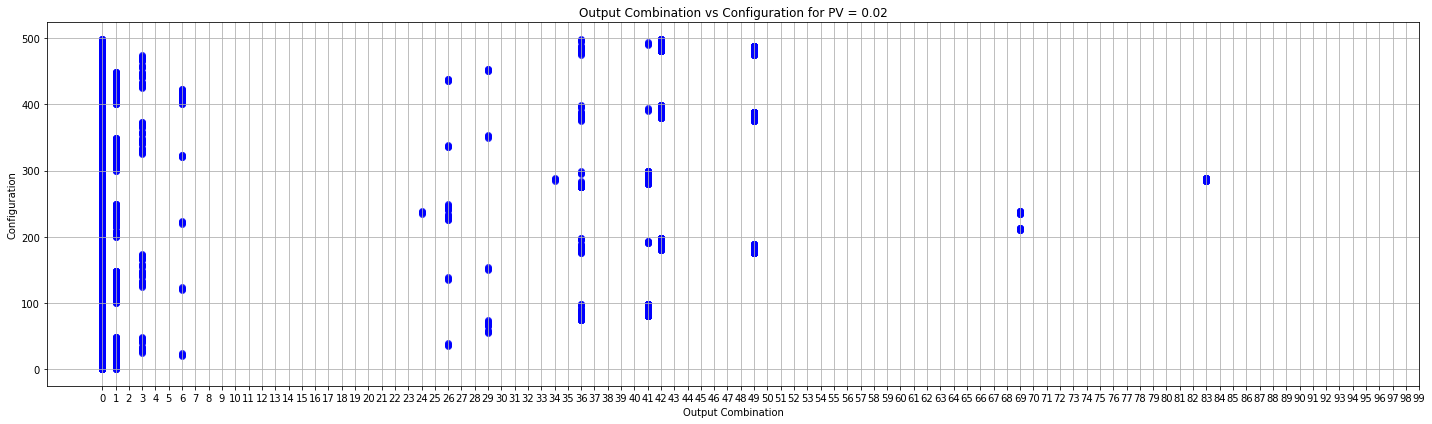

Process Variation:  0.02
Configs Causing Error:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 

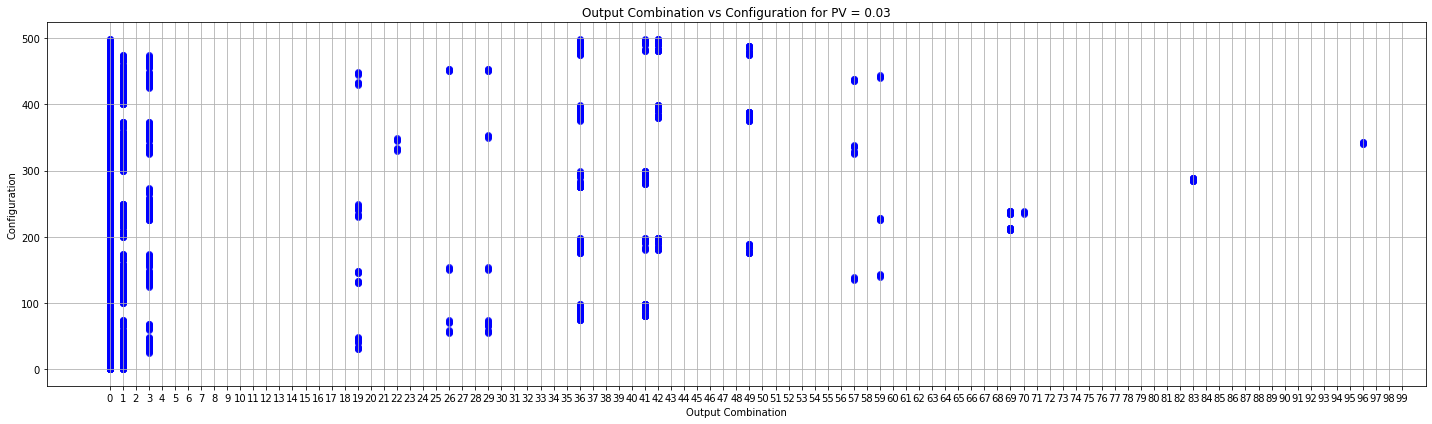

Process Variation:  0.03
Configs Causing Error:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 

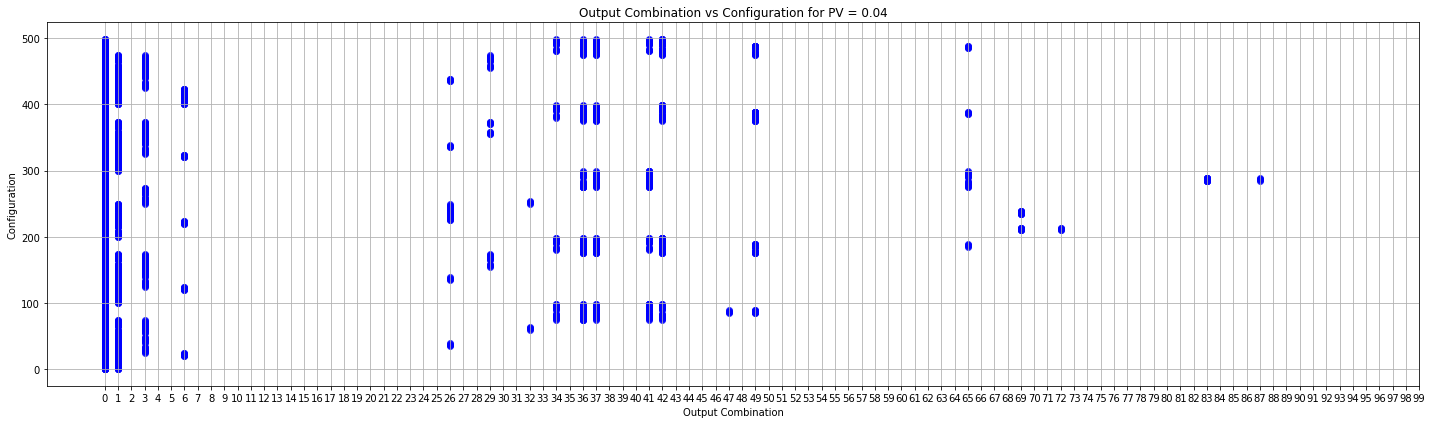

Process Variation:  0.04
Configs Causing Error:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 

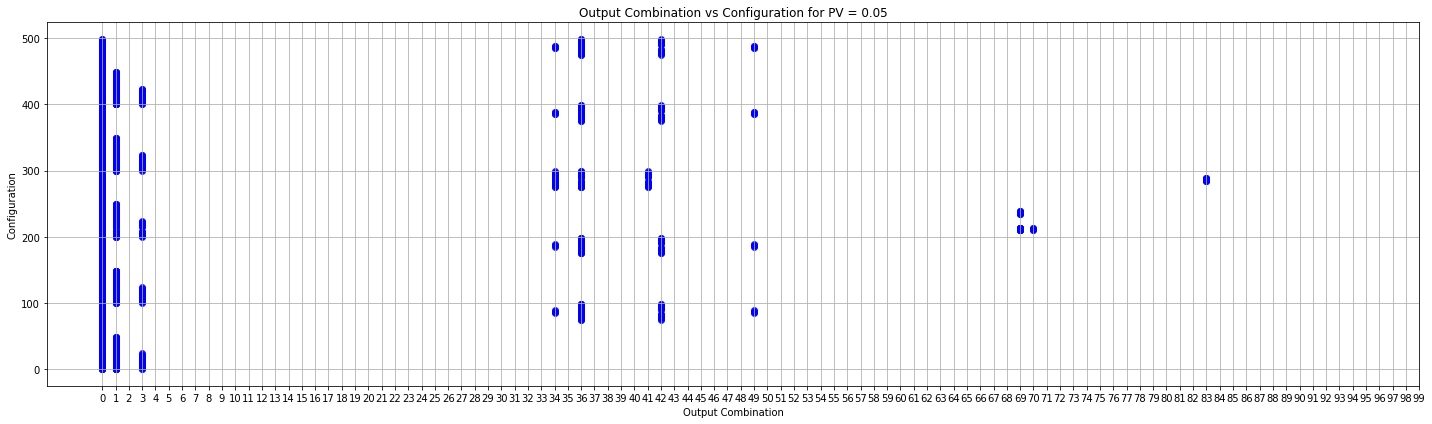

Process Variation:  0.05
Configs Causing Error:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 

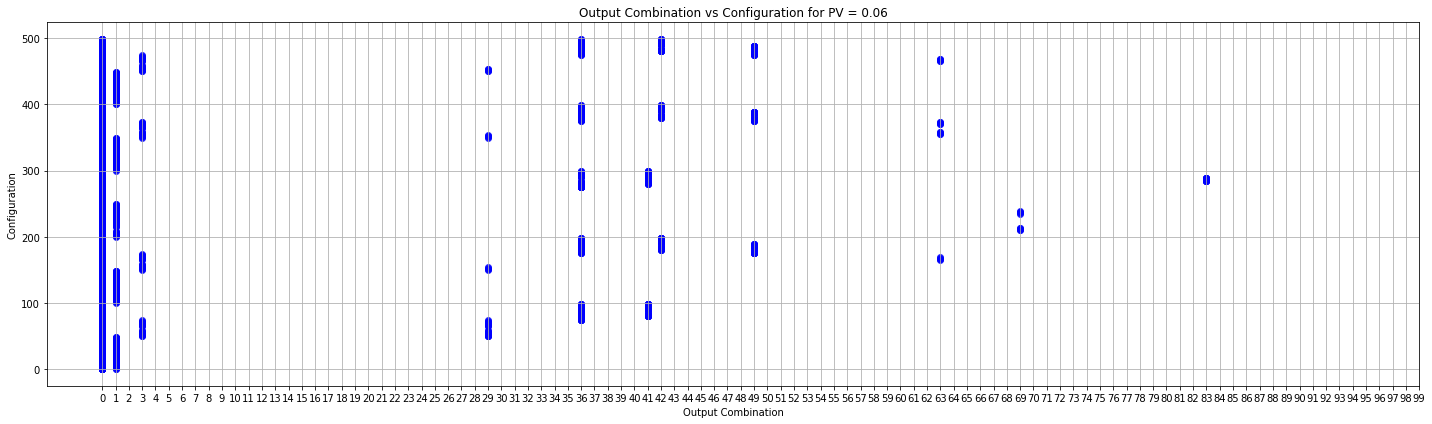

Process Variation:  0.06
Configs Causing Error:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 

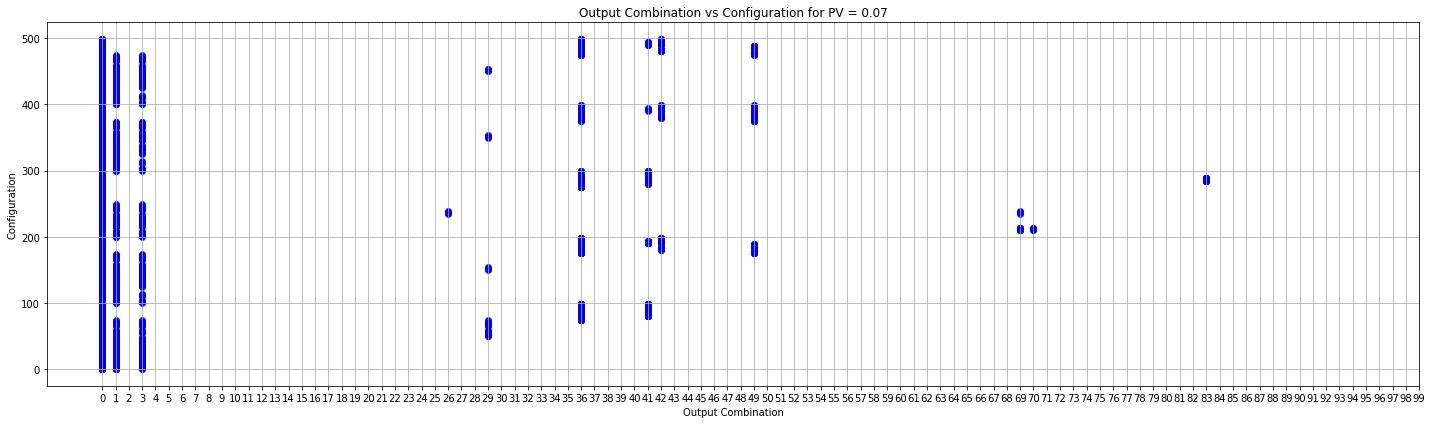

Process Variation:  0.07
Configs Causing Error:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 

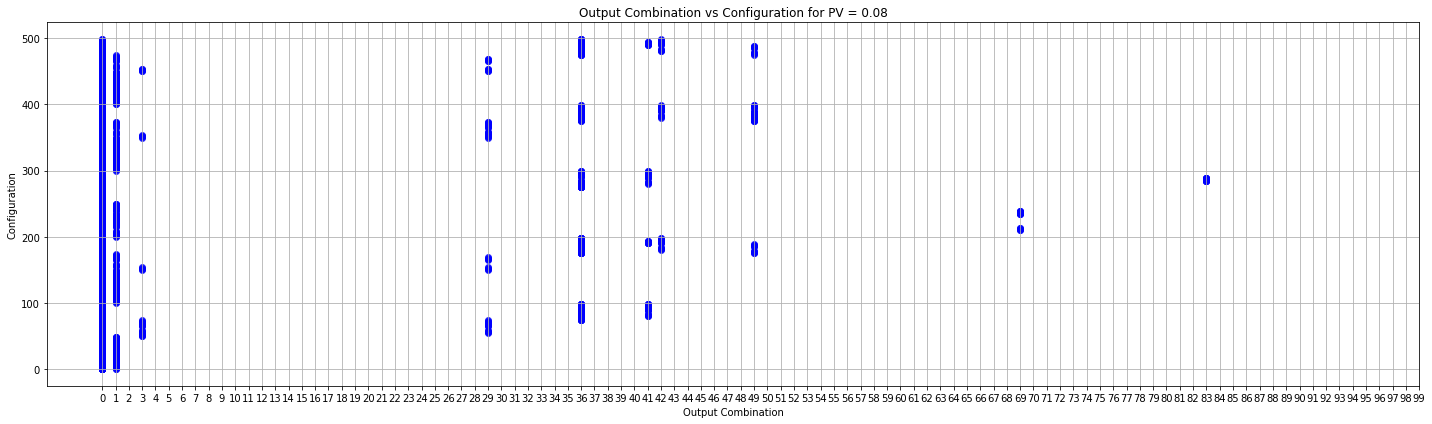

Process Variation:  0.08
Configs Causing Error:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 

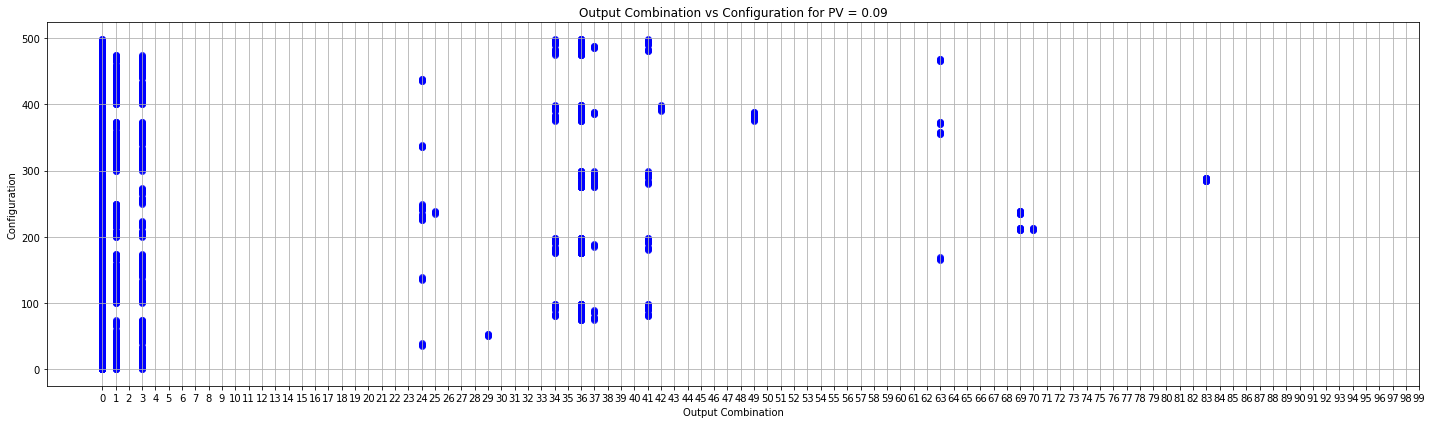

Process Variation:  0.09
Configs Causing Error:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 

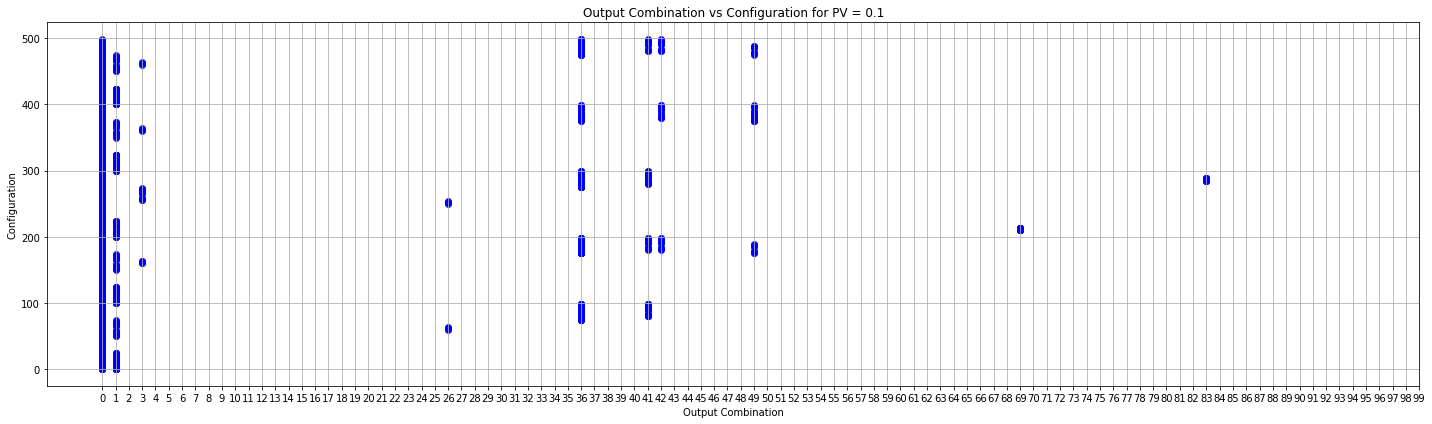

Process Variation:  0.1
Configs Causing Error:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 2

In [16]:
for var in sorted(variations):
    
    sample =df[df['Process Variation']== var]

    all_outputs = []
    all_configs = []

    for idx, row in sample.iterrows():
        output = row['output_numeric']
        config = row['config_numeric']
        
        all_outputs.append(output)
        all_configs.append(config)

    plt.figure(figsize=(20, 6))
    plt.scatter(all_outputs, all_configs, marker='o', color='blue', alpha=0.7)
    plt.xlabel('Output Combination')
    plt.ylabel('Configuration')
    plt.title('Output Combination vs Configuration for PV = '+ var)
    plt.grid(True)
    plt.xticks(range(100)) 
    plt.tight_layout()
    plt.show()

    print ("Process Variation: ", var)
    unique_configs = list(set(all_configs))
    print ("Configs Causing Error: " , unique_configs)

    values_not_in_unique = [x for x in range(0, 500) if x not in unique_configs]
    print ("Configs Not Causing Error: " , values_not_in_unique)

    unique_outputs = sorted(list(set(filter(lambda x: x != 0, all_outputs))))
    print ("Occuring Output Combinations For Given PV: " , unique_outputs)

    values_not_in_unique_outputs = sorted([x for x in range(1, 99) if x not in unique_outputs])
    print ("Non-Occuring Output Combinations For Given PV: " , values_not_in_unique_outputs)

    del sample
    del all_configs
    del all_outputs
    del unique_configs
    del values_not_in_unique
    del unique_outputs
    del values_not_in_unique_outputs

    # plt.close()


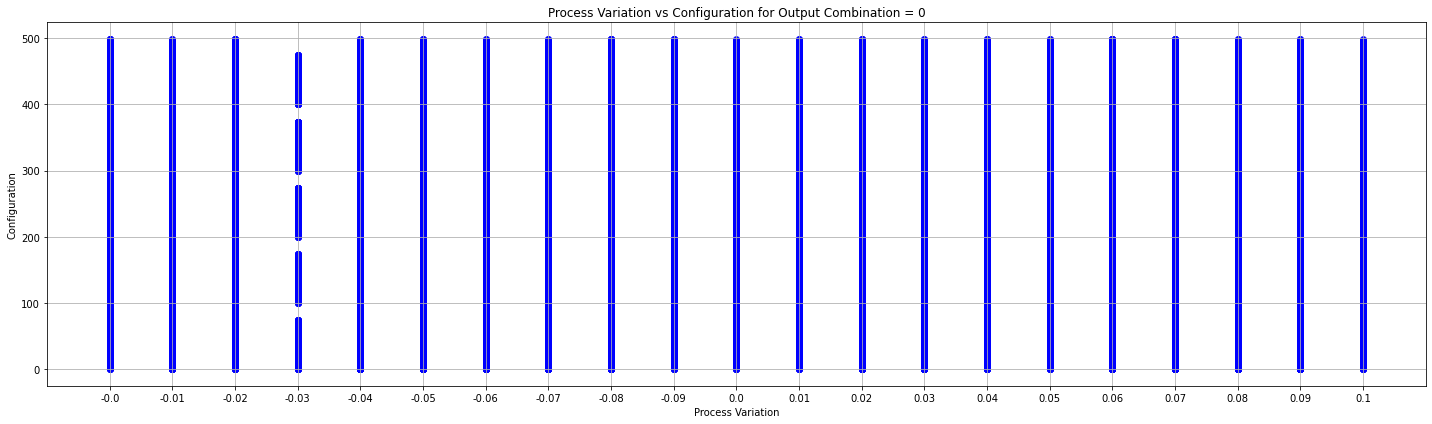

Output Combination:  0


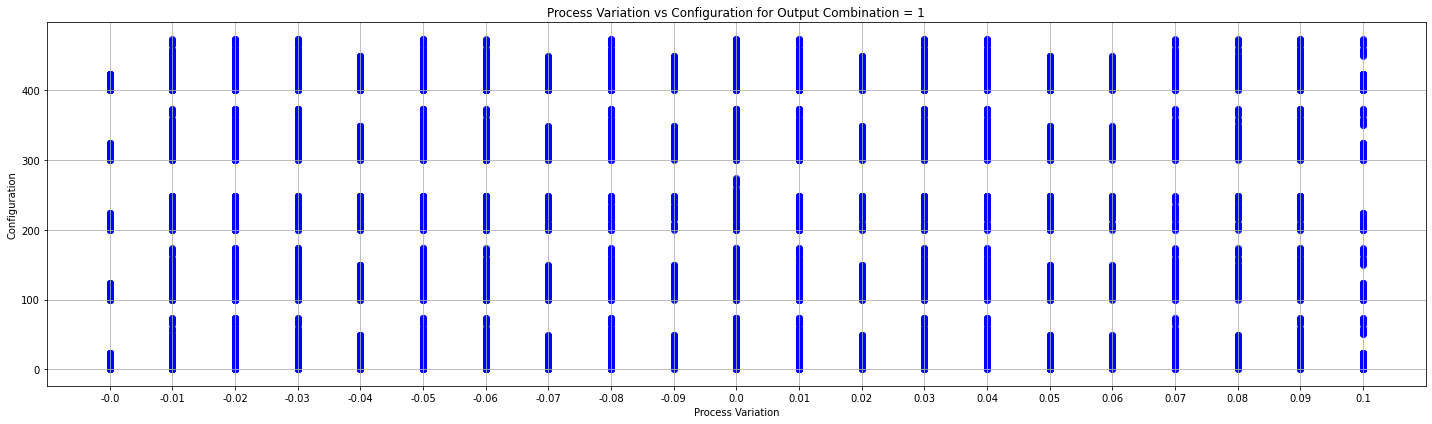

Output Combination:  1


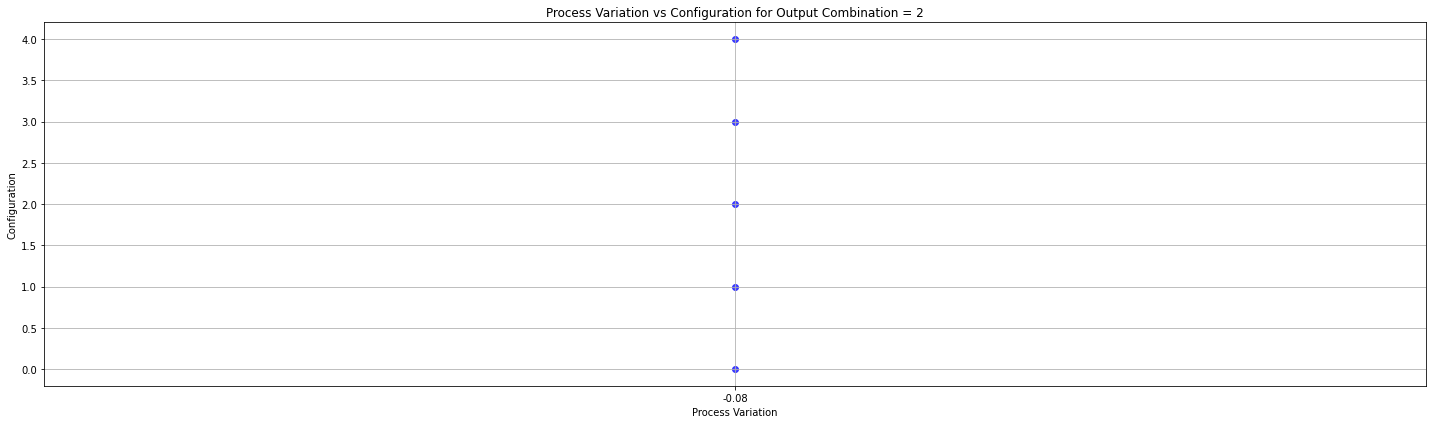

Output Combination:  2


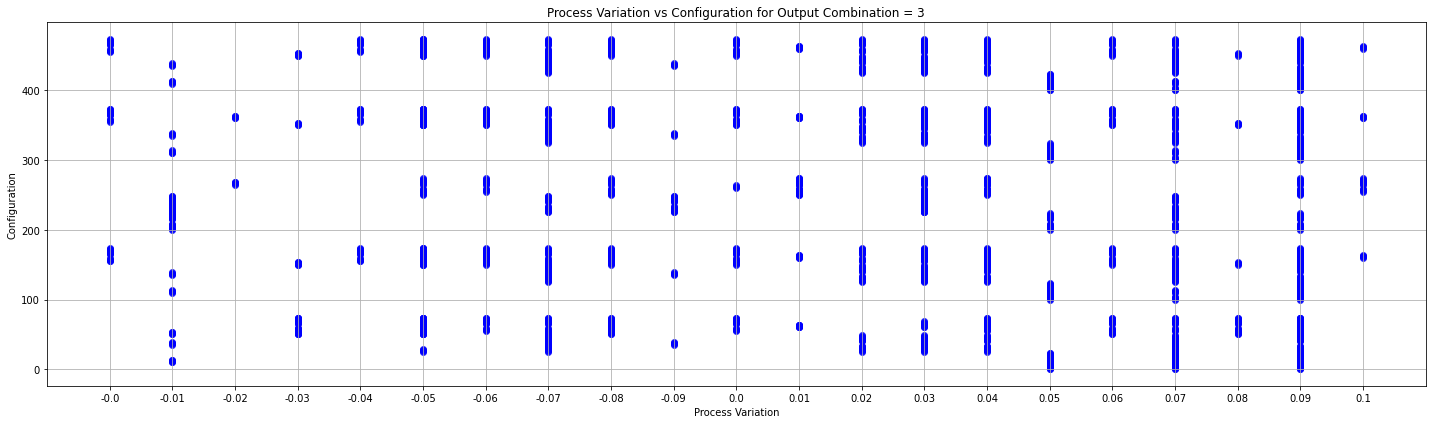

Output Combination:  3


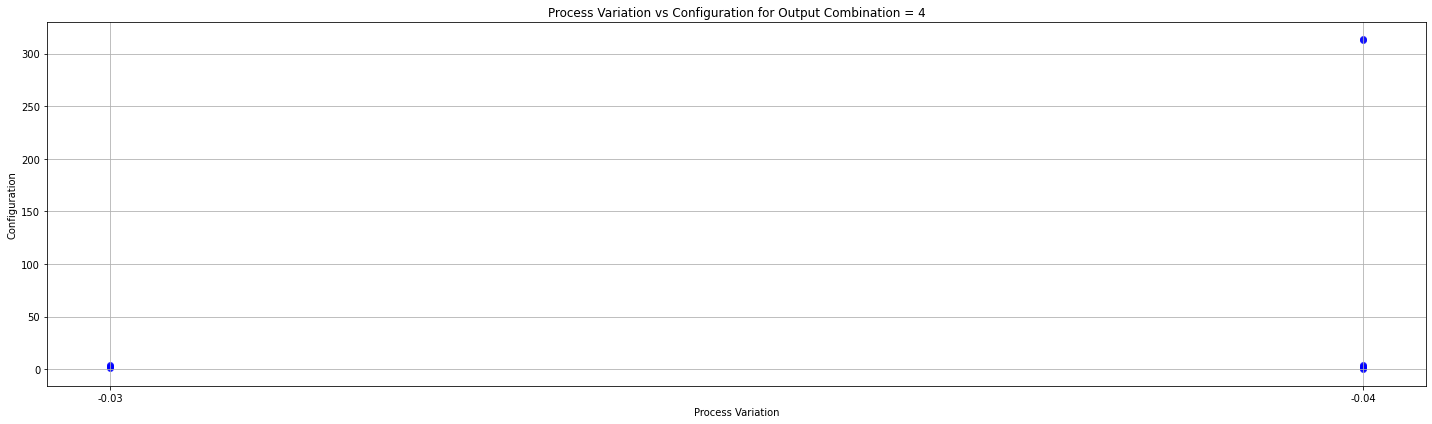

Output Combination:  4


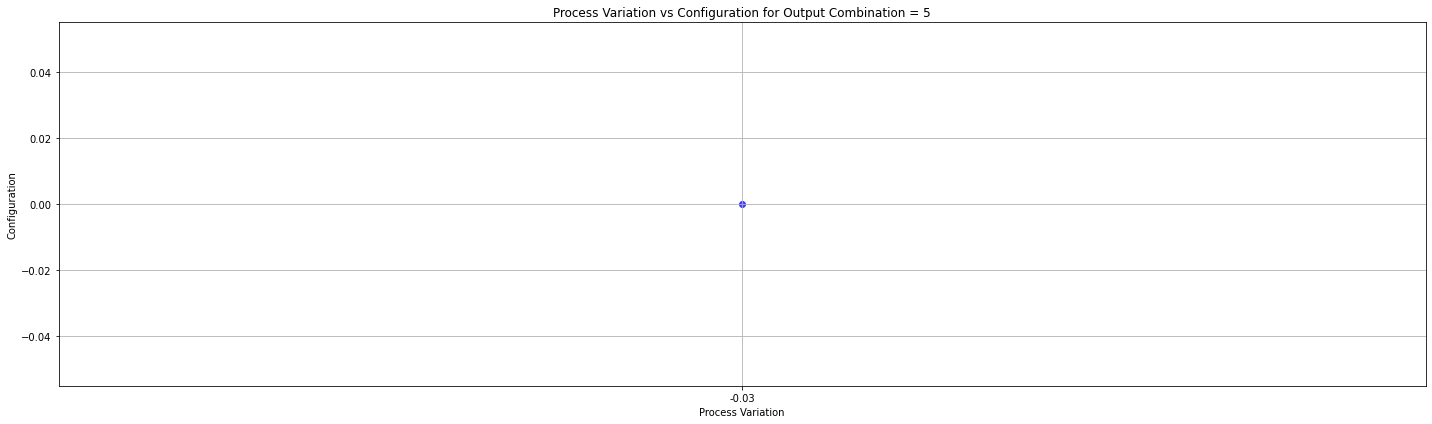

Output Combination:  5


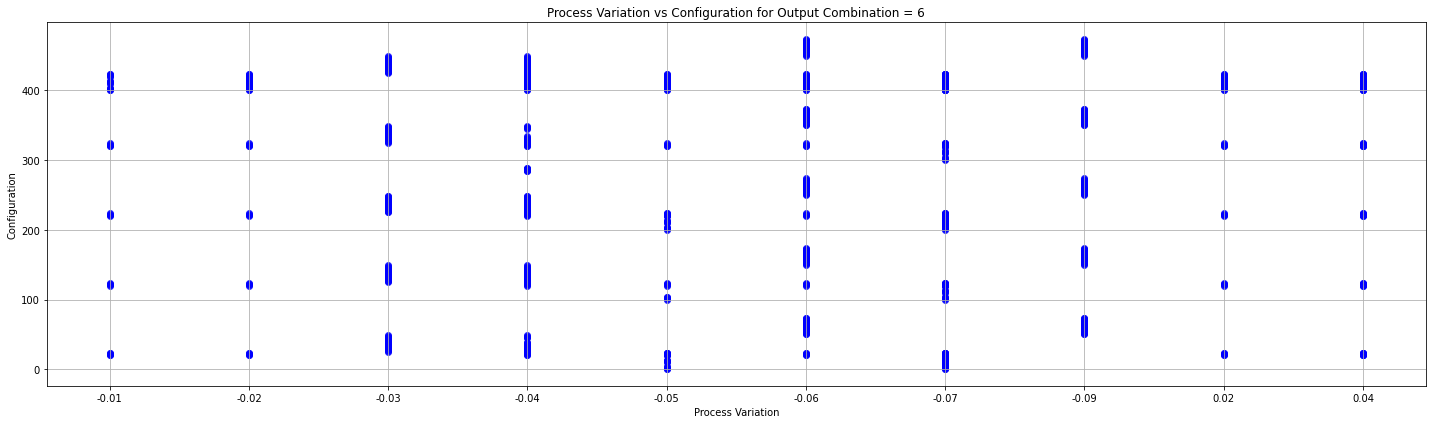

Output Combination:  6


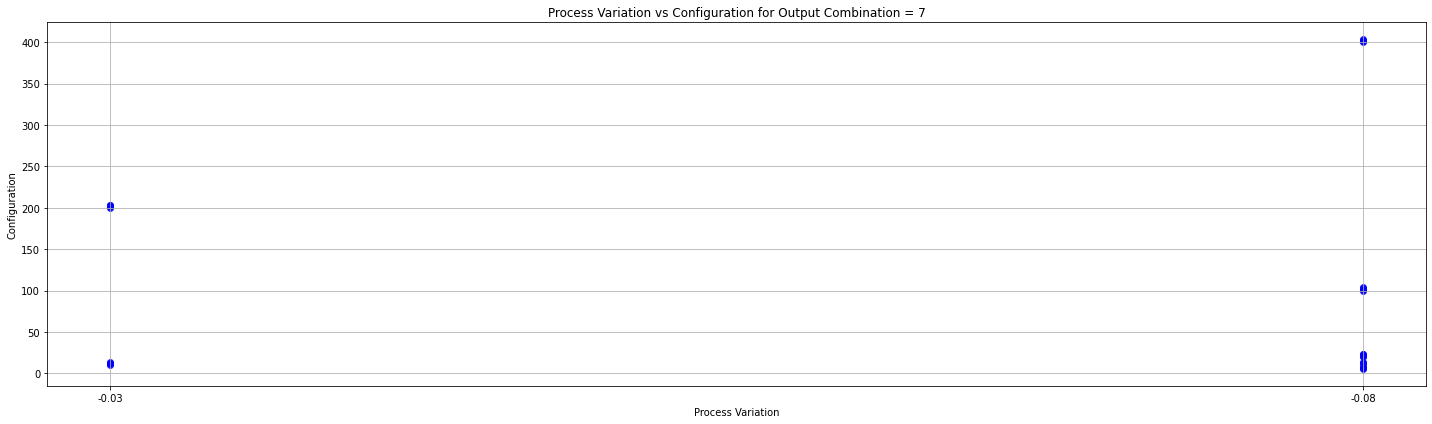

Output Combination:  7


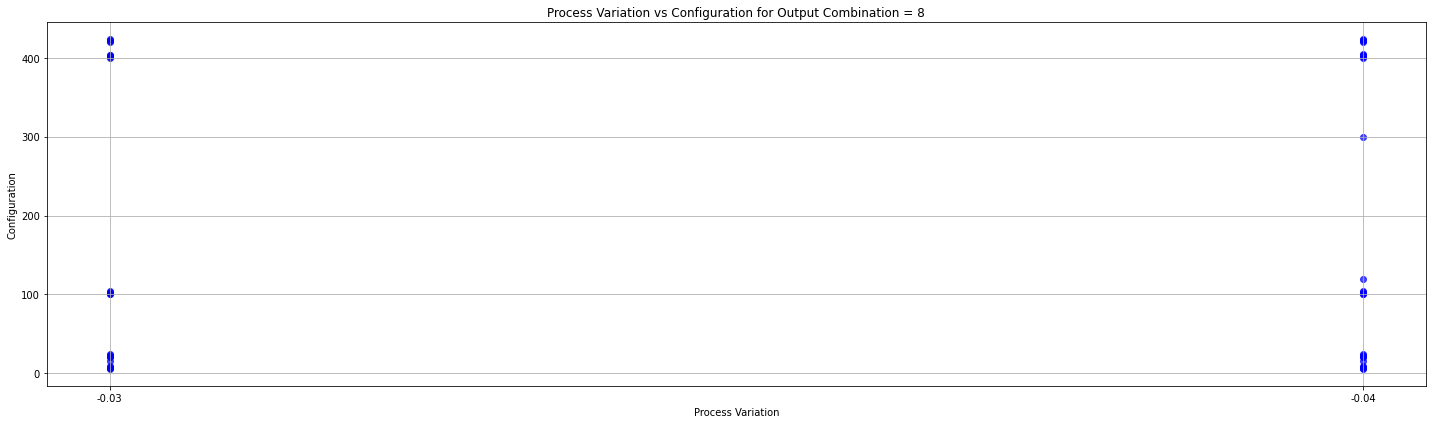

Output Combination:  8


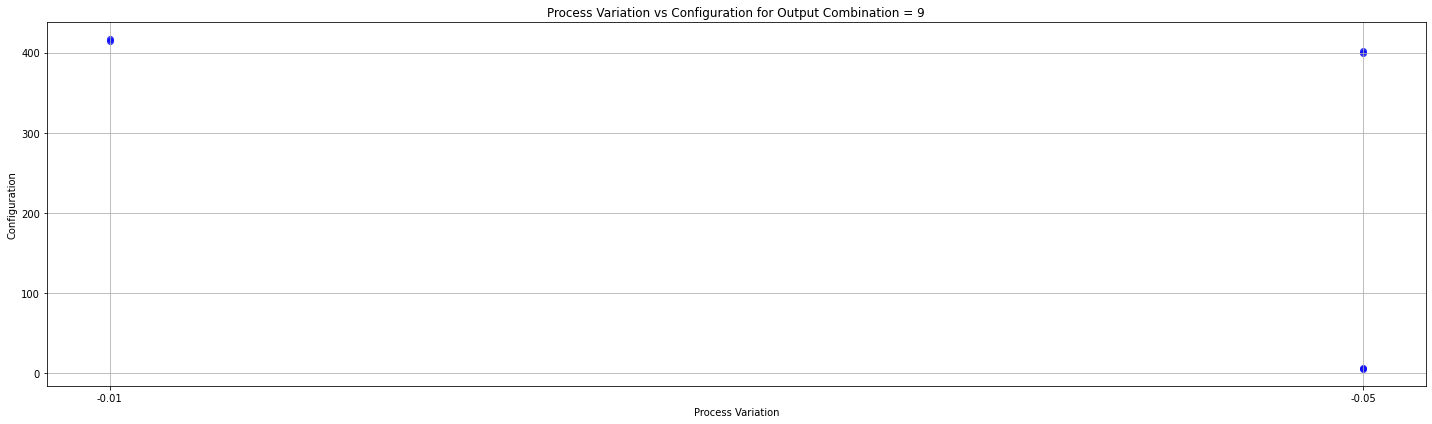

Output Combination:  9


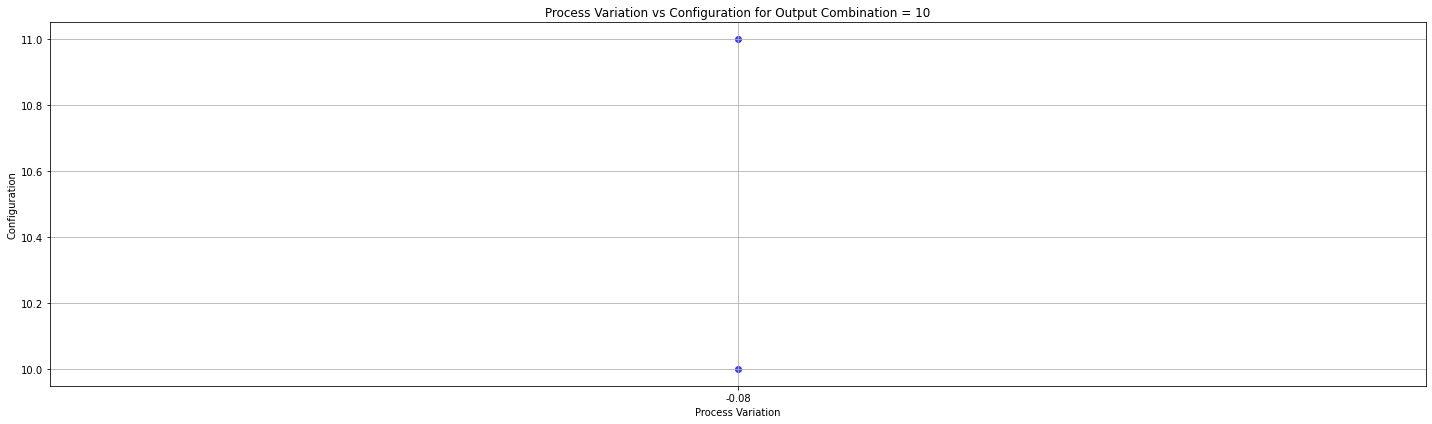

Output Combination:  10


In [17]:
for val in range(0, 11): #hold output combination constant
    
    sample =df[df['output_numeric']== val]

    all_process_variation = []
    all_configs = []

    for idx, row in sample.iterrows():
        pv = row['Process Variation']
        config = row['config_numeric']
        
        all_process_variation.append(pv)
        all_configs.append(config)

    all_process_variation, all_configs = zip(*sorted(zip(all_process_variation, all_configs)))


    plt.figure(figsize=(20, 6))
    plt.scatter(all_process_variation, all_configs, marker='o', color='blue', alpha=0.7)
    plt.xlabel('Process Variation')
    plt.ylabel('Configuration')
    plt.title('Process Variation vs Configuration for Output Combination = '+ str(val))
    plt.grid(True)
    # plt.xticks(range(20)) 
    plt.tight_layout()
    plt.show()

    print ("Output Combination: ", val)  

    del sample
    del all_configs
    del all_process_variation
    # plt.close()

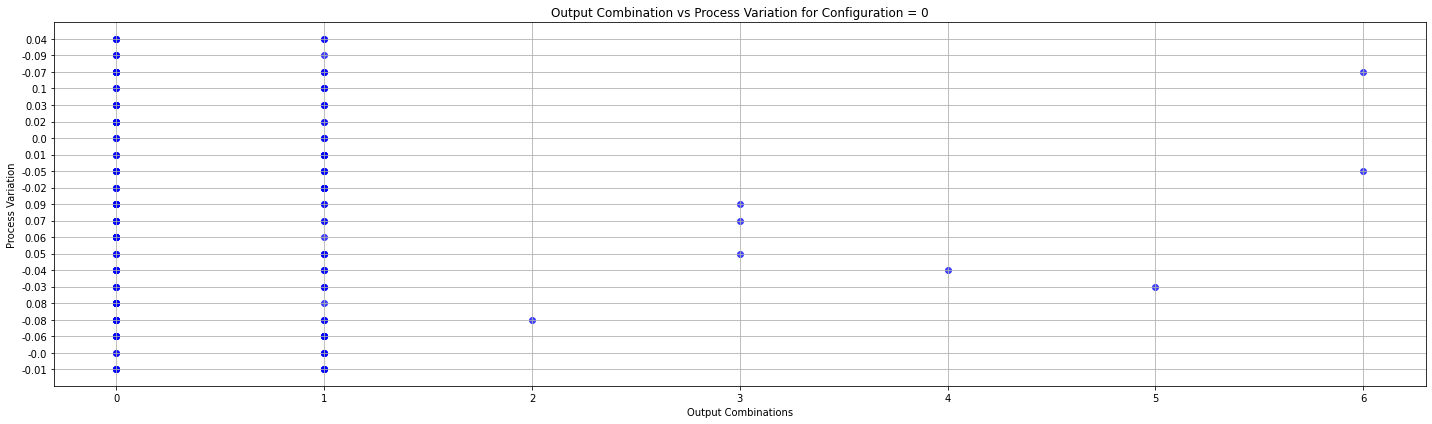

Configuration:  0


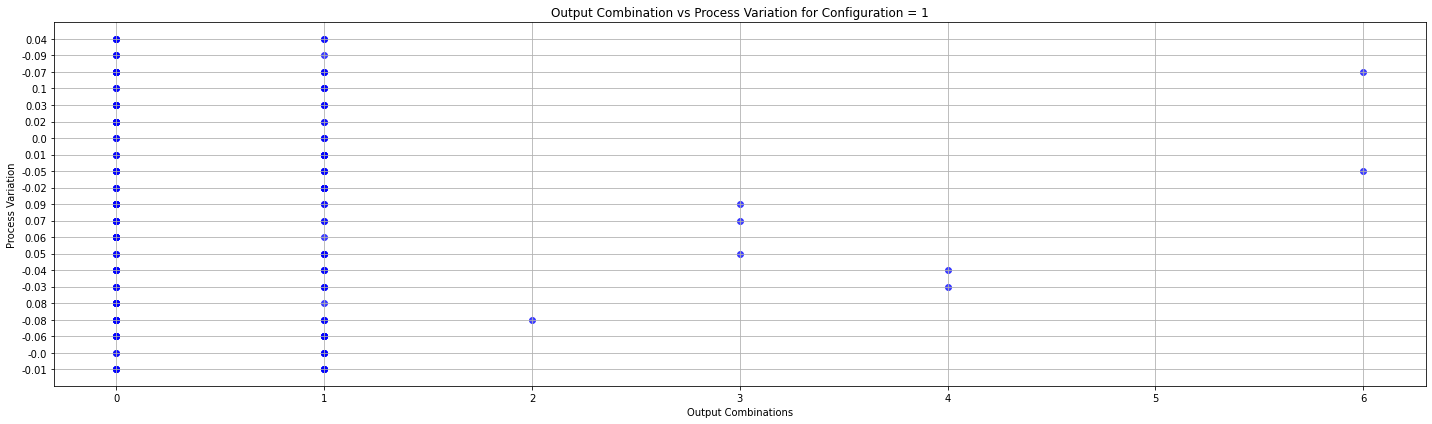

Configuration:  1


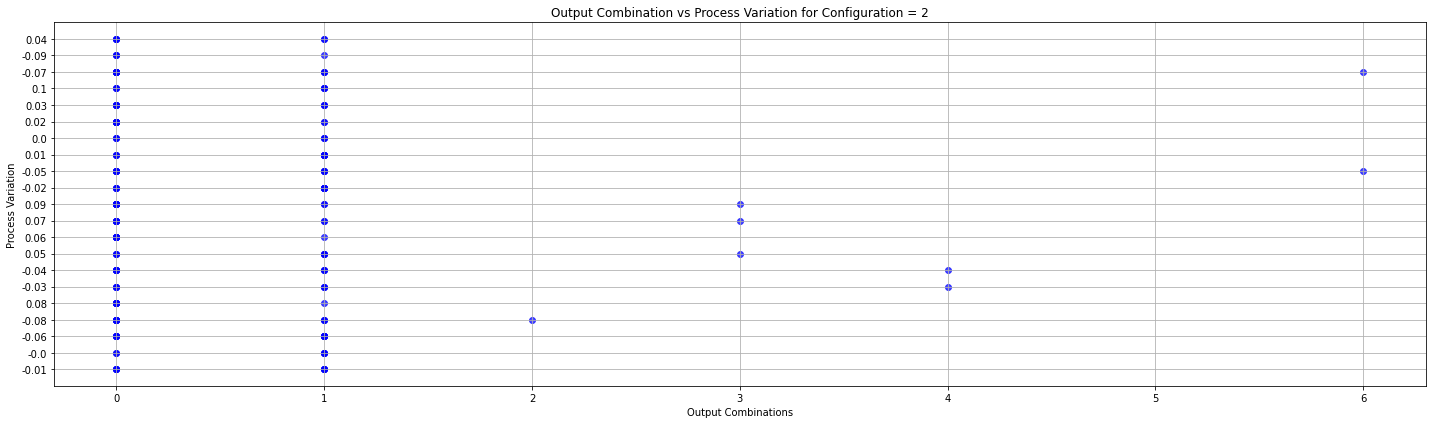

Configuration:  2


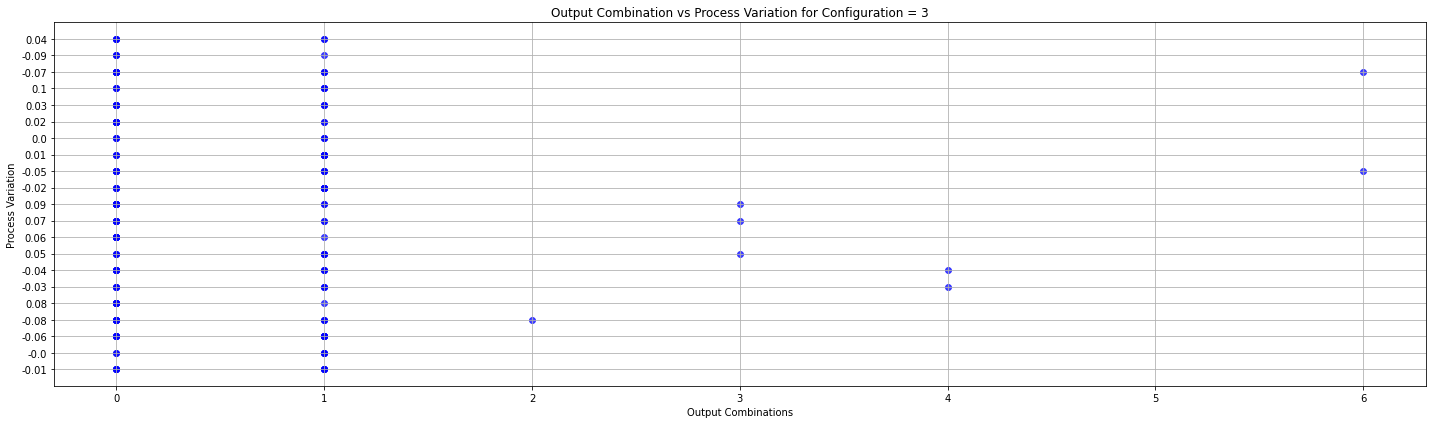

Configuration:  3


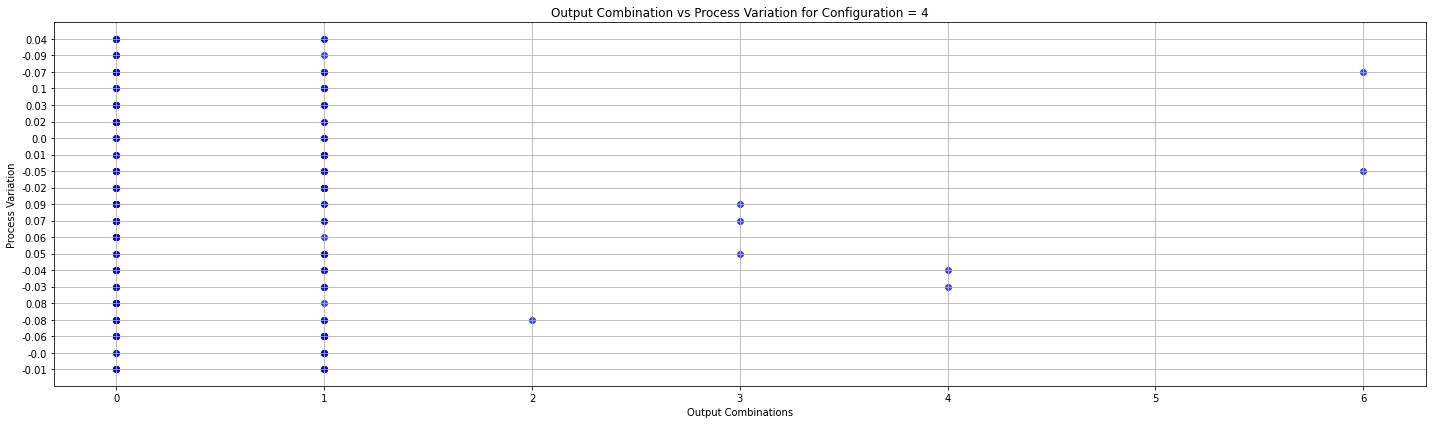

Configuration:  4


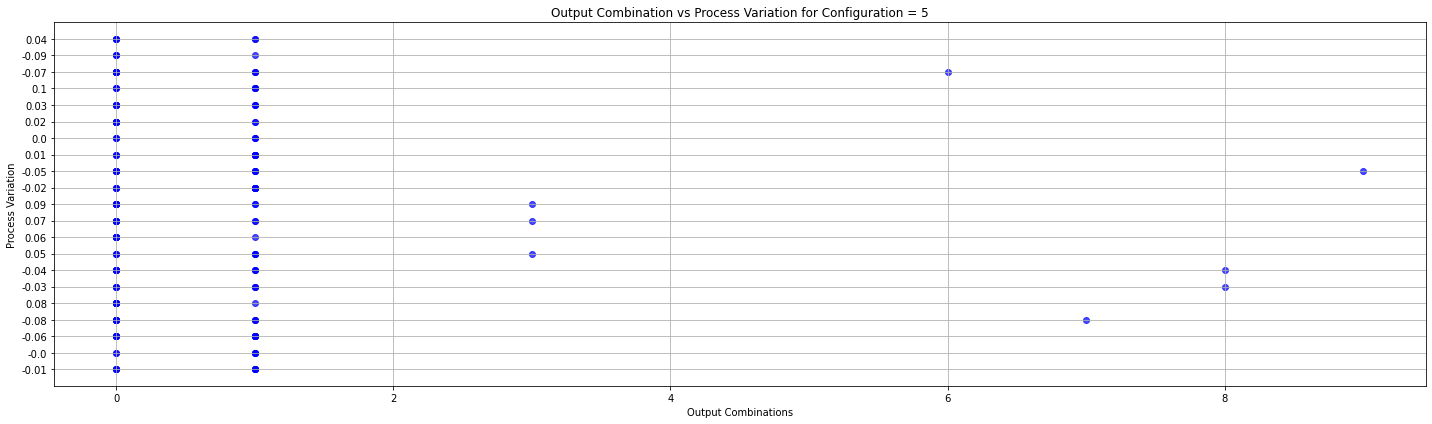

Configuration:  5


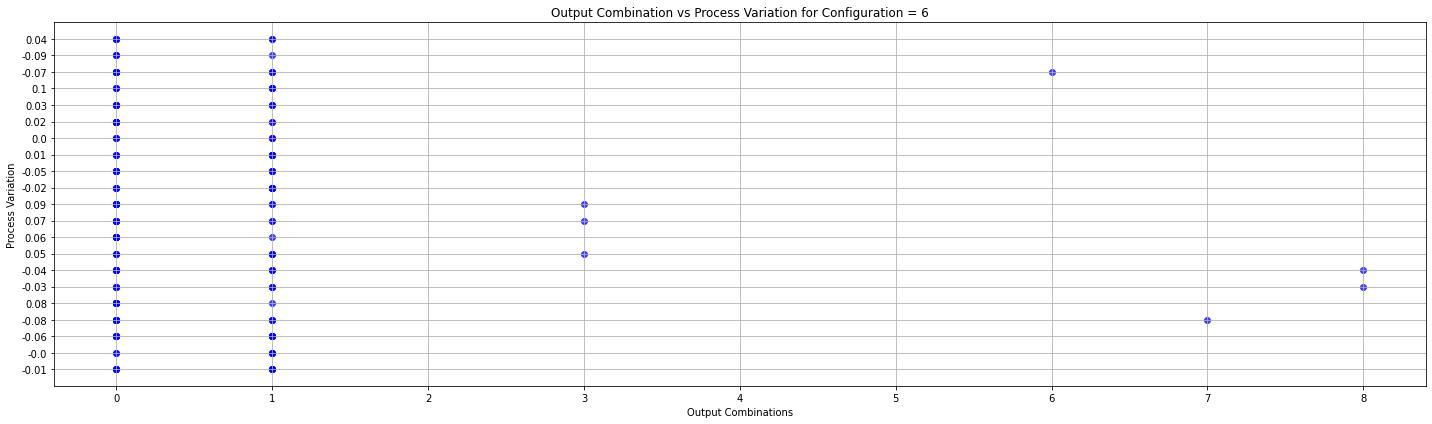

Configuration:  6


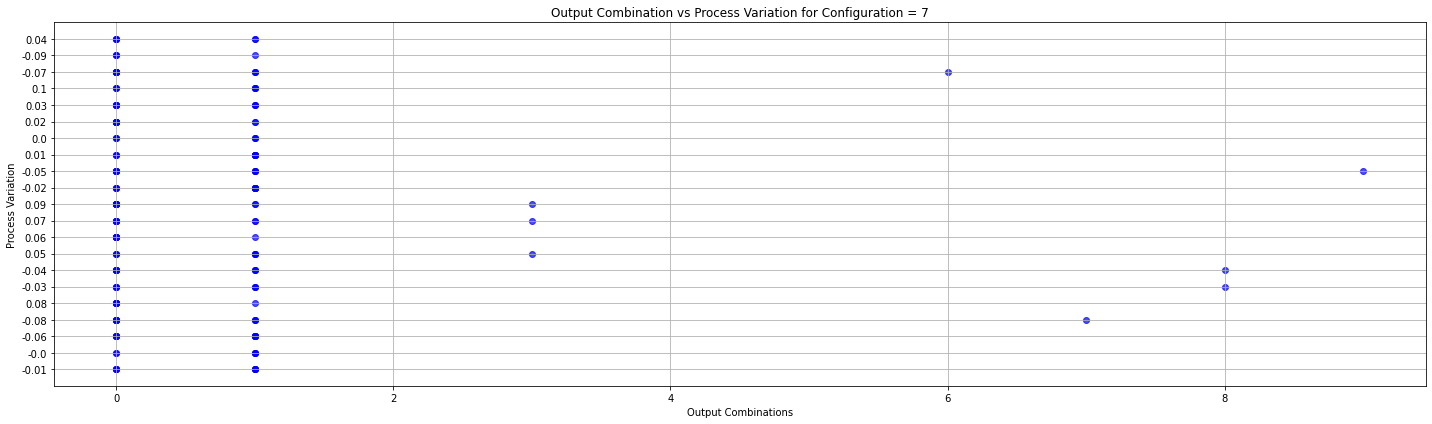

Configuration:  7


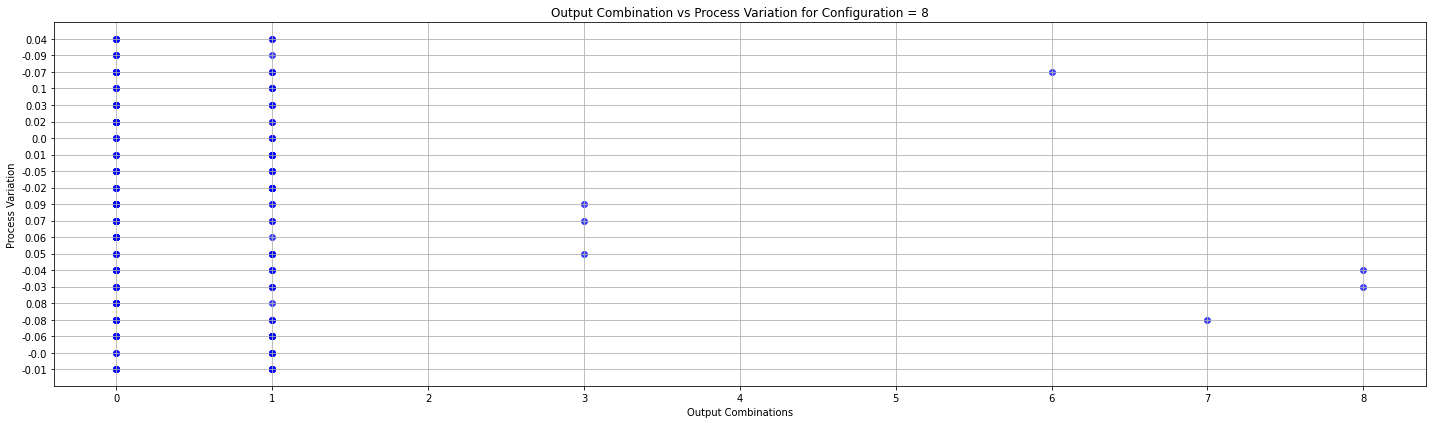

Configuration:  8


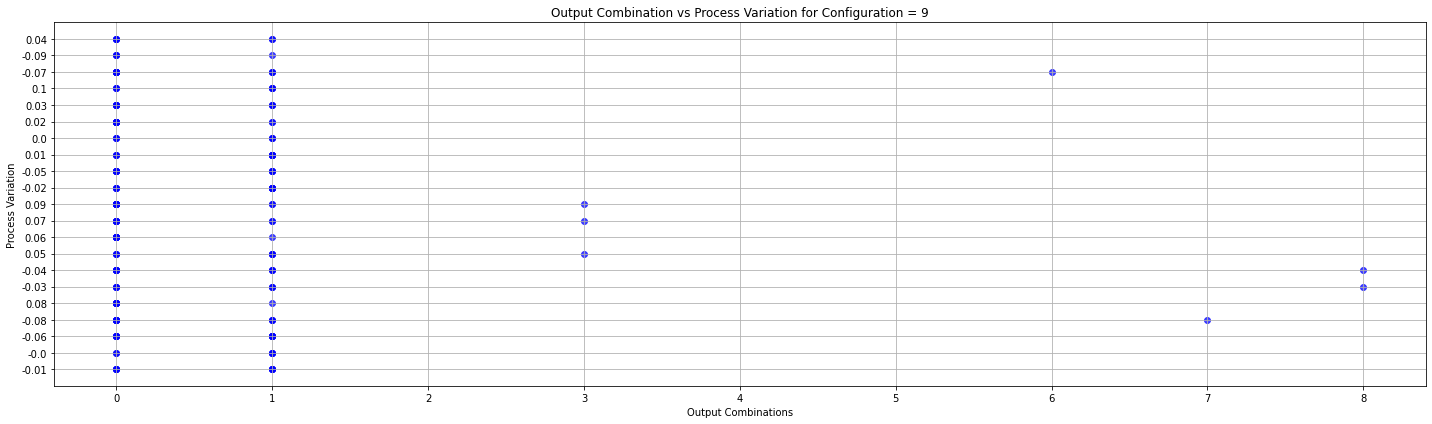

Configuration:  9


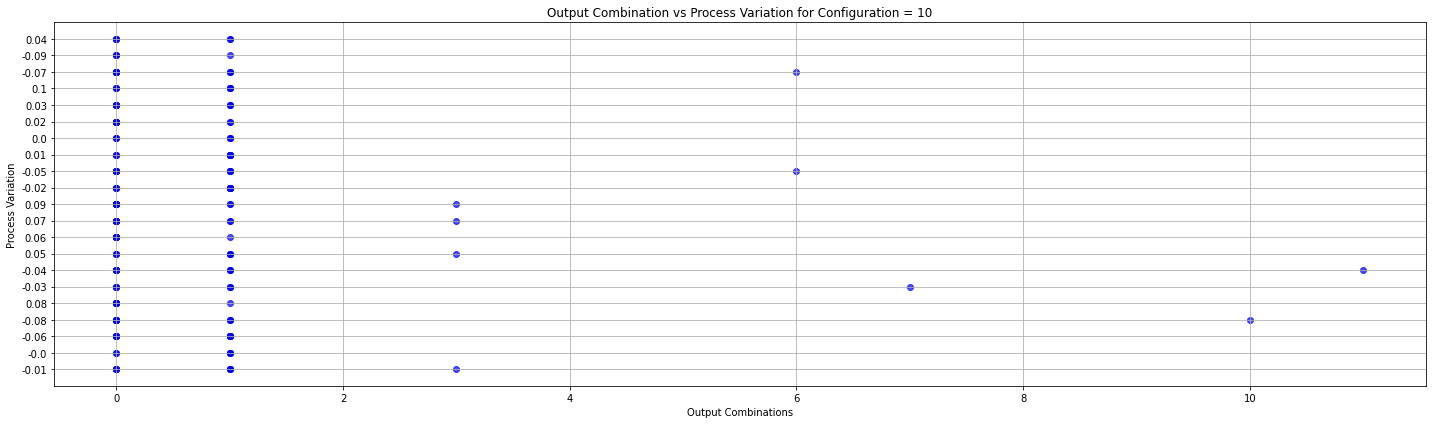

Configuration:  10


In [18]:
for val in range(0, 11): #hold configuration 0-499
    
    sample =df[df['config_numeric']== val]

    all_outputs = []
    all_process_variation = []
    

    for idx, row in sample.iterrows():
        output = row['output_numeric']
        pv = row['Process Variation']
        
        all_outputs.append(output)
        all_process_variation.append(pv)
        

    # all_outputs, all_process_variation = zip(*sorted(zip(all_outputs, all_process_variation)))


    plt.figure(figsize=(20, 6))
    plt.scatter(all_outputs, all_process_variation, marker='o', color='blue', alpha=0.7)
    plt.xlabel('Output Combinations')
    plt.ylabel('Process Variation')
    plt.title('Output Combination vs Process Variation for Configuration = '+ str(val))
    plt.grid(True)
    # plt.xticks(range(20)) 
    plt.tight_layout()
    plt.show()

    print ("Configuration: ", val)  

    del sample
    del all_outputs
    del all_process_variation
    # plt.close()

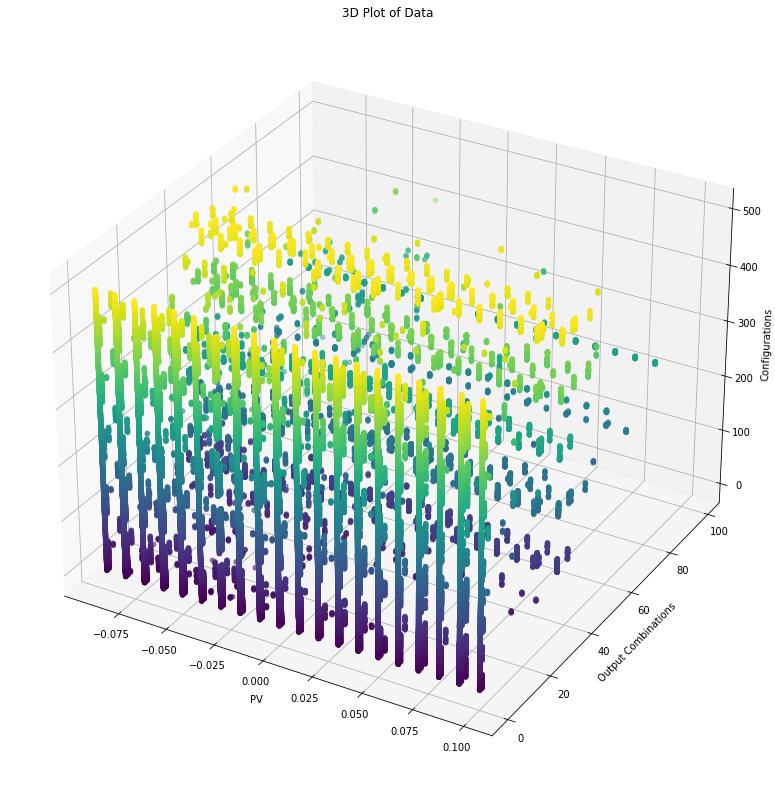

In [19]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d

processVariation = []
outputCombinations = []
configurations = []

for idx, row in df.iterrows():
    pv = row['Process Variation']
    output = row['output_numeric']
    config = row['config_numeric']
    
    processVariation.append(float(pv))
    outputCombinations.append(output)
    configurations.append(config)

# Create a new figure and a 3D axis
fig = plt.figure(figsize=(20, 14))
ax = plt.axes(projection='3d')

# Plot data
ax.scatter3D(processVariation, outputCombinations, configurations, c=configurations, cmap='viridis')

# Set labels and title
ax.set_xlabel('PV')
ax.set_ylabel('Output Combinations')
ax.set_zlabel('Configurations')
ax.set_title('3D Plot of Data')
# ax.view_init(elev=30, azim= 135)  # Set the elevation to 30 degrees and the azimuth to 45 degrees

plt.show()

del configurations
del outputCombinations
del processVariation
# plt.close()